In [105]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Read in data

In [107]:
data = pd.read_csv('model_data/full_model_data_2324.csv', index_col=0)

In [108]:
data.head()

URN  not_sustained_rate                              urban_rural  \
1  138116           13.286713    (England/Wales) Rural town and fringe   
2  137899            4.417671  (England/Wales) Urban minor conurbation   
3  146639            4.132231  (England/Wales) Urban minor conurbation   
4  137603            6.302521  (England/Wales) Urban minor conurbation   
5  140865            3.053435  (England/Wales) Urban minor conurbation   

             denomination   FSM  White_British               region_name  \
1  No religious character  34.5           91.8  Yorkshire and The Humber   
2  No religious character  16.0           85.2  Yorkshire and The Humber   
3  No religious character  48.2           86.5  Yorkshire and The Humber   
4  No religious character  19.3           90.5  Yorkshire and The Humber   
5          Roman Catholic  24.8           57.9  Yorkshire and The Humber   

                        school_name  headcount  susp_rate  KS2_history  \
1                Campsmount Academy      789.0   29.40431        102.2   
2                 Hungerhill School     1170.0   10.68376        104.7   
3                The Laurel Academy      699.0   14.44921        102.1   
4                  Ridgewood School     1468.0    4.70027        105.2   
5  The McAuley Catholic High School     1425.0    7.36842        104.2   

   Attainment_8  Progress_8  selective POSTCODE  post16 school_sex  \
1          39.9       -0.23          0  DN6 9AS       1      Mixed   
2          51.1        0.41          0  DN3 2JY       0      Mixed   
3          43.5        0.17          0  S64 9SD       0      Mixed   
4          45.6       -0.26          0  DN5 7UB       1      Mixed   
5          45.6       -0.08          0  DN3 3QF       1      Mixed   

                  type Ofsted_rating  sen_support     LSOA11  IMD  
1    Academy converter          Good    13.384813  E01007493  7.0  
2    Academy converter   Outstanding    10.324232  E01007478  4.0  
3  Academy sponsor led          Good    12.907801  E01007583  5.0  
4    Academy converter          Good    11.324640  E01007588  5.0  
5    Academy converter          Good    11.863224  E01007603  9.0

In [109]:
data['not_sustained_rate'].describe()

count    3187.000000
mean        6.166594
std         4.030974
min         0.000000
25%         3.393028
50%         5.381166
75%         8.187135
max        36.206897
Name: not_sustained_rate, dtype: float64

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3187 entries, 1 to 3187
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   URN                 3187 non-null   int64  
 1   not_sustained_rate  3187 non-null   float64
 2   urban_rural         3154 non-null   object 
 3   denomination        3154 non-null   object 
 4   FSM                 3154 non-null   float64
 5   White_British       3154 non-null   float64
 6   region_name         3149 non-null   object 
 7   school_name         3149 non-null   object 
 8   headcount           3149 non-null   float64
 9   susp_rate           3149 non-null   float64
 10  KS2_history         3186 non-null   float64
 11  Attainment_8        3186 non-null   float64
 12  Progress_8          3183 non-null   float64
 13  selective           3187 non-null   int64  
 14  POSTCODE            3187 non-null   object 
 15  post16              3187 non-null   int64  
 16  school_sex 

### Drop school types that are specialist or only KS4 & 5

In [111]:
data['type'] = data['type'].astype(str)
np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led',
       'City technology college', 'Community school', 'Foundation school',
       'Free schools', 'Further education', 'Studio schools',
       'University technical college', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

In [112]:
types = ['Academy converter', 'Academy sponsor led',
         'Community school', 'Foundation school',
         'Free schools', 'Voluntary aided school',
         'Voluntary controlled school']

data = data.loc[data['type'].isin(types)]

np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led', 'Community school',
       'Foundation school', 'Free schools', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

### Drop null values

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3111 entries, 1 to 3187
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   URN                 3111 non-null   int64  
 1   not_sustained_rate  3111 non-null   float64
 2   urban_rural         3089 non-null   object 
 3   denomination        3089 non-null   object 
 4   FSM                 3089 non-null   float64
 5   White_British       3089 non-null   float64
 6   region_name         3084 non-null   object 
 7   school_name         3084 non-null   object 
 8   headcount           3084 non-null   float64
 9   susp_rate           3084 non-null   float64
 10  KS2_history         3111 non-null   float64
 11  Attainment_8        3111 non-null   float64
 12  Progress_8          3110 non-null   float64
 13  selective           3111 non-null   int64  
 14  POSTCODE            3111 non-null   object 
 15  post16              3111 non-null   int64  
 16  school_sex 

In [114]:
data = data.dropna(subset=['Ofsted_rating'])

In [115]:
data = data.dropna(subset=['susp_rate'])

In [116]:
data = data.dropna(subset=['Progress_8'])

### Edit categorical vars

#### School sex

In [117]:
data['school_sex'].unique()

array(['Mixed', 'Girls', 'Boys'], dtype=object)

In [118]:
data['single_sex_binary'] = data['school_sex']

In [119]:
data['single_sex_binary'].replace('Girls', 1, inplace=True)
data['single_sex_binary'].replace('Boys', 1, inplace=True)
data['single_sex_binary'].replace('Mixed', 0, inplace=True)

In [120]:
data.describe()

URN  not_sustained_rate          FSM  White_British  \
count    3019.000000         3019.000000  3019.000000    3019.000000   
mean   134557.034117            6.069752    26.105532      62.505399   
std     11868.325555            3.886195    13.322203      28.863703   
min    100049.000000            0.000000     0.000000       0.000000   
25%    136064.500000            3.365385    15.900000      42.450000   
50%    137531.000000            5.347594    24.100000      73.500000   
75%    141002.500000            8.047825    34.700000      86.300000   
max    149457.000000           30.412371    70.900000      97.100000   

         headcount    susp_rate  KS2_history  Attainment_8   Progress_8  \
count  3019.000000  3019.000000  3019.000000   3019.000000  3019.000000   
mean   1120.146406     8.963233   104.493607     46.997416    -0.002040   
std     384.776198    11.932410     2.730835      9.448421     0.520611   
min      93.000000     0.000000    94.500000      0.800000    -5.090000   
25%     852.000000     2.435195   102.900000     40.850000    -0.340000   
50%    1085.000000     5.319910   104.300000     45.900000    -0.010000   
75%    1361.500000    10.787840   105.600000     51.300000     0.340000   
max    3078.000000   166.062180   117.000000     86.600000     2.550000   

         selective       post16  sen_support          IMD  single_sex_binary  
count  3019.000000  3019.000000  3019.000000  3019.000000         3019.00000  
mean      0.052998     0.624710    13.318471     5.634978            0.11262  
std       0.224066     0.484278     5.446792     2.832510            0.31618  
min       0.000000     0.000000     0.158983     1.000000            0.00000  
25%       0.000000     0.000000     9.730936     3.000000            0.00000  
50%       0.000000     1.000000    13.105413     6.000000            0.00000  
75%       0.000000     1.000000    16.432107     8.000000            0.00000  
max       1.000000     1.000000    42.857143    10.000000            1.00000

#### Ofsted rating

In [121]:
data['Ofsted_rating'] = data['Ofsted_rating'].astype(str)
np.unique(data['Ofsted_rating'])

array(['Good', 'Outstanding', 'Requires improvement',
       'Serious Weaknesses', 'Special Measures'], dtype=object)

In [122]:
data['Ofsted_rating'].replace('Serious Weaknesses', 'Inadequate', inplace=True)
data['Ofsted_rating'].replace('Special Measures', 'Inadequate', inplace=True)

In [123]:
# convert to category type
from pandas.api.types import CategoricalDtype

ofsted_cats = CategoricalDtype(categories=['Outstanding', 'Good', 'Requires improvement', 'Inadequate'], ordered=True)
data['Ofsted_rating'] = data['Ofsted_rating'].astype(ofsted_cats)

# Shape of the Data

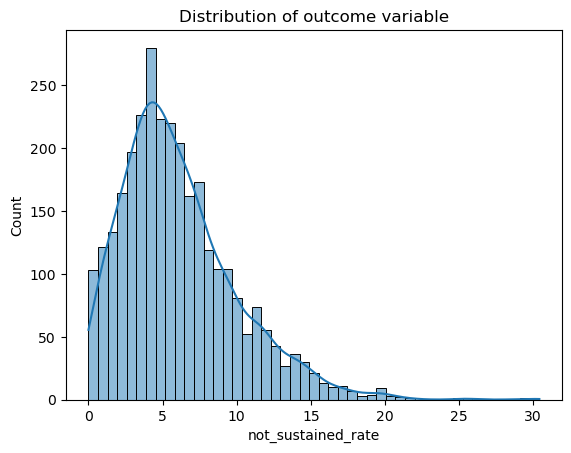

In [124]:
# distribution of outcomes
sns.histplot(data['not_sustained_rate'], kde=True )
plt.title('Distribution of outcome variable');

In [125]:
performance_indicators = data[['not_sustained_rate',
                               'susp_rate', 
                               'KS2_history', 'Attainment_8', 'Progress_8', 
                              'selective', 'Ofsted_rating']]

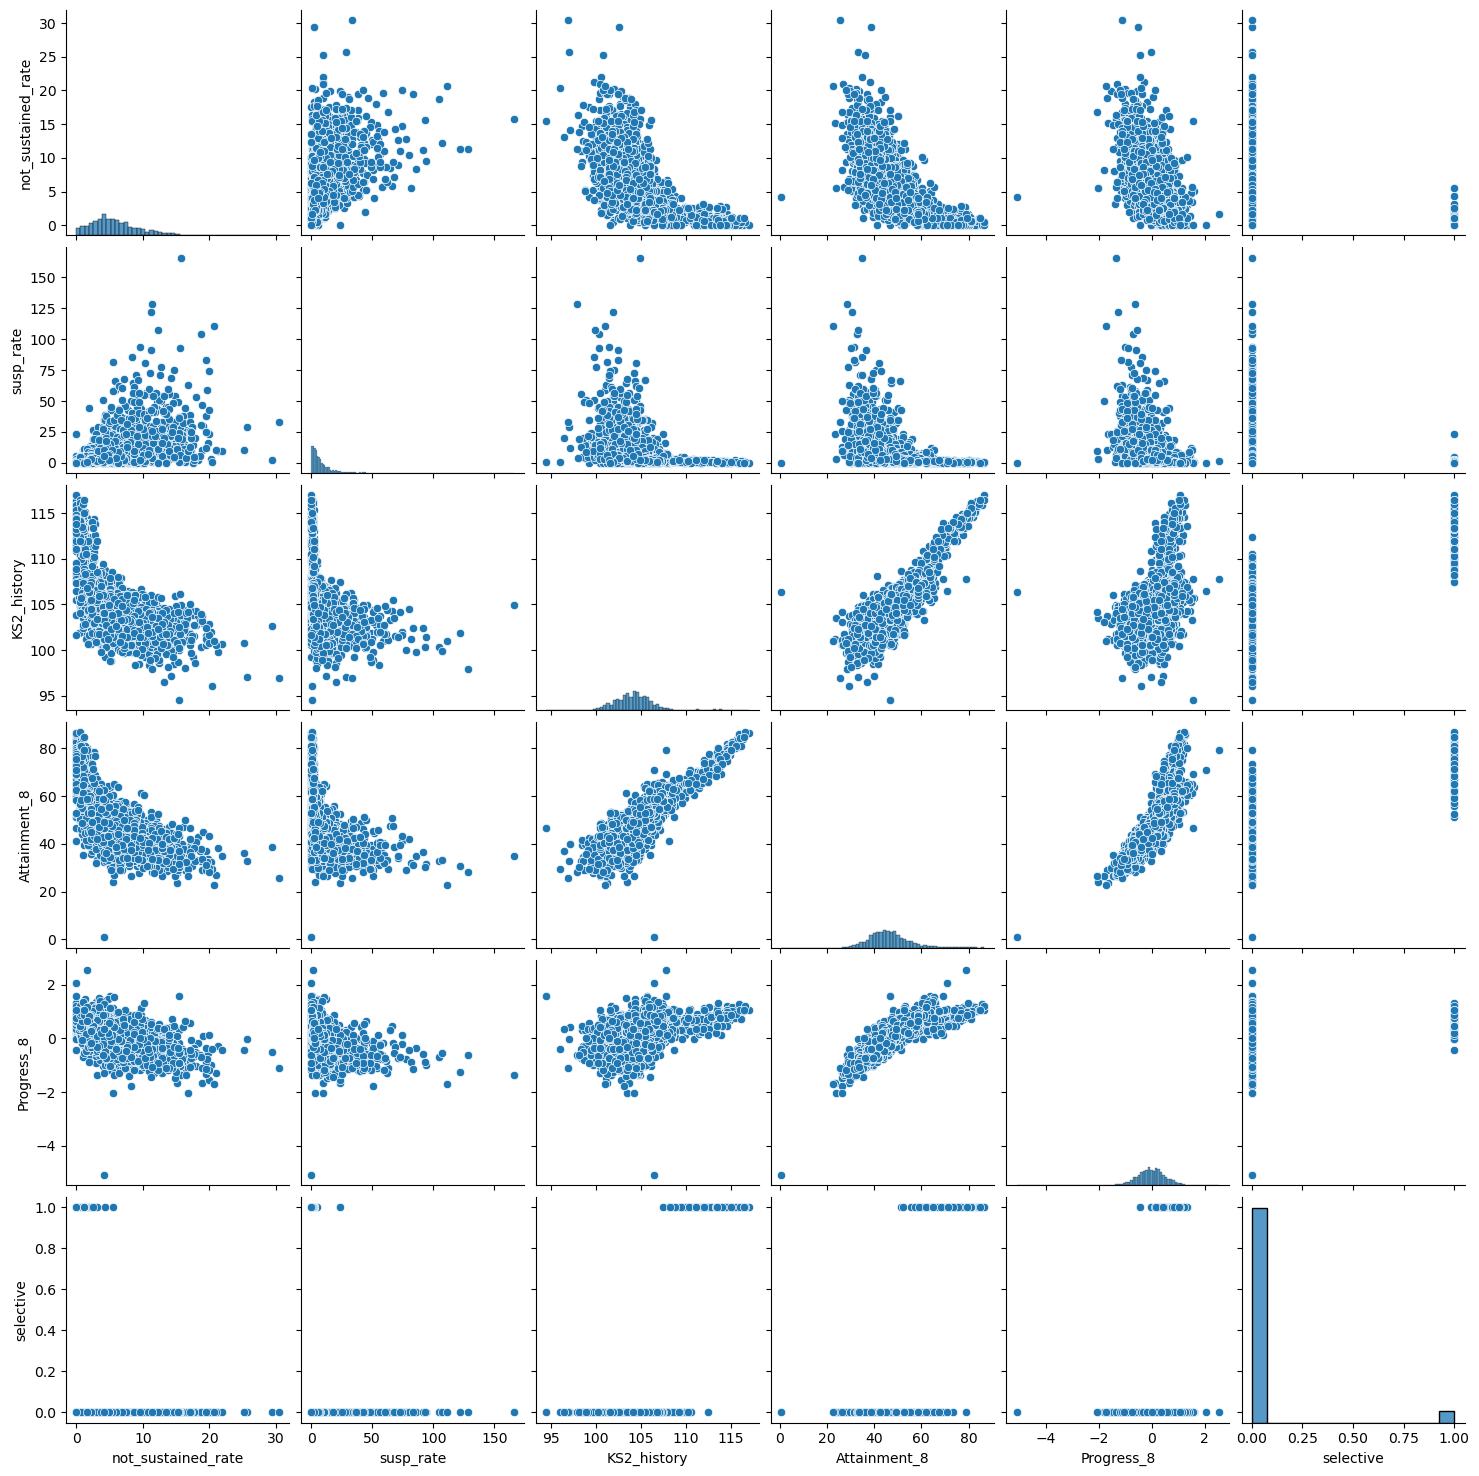

In [126]:
sns.pairplot(performance_indicators);

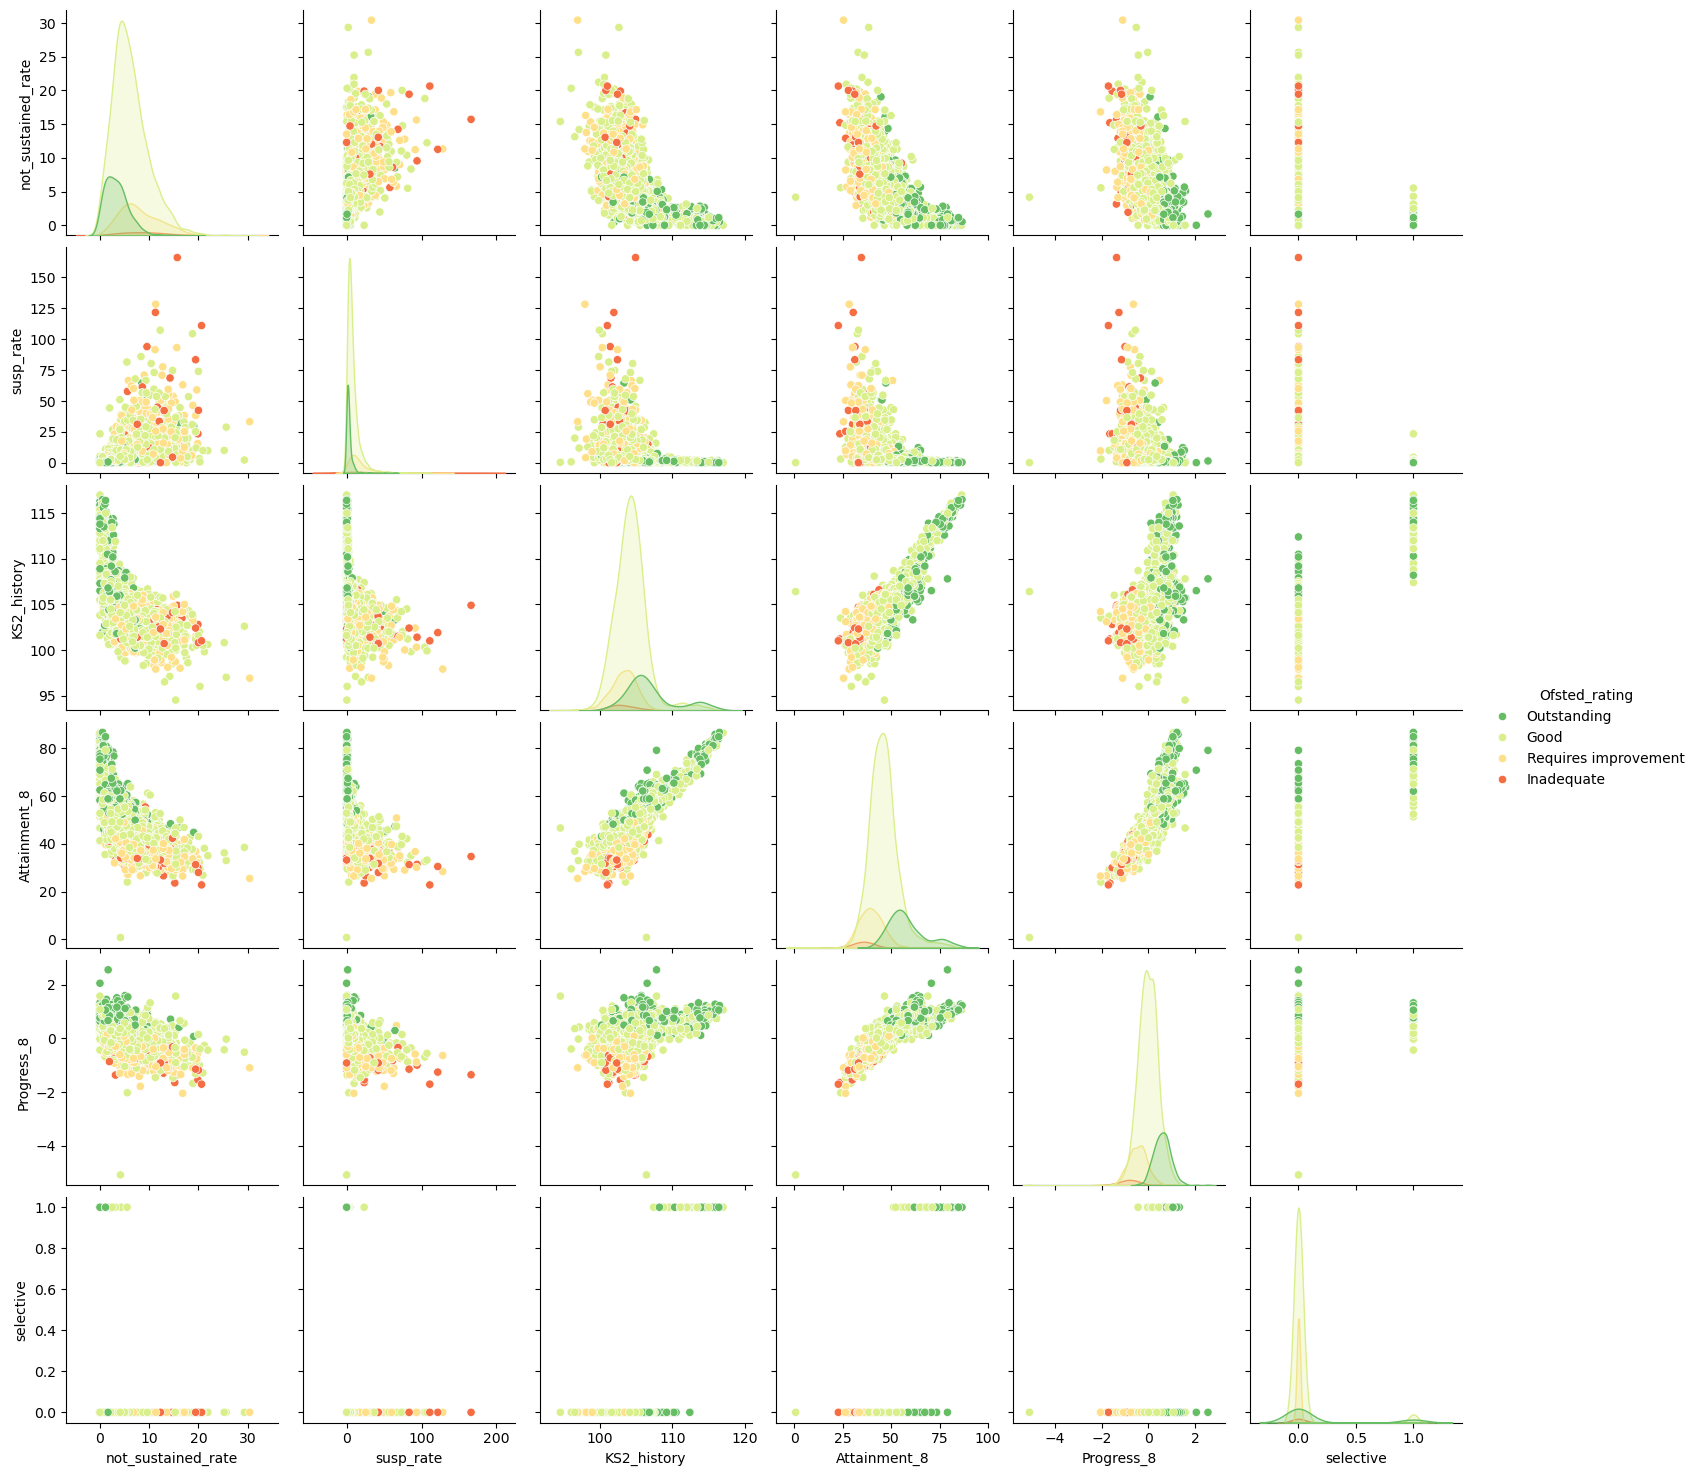

In [127]:
sns.pairplot(performance_indicators, hue='Ofsted_rating', palette='RdYlGn_r');

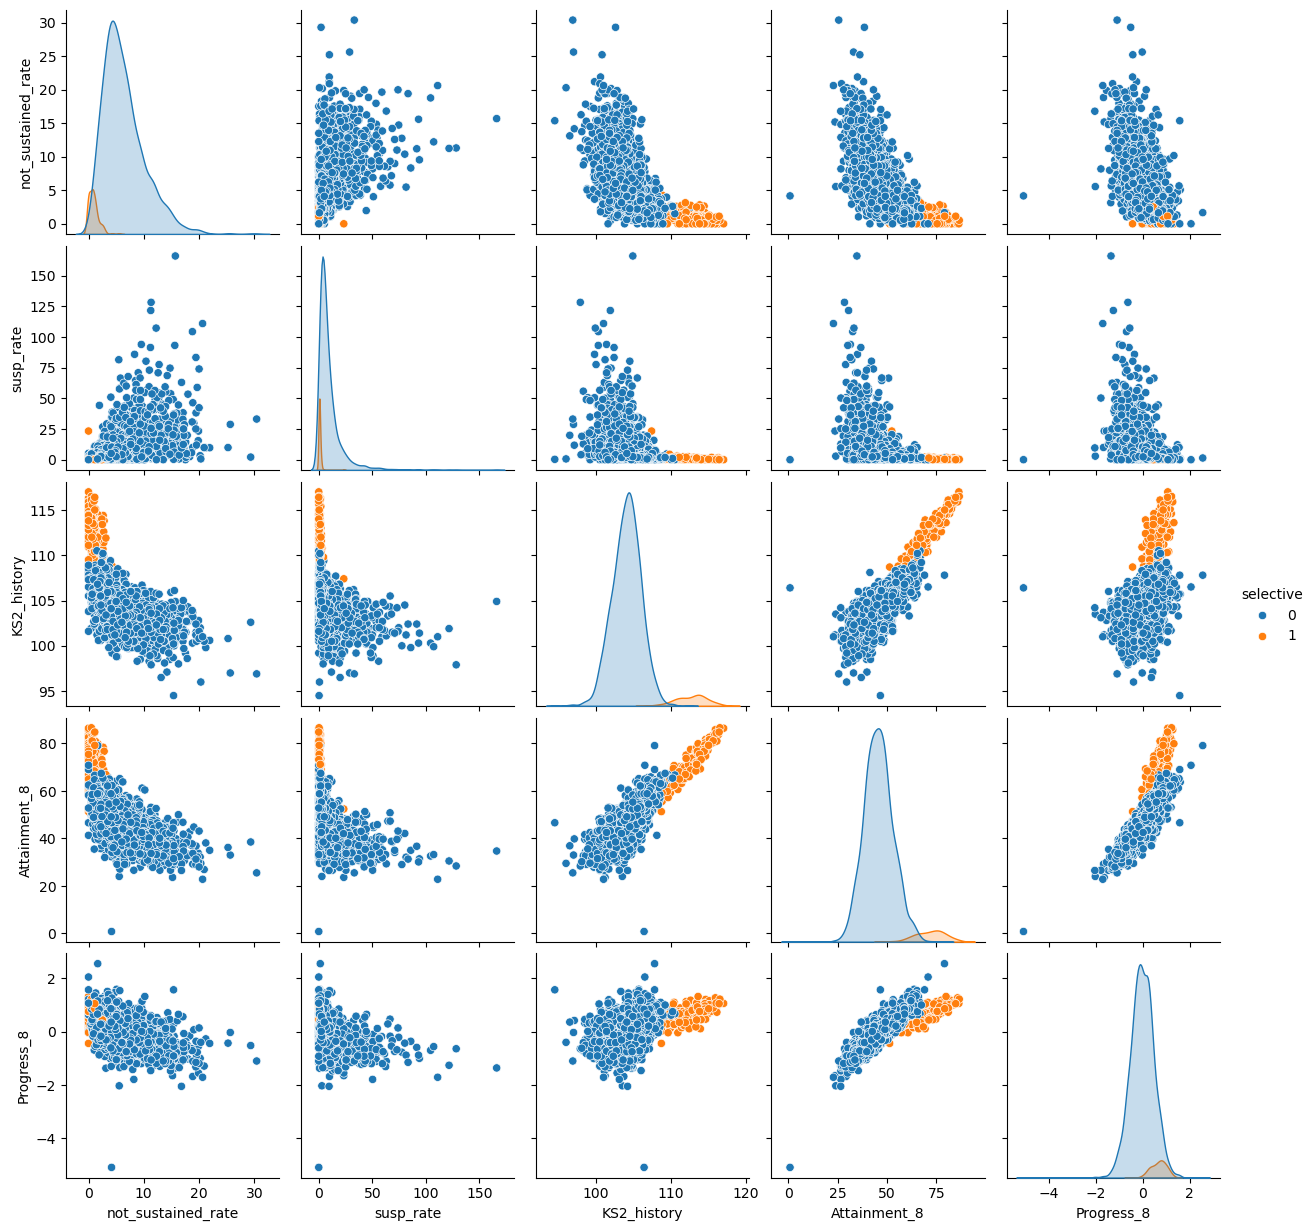

In [128]:
sns.pairplot(performance_indicators, hue='selective');

### School size

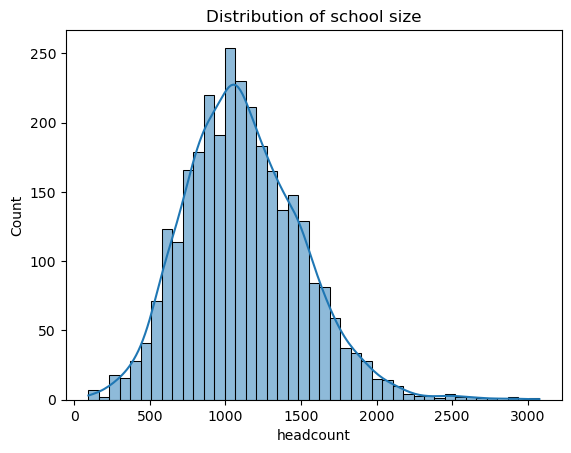

In [129]:
sns.histplot(data['headcount'], kde=True )
plt.title('Distribution of school size');

### Performance indicators

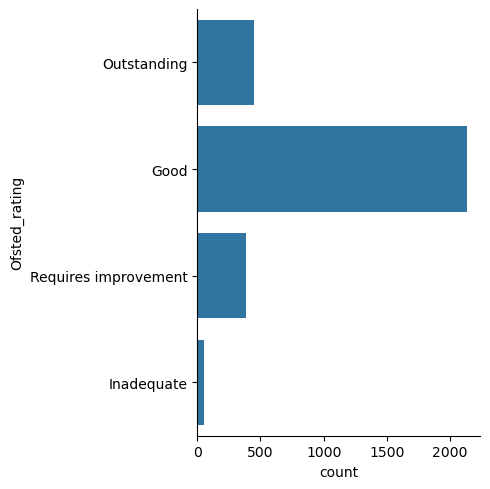

In [130]:
sns.catplot(data['Ofsted_rating'], kind='count');

In [131]:
data.groupby('Ofsted_rating').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15591/3787143538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Ofsted_rating').size()


Ofsted_rating
Outstanding              449
Good                    2130
Requires improvement     385
Inadequate                55
dtype: int64

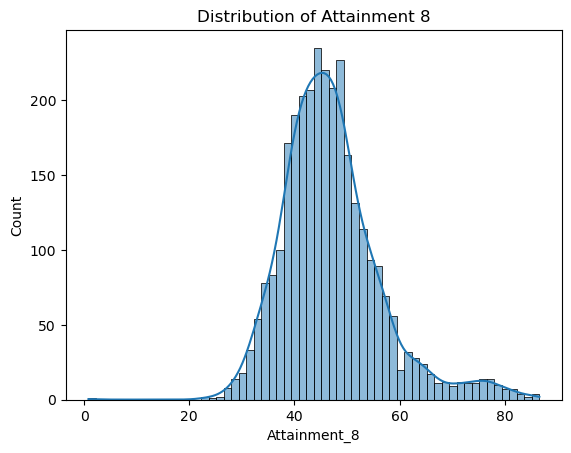

In [132]:
sns.histplot(data['Attainment_8'], kde=True )
plt.title('Distribution of Attainment 8');

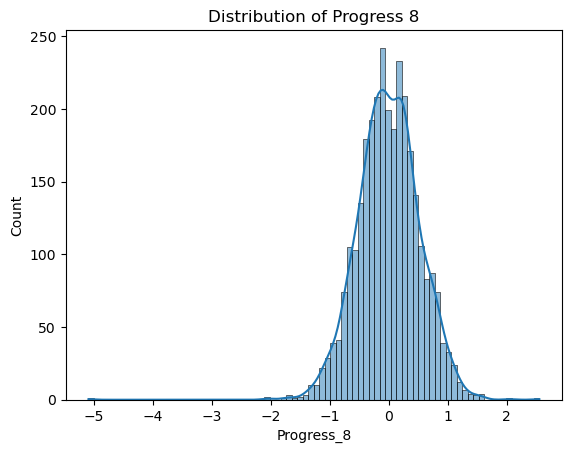

In [133]:
sns.histplot(data['Progress_8'], kde=True )
plt.title('Distribution of Progress 8');

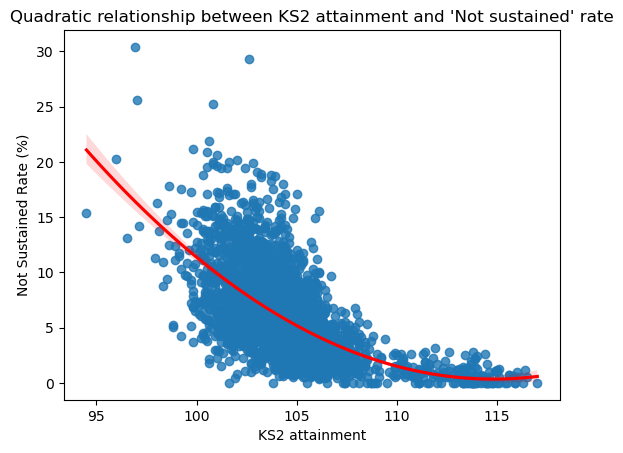

In [134]:
sns.regplot(data=data, x='KS2_history', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("KS2 attainment")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between KS2 attainment and 'Not sustained' rate");

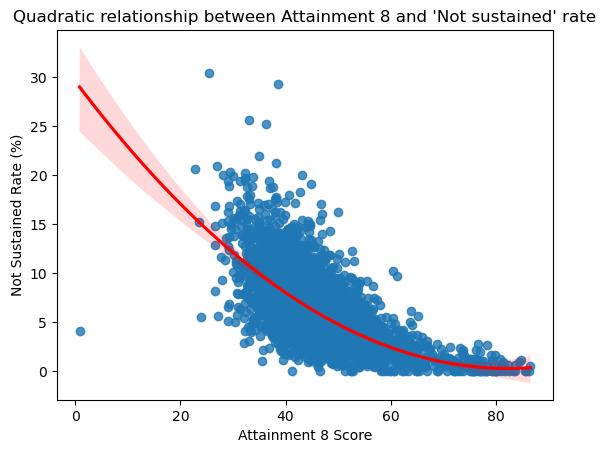

In [135]:
sns.regplot(data=data, x='Attainment_8', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("Attainment 8 Score")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between Attainment 8 and 'Not sustained' rate");

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, 1 to 3187
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   URN                 3019 non-null   int64   
 1   not_sustained_rate  3019 non-null   float64 
 2   urban_rural         3019 non-null   object  
 3   denomination        3019 non-null   object  
 4   FSM                 3019 non-null   float64 
 5   White_British       3019 non-null   float64 
 6   region_name         3019 non-null   object  
 7   school_name         3019 non-null   object  
 8   headcount           3019 non-null   float64 
 9   susp_rate           3019 non-null   float64 
 10  KS2_history         3019 non-null   float64 
 11  Attainment_8        3019 non-null   float64 
 12  Progress_8          3019 non-null   float64 
 13  selective           3019 non-null   int64   
 14  POSTCODE            3019 non-null   object  
 15  post16              3019 non-null   int64  

### Other school characteristics

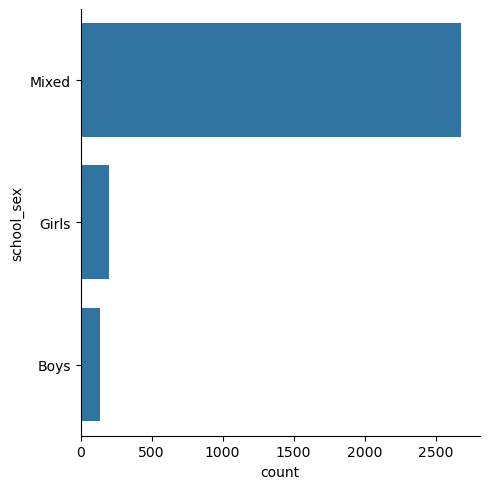

In [137]:
sns.catplot(data['school_sex'], kind='count');

In [138]:
data.groupby('single_sex_binary').size()

single_sex_binary
0    2679
1     340
dtype: int64

In [139]:
data.groupby('post16').size()

post16
0    1133
1    1886
dtype: int64

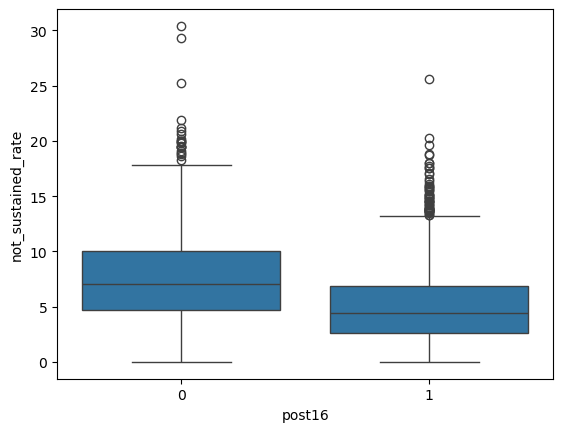

In [140]:
sns.boxplot(data=data, x='post16', y='not_sustained_rate');

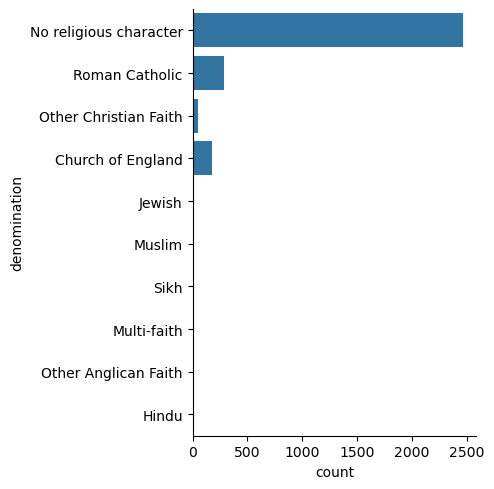

In [141]:
sns.catplot(data['denomination'], kind='count');

In [142]:
denomination_mean_neet = data.groupby('denomination')['not_sustained_rate'].mean().sort_values().index

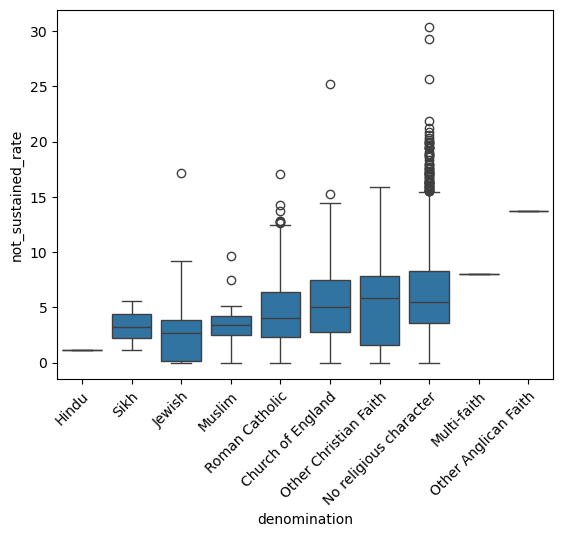

In [143]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate', order=denomination_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [144]:
data['denomination'].replace('Church of England', 'Christian', inplace=True)
data['denomination'].replace('Hindu', 'Other faith', inplace=True)
data['denomination'].replace('Jewish', 'Other faith', inplace=True)
data['denomination'].replace('Multi-faith', 'No faith', inplace=True)
data['denomination'].replace('Muslim', 'Other faith', inplace=True)
data['denomination'].replace('No religious character', 'No faith', inplace=True)
data['denomination'].replace('Other Anglican Faith', 'Christian', inplace=True)
data['denomination'].replace('Other Christian Faith', 'Christian', inplace=True)
data['denomination'].replace('Roman Catholic', 'Christian', inplace=True)
data['denomination'].replace('Sikh', 'Other faith', inplace=True)

In [145]:
data.groupby('denomination').size()

denomination
Christian       521
No faith       2463
Other faith      35
dtype: int64

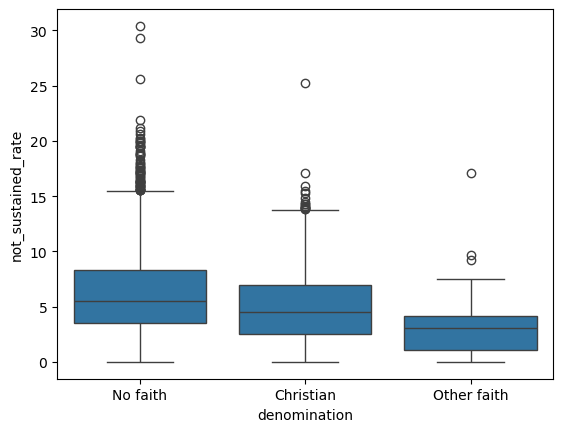

In [146]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate');

In [147]:
data['faith_binary'] = data['denomination']

In [148]:
data['faith_binary'].replace('No faith', 0, inplace=True)
data['faith_binary'].replace('Christian', 1, inplace=True)
data['faith_binary'].replace('Other faith', 1, inplace=True)

In [149]:
data.groupby('faith_binary').size()

faith_binary
0    2463
1     556
dtype: int64

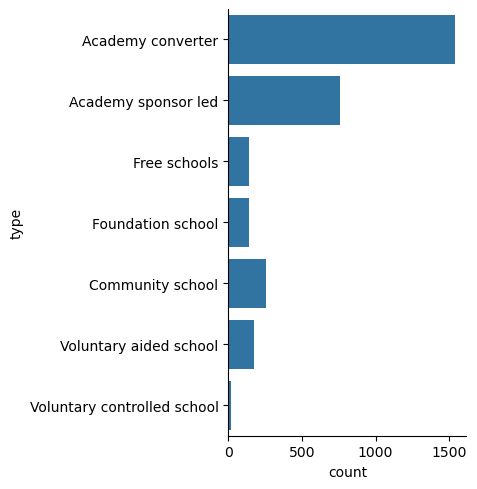

In [150]:
sns.catplot(data['type'], kind='count');

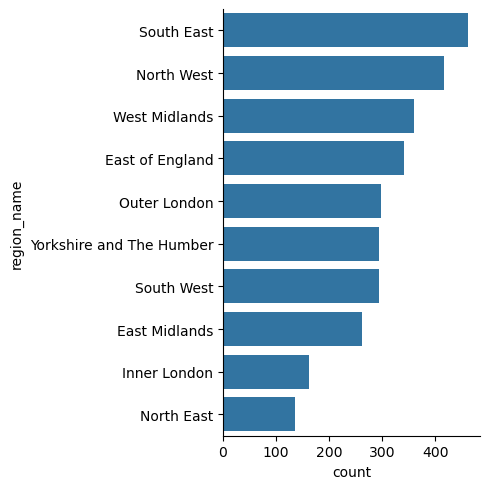

In [151]:
sns.catplot(data['region_name'], 
            kind = 'count', 
            order = data['region_name'].value_counts().index);

In [152]:
region_mean_neet = data.groupby('region_name')['not_sustained_rate'].mean().sort_values().index

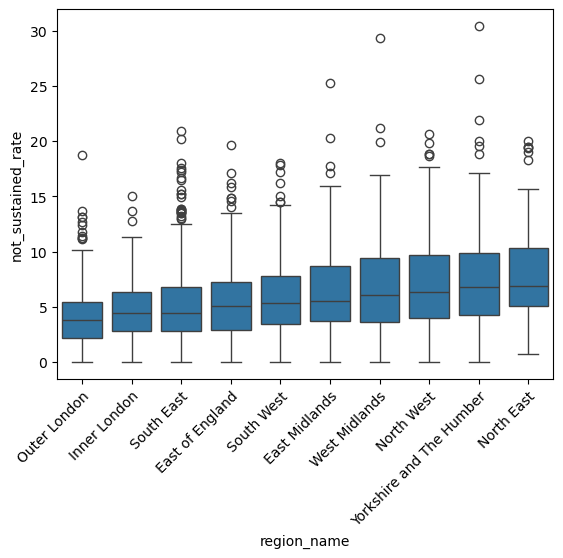

In [153]:
sns.boxplot(data=data, x='region_name', y='not_sustained_rate', order=region_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [154]:
# new column for region
data['region_new'] = data['region_name']

data['region_new'].replace('Outer London', 'London', inplace=True)
data['region_new'].replace('Inner London', 'London', inplace=True)

data['region_new'].replace('South East', 'South', inplace=True)
data['region_new'].replace('South West', 'South', inplace=True)
data['region_new'].replace('East of England', 'South', inplace=True)

data['region_new'].replace('East Midlands', 'Midlands', inplace=True)
data['region_new'].replace('West Midlands', 'Midlands', inplace=True)

data['region_new'].replace('Yorkshire and The Humber', 'North', inplace=True)
data['region_new'].replace('North West', 'North', inplace=True)
data['region_new'].replace('North East', 'North', inplace=True)

In [155]:
data.groupby('region_new').size()

region_new
London       459
Midlands     621
North        845
South       1094
dtype: int64

In [156]:
ordered_regions = data.groupby('region_new')['not_sustained_rate'].median().sort_values().index

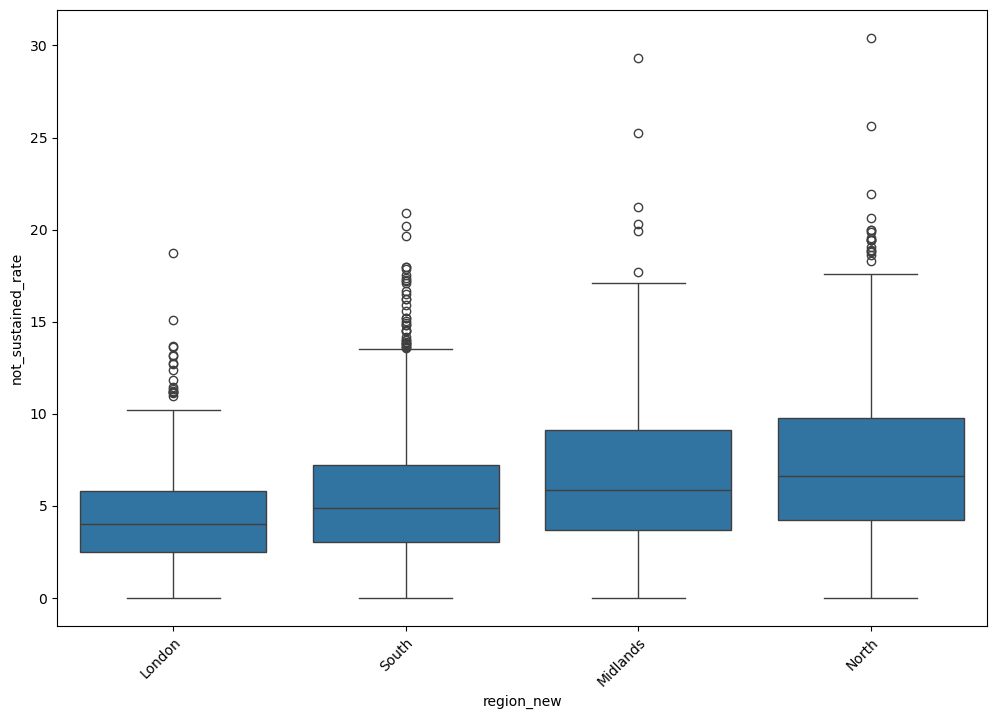

In [157]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='region_new', y='not_sustained_rate', order=ordered_regions)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

Reduced collinearity with IMD - variation in IMD across regions reduced. 

In [158]:
data.groupby('IMD').size()

IMD
1.0     236
2.0     297
3.0     324
4.0     317
5.0     291
6.0     298
7.0     300
8.0     310
9.0     341
10.0    305
dtype: int64

In [159]:
region_means = data.groupby('region_name')['IMD'].mean()
print(region_means)

region_name
East Midlands               5.938931
East of England             6.444118
Inner London                3.925926
North East                  5.044118
North West                  4.995192
Outer London                5.767677
South East                  6.770065
South West                  6.047782
West Midlands               4.880223
Yorkshire and The Humber    5.143345
Name: IMD, dtype: float64


In [160]:
new_region_means = data.groupby('region_new')['IMD'].mean()
print(new_region_means)

region_new
London      5.117647
Midlands    5.326892
North       5.054438
South       6.475320
Name: IMD, dtype: float64


In [161]:
data['urban_rural'] = data['urban_rural'].astype(str)
np.unique(data['urban_rural'])

array(['(England/Wales) Rural hamlet and isolated dwellings',
       '(England/Wales) Rural hamlet and isolated dwellings in a sparse setting',
       '(England/Wales) Rural town and fringe',
       '(England/Wales) Rural town and fringe in a sparse setting',
       '(England/Wales) Rural village',
       '(England/Wales) Rural village in a sparse setting',
       '(England/Wales) Urban city and town',
       '(England/Wales) Urban city and town in a sparse setting',
       '(England/Wales) Urban major conurbation',
       '(England/Wales) Urban minor conurbation'], dtype=object)

In [162]:
data['urban_rural'].replace('(England/Wales) Urban major conurbation', 'Urban major conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban minor conurbation', 'Urban minor conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town', 'Urban city and town', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town in a sparse setting', 'Urban city and town in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe', 'Rural town and fringe', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe in a sparse setting', 'Rural town and fringe in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village', 'Rural village', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village in a sparse setting', 'Rural village in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings', 'Rural hamlet and isolated dwellings', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings in a sparse setting', 'Rural hamlet and isolated dwellings in a sparse setting', inplace=True)

In [163]:
urban_rural_cats = CategoricalDtype(categories=['Urban major conurbation', 
                                                'Urban minor conurbation', 
                                                'Urban city and town', 
                                                'Urban city and town in a sparse setting', 
                                                'Rural town and fringe',
                                                'Rural town and fringe in a sparse setting',
                                                'Rural village',
                                                'Rural village in a sparse setting',
                                                'Rural hamlet and isolated dwellings',
                                                'Rural hamlet and isolated dwellings in a sparse setting'
                                               ], 
                                    ordered=True)
data['urban_rural'] = data['urban_rural'].astype(urban_rural_cats)

In [164]:
data.groupby('urban_rural').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15591/1274345496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_rural').size()


urban_rural
Urban major conurbation                                    1086
Urban minor conurbation                                     104
Urban city and town                                        1395
Urban city and town in a sparse setting                       8
Rural town and fringe                                       287
Rural town and fringe in a sparse setting                    30
Rural village                                                56
Rural village in a sparse setting                             6
Rural hamlet and isolated dwellings                          45
Rural hamlet and isolated dwellings in a sparse setting       2
dtype: int64

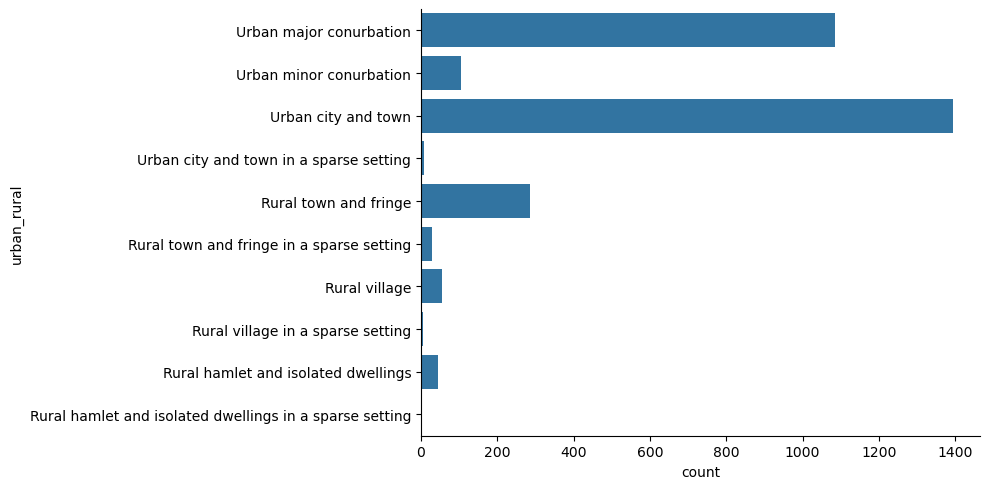

In [165]:
g = sns.catplot(data['urban_rural'], kind='count', height=5, aspect=2);

In [166]:
urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15591/3792850642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index


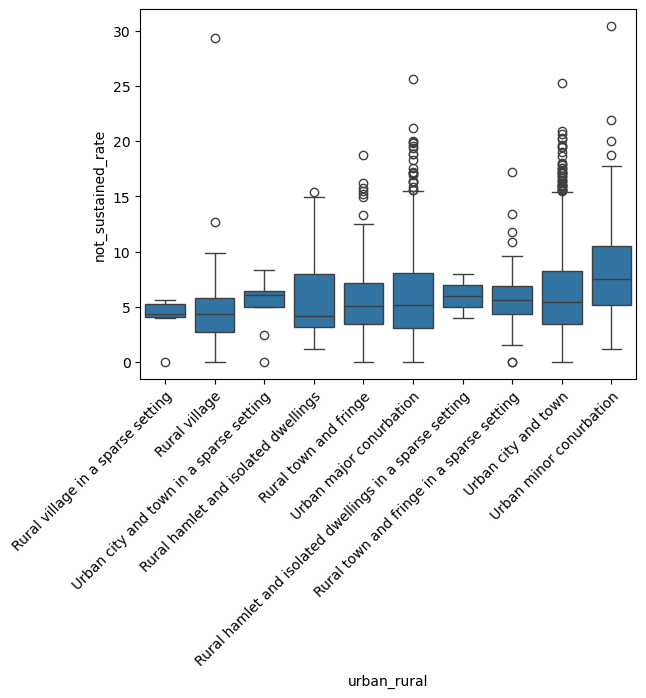

In [167]:
sns.boxplot(data=data, x='urban_rural', y='not_sustained_rate', order=urban_rural_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [168]:
# new column for binary urban status
data['urban_binary'] = data['urban_rural']

In [169]:
# replace labels with numbers
data['urban_binary'].replace('Urban major conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban minor conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban city and town', 1, inplace=True)
data['urban_binary'].replace('Urban city and town in a sparse setting', 1, inplace=True)
data['urban_binary'].replace('Rural town and fringe', 0, inplace=True)
data['urban_binary'].replace('Rural town and fringe in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural village', 0, inplace=True)
data['urban_binary'].replace('Rural village in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings in a sparse setting', 0, inplace=True)

In [170]:
data.groupby('urban_binary').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15591/419234468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_binary').size()


urban_binary
1    2593
0     426
dtype: int64

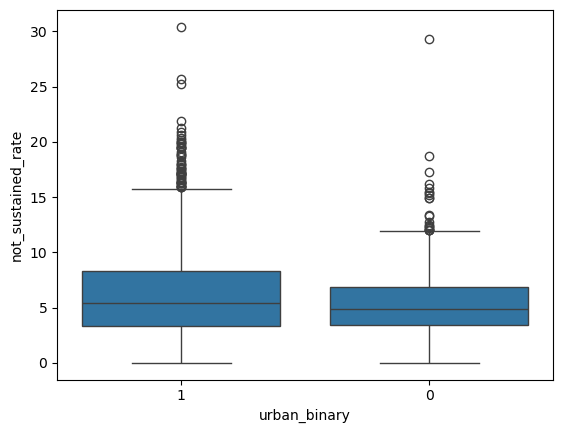

In [171]:
sns.boxplot(data=data, x='urban_binary', y='not_sustained_rate');

### Pupil characteristics

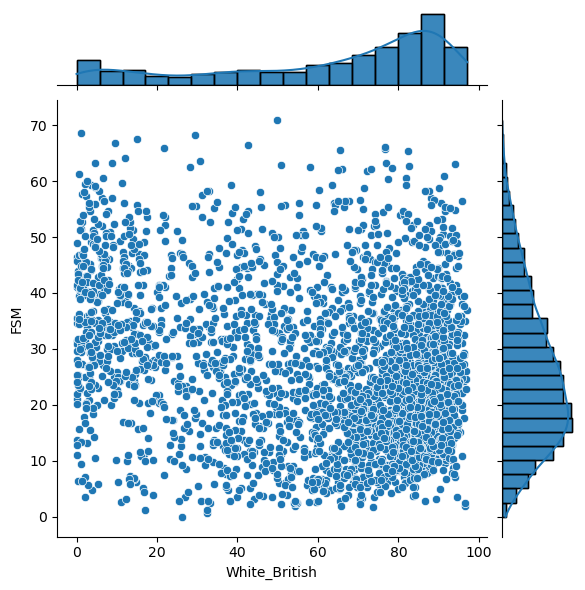

In [172]:
g = sns.jointplot(data=data, x='White_British', y='FSM')
g.plot_marginals(sns.histplot, kde=True);

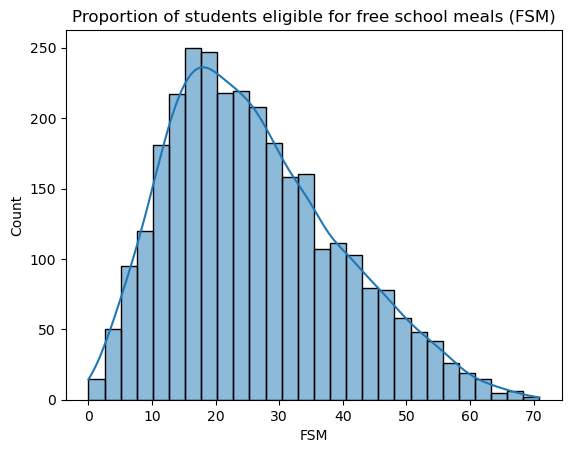

In [173]:
sns.histplot(data['FSM'], kde=True )
plt.title('Proportion of students eligible for free school meals (FSM)');

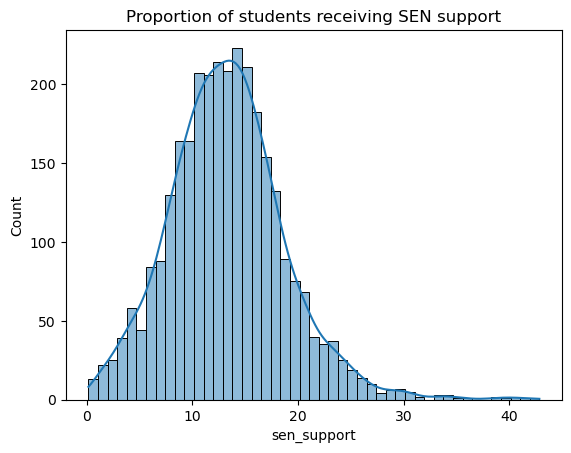

In [174]:
sns.histplot(data['sen_support'], kde=True )
plt.title('Proportion of students receiving SEN support');

# Correlations

In [175]:
from copy import copy
from scipy.stats import kendalltau

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, 1 to 3187
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   URN                 3019 non-null   int64   
 1   not_sustained_rate  3019 non-null   float64 
 2   urban_rural         3019 non-null   category
 3   denomination        3019 non-null   object  
 4   FSM                 3019 non-null   float64 
 5   White_British       3019 non-null   float64 
 6   region_name         3019 non-null   object  
 7   school_name         3019 non-null   object  
 8   headcount           3019 non-null   float64 
 9   susp_rate           3019 non-null   float64 
 10  KS2_history         3019 non-null   float64 
 11  Attainment_8        3019 non-null   float64 
 12  Progress_8          3019 non-null   float64 
 13  selective           3019 non-null   int64   
 14  POSTCODE            3019 non-null   object  
 15  post16              3019 non-null   int64  

In [177]:
data['Ofsted_num'] = data['Ofsted_rating']
data['Ofsted_num'].replace('Outstanding', 4, inplace=True)
data['Ofsted_num'].replace('Good', 3, inplace=True)
data['Ofsted_num'].replace('Requires improvement', 2, inplace=True)
data['Ofsted_num'].replace('Inadequate', 1, inplace=True)

In [178]:
vars_for_corr = data[['not_sustained_rate', 
                      
                      'susp_rate',  
                      'FSM', 'White_British', 'sen_support', 
                      'headcount', 
                      #'pupil_teacher_ratio', 'assistant_teacher_ratio', 
                      'Ofsted_num',
                      'KS2_history', 'Attainment_8', 'Progress_8', 
                      'selective', 'post16',
                      'IMD', 'urban_binary', 'single_sex_binary', 'faith_binary']]

In [179]:
vars_for_corr.columns

Index(['not_sustained_rate', 'susp_rate', 'FSM', 'White_British',
       'sen_support', 'headcount', 'Ofsted_num', 'KS2_history', 'Attainment_8',
       'Progress_8', 'selective', 'post16', 'IMD', 'urban_binary',
       'single_sex_binary', 'faith_binary'],
      dtype='object')

In [180]:
corr_names = {
    'not_sustained_rate': 'Not sustained %', 
    'absence_rate_non_excl': 'Absence %', 
    'persistent_absence': 'Persistent absence %',
    'perm_excl_rate': 'Permanent exclusion %', 
    'susp_rate': 'Suspension %', 
    'one_plus_susp_rate': 'One-plus suspension %', 
    'FSM': 'FSM %',
    'White_British': 'White British %', 
    'EAL': 'EAL %', 
    'perc_boys': 'Boys %', 
    'sen_support': 'SEN support %', 
    'ehcp': 'EHCP %', 
    'headcount': 'School headcount',
    'KS4_headcount': 'KS4 headcount', 
    'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    'Ofsted_num': 'Ofsted rating',
    'KS2_history': 'KS2 history', 
    'KS4_pass_rate': 'KS4 pass %', 
    'Attainment_8': 'A8', 
    'Progress_8': 'P8',
    'selective': 'Selective schools', 
    'post16': 'Post-16', 
    'IMD': 'IMD of LSOA', 
    'urban_binary': 'Urban schools', 
    'single_sex_binary': 'Single sex schools',
    'faith_binary': 'Faith schools'
}

In [181]:
vars_for_corr = vars_for_corr.rename(columns=corr_names)

In [182]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

##### Positive correlations

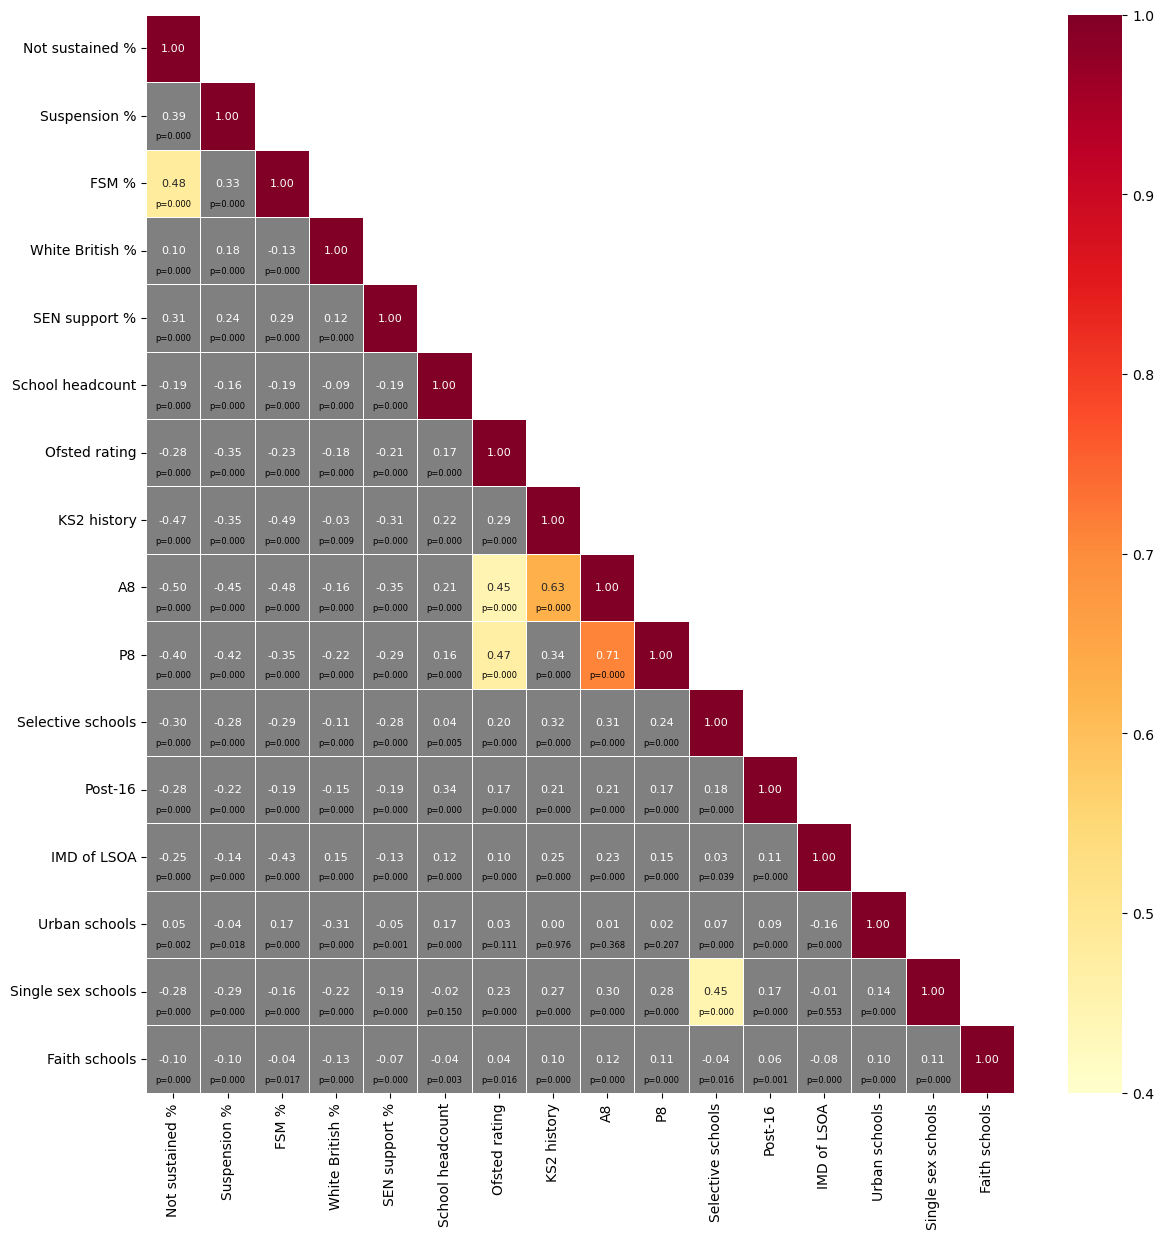

In [183]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


## Negative correlations

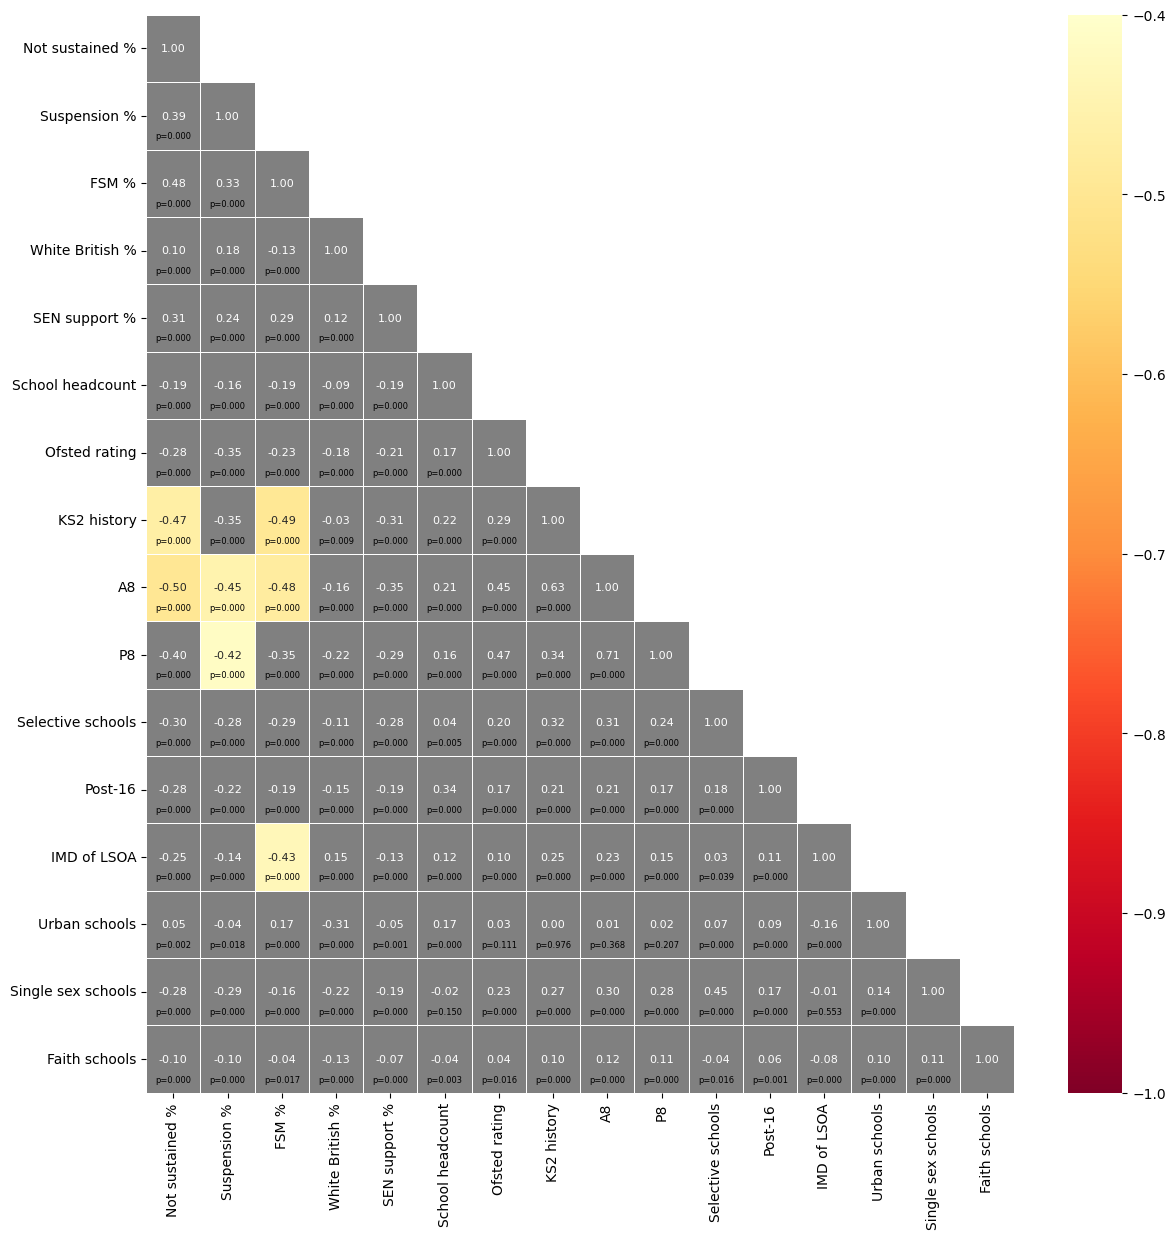

In [184]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

# Descriptive Stats Table

In [81]:
q25 = data['headcount'].quantile(0.25)

# Data Transformation

In [185]:
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [186]:
# transformer to convert quadratic variables
# include bias=false as using linear regression which automatically includes an intercept
poly = Pipeline(steps=[
    ('encoder', PolynomialFeatures(include_bias=False))])

# transformer to convert categorical variables 
cat_transformer_onehot = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None))])

# set order of values for ordinal variable
cat_transformer_ordinal = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories='auto'))])

# transformer to move towards normal distribution of numerical variables
num = Pipeline(steps=[
    ('encoder', PowerTransformer())])      

In [187]:
# classify columns for transformation
preprocessor  = ColumnTransformer(transformers = [
    ('cat_onehot', cat_transformer_onehot, 
     ['post16', 'faith_binary', 'single_sex_binary', 'urban_binary', 'selective'
     ]), 
    
    ('poly', poly, 
     ['KS2_history', 'Attainment_8', 'Progress_8', 'headcount'
     ]),
    
    ('cat_ordinal', cat_transformer_ordinal,
     ['Ofsted_rating', 'IMD'
     ]),
    
    ('num', num,
     ['susp_rate', 'FSM', 'sen_support', 'White_British'
    ])
])

In [188]:
# transform the data
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
pipe_fit = pipeline.fit(data)

data_transformed = pd.DataFrame(
    pipe_fit.transform(data), 
    columns = pipe_fit.get_feature_names_out().tolist())

data_transformed.head()

/Users/gysd/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


cat_onehot__post16_0  cat_onehot__post16_1  cat_onehot__faith_binary_0  \
0                   0.0                   1.0                         1.0   
1                   1.0                   0.0                         1.0   
2                   1.0                   0.0                         1.0   
3                   0.0                   1.0                         1.0   
4                   0.0                   1.0                         0.0   

   cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_0  \
0                         0.0                              1.0   
1                         0.0                              1.0   
2                         0.0                              1.0   
3                         0.0                              1.0   
4                         1.0                              1.0   

   cat_onehot__single_sex_binary_1  cat_onehot__urban_binary_0  \
0                              0.0                         1.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   

   cat_onehot__urban_binary_1  cat_onehot__selective_0  \
0                         0.0                      1.0   
1                         1.0                      1.0   
2                         1.0                      1.0   
3                         1.0                      1.0   
4                         1.0                      1.0   

   cat_onehot__selective_1  poly__KS2_history  poly__Attainment_8  \
0                      0.0              102.2                39.9   
1                      0.0              104.7                51.1   
2                      0.0              102.1                43.5   
3                      0.0              105.2                45.6   
4                      0.0              104.2                45.6   

   poly__Progress_8  poly__headcount  poly__KS2_history^2  \
0             -0.23            789.0             10444.84   
1              0.41           1170.0             10962.09   
2              0.17            699.0             10424.41   
3             -0.26           1468.0             11067.04   
4             -0.08           1425.0             10857.64   

   poly__KS2_history Attainment_8  poly__KS2_history Progress_8  \
0                         4077.78                       -23.506   
1                         5350.17                        42.927   
2                         4441.35                        17.357   
3                         4797.12                       -27.352   
4                         4751.52                        -8.336   

   poly__KS2_history headcount  poly__Attainment_8^2  \
0                      80635.8               1592.01   
1                     122499.0               2611.21   
2                      71367.9               1892.25   
3                     154433.6               2079.36   
4                     148485.0               2079.36   

   poly__Attainment_8 Progress_8  poly__Attainment_8 headcount  \
0                         -9.177                       31481.1   
1                         20.951                       59787.0   
2                          7.395                       30406.5   
3                        -11.856                       66940.8   
4                         -3.648                       64980.0   

   poly__Progress_8^2  poly__Progress_8 headcount  poly__headcount^2  \
0              0.0529                     -181.47           622521.0   
1              0.1681                      479.70          1368900.0   
2              0.0289                      118.83           488601.0   
3              0.0676                     -381.68          2155024.0   
4              0.0064                     -114.00          2030625.0   

   cat_ordinal__Ofsted_rating  cat_ordinal__I

In [189]:
y_transformer = PowerTransformer()
Not_Sustained_transformed = y_transformer.fit_transform(data[['not_sustained_rate']])

In [190]:
Not_Sustained_transformed

array([[ 1.6225426 ],
       [-0.27924033],
       [-0.36803384],
       ...,
       [-0.37744794],
       [ 0.97207998],
       [-2.4071768 ]])

In [191]:
data_transformed['Not_Sustained_transformed'] = Not_Sustained_transformed

In [192]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             3019 non-null   float64
 1   cat_onehot__post16_1             3019 non-null   float64
 2   cat_onehot__faith_binary_0       3019 non-null   float64
 3   cat_onehot__faith_binary_1       3019 non-null   float64
 4   cat_onehot__single_sex_binary_0  3019 non-null   float64
 5   cat_onehot__single_sex_binary_1  3019 non-null   float64
 6   cat_onehot__urban_binary_0       3019 non-null   float64
 7   cat_onehot__urban_binary_1       3019 non-null   float64
 8   cat_onehot__selective_0          3019 non-null   float64
 9   cat_onehot__selective_1          3019 non-null   float64
 10  poly__KS2_history                3019 non-null   float64
 11  poly__Attainment_8               3019 non-null   float64
 12  poly__Progress_8    

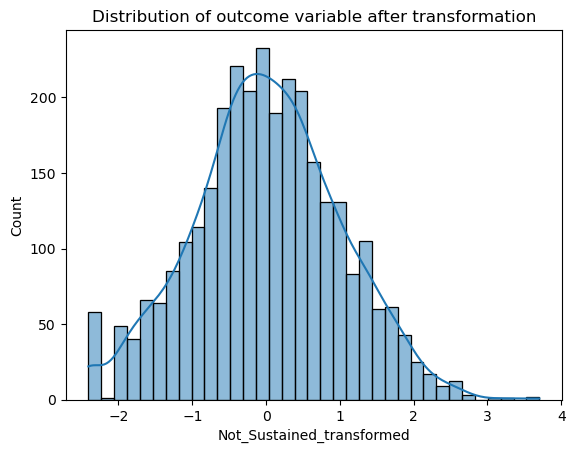

In [193]:
# distribution of outcomes
sns.histplot(data_transformed['Not_Sustained_transformed'], kde=True )
plt.title('Distribution of outcome variable after transformation');

# Regression

In [194]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             3019 non-null   float64
 1   cat_onehot__post16_1             3019 non-null   float64
 2   cat_onehot__faith_binary_0       3019 non-null   float64
 3   cat_onehot__faith_binary_1       3019 non-null   float64
 4   cat_onehot__single_sex_binary_0  3019 non-null   float64
 5   cat_onehot__single_sex_binary_1  3019 non-null   float64
 6   cat_onehot__urban_binary_0       3019 non-null   float64
 7   cat_onehot__urban_binary_1       3019 non-null   float64
 8   cat_onehot__selective_0          3019 non-null   float64
 9   cat_onehot__selective_1          3019 non-null   float64
 10  poly__KS2_history                3019 non-null   float64
 11  poly__Attainment_8               3019 non-null   float64
 12  poly__Progress_8    

In [195]:
data_transformed.head()

cat_onehot__post16_0  cat_onehot__post16_1  cat_onehot__faith_binary_0  \
0                   0.0                   1.0                         1.0   
1                   1.0                   0.0                         1.0   
2                   1.0                   0.0                         1.0   
3                   0.0                   1.0                         1.0   
4                   0.0                   1.0                         0.0   

   cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_0  \
0                         0.0                              1.0   
1                         0.0                              1.0   
2                         0.0                              1.0   
3                         0.0                              1.0   
4                         1.0                              1.0   

   cat_onehot__single_sex_binary_1  cat_onehot__urban_binary_0  \
0                              0.0                         1.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   

   cat_onehot__urban_binary_1  cat_onehot__selective_0  \
0                         0.0                      1.0   
1                         1.0                      1.0   
2                         1.0                      1.0   
3                         1.0                      1.0   
4                         1.0                      1.0   

   cat_onehot__selective_1  poly__KS2_history  poly__Attainment_8  \
0                      0.0              102.2                39.9   
1                      0.0              104.7                51.1   
2                      0.0              102.1                43.5   
3                      0.0              105.2                45.6   
4                      0.0              104.2                45.6   

   poly__Progress_8  poly__headcount  poly__KS2_history^2  \
0             -0.23            789.0             10444.84   
1              0.41           1170.0             10962.09   
2              0.17            699.0             10424.41   
3             -0.26           1468.0             11067.04   
4             -0.08           1425.0             10857.64   

   poly__KS2_history Attainment_8  poly__KS2_history Progress_8  \
0                         4077.78                       -23.506   
1                         5350.17                        42.927   
2                         4441.35                        17.357   
3                         4797.12                       -27.352   
4                         4751.52                        -8.336   

   poly__KS2_history headcount  poly__Attainment_8^2  \
0                      80635.8               1592.01   
1                     122499.0               2611.21   
2                      71367.9               1892.25   
3                     154433.6               2079.36   
4                     148485.0               2079.36   

   poly__Attainment_8 Progress_8  poly__Attainment_8 headcount  \
0                         -9.177                       31481.1   
1                         20.951                       59787.0   
2                          7.395                       30406.5   
3                        -11.856                       66940.8   
4                         -3.648                       64980.0   

   poly__Progress_8^2  poly__Progress_8 headcount  poly__headcount^2  \
0              0.0529                     -181.47           622521.0   
1              0.1681                      479.70          1368900.0   
2              0.0289                      118.83           488601.0   
3              0.0676                     -381.68          2155024.0   
4              0.0064                     -114.00          2030625.0   

   cat_ordinal__Ofsted_rating  cat_ordinal__I

In [196]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## IGNORE

In [95]:
# convert to category 
data['denomination'] = pd.Categorical(data['denomination'])
data['school_sex'] = pd.Categorical(data['school_sex'])
data['type'] = pd.Categorical(data['type'])
data['region_new'] = pd.Categorical(data['region_new'])

# convert to int
data['urban_binary'] = data['urban_binary'].astype(int)

In [96]:
data_transformed = pd.get_dummies(data, 
                                  columns=['type', 
                                           'denomination', 
                                           #'school_sex', 
                                           'region_new', 
                                           #'Ofsted_rating'
                                          ], 
                                 drop_first=False)
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, 1 to 3187
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   URN                               3019 non-null   int64   
 1   not_sustained_rate                3019 non-null   float64 
 2   urban_rural                       3019 non-null   category
 3   FSM                               3019 non-null   float64 
 4   White_British                     3019 non-null   float64 
 5   region_name                       3019 non-null   object  
 6   school_name                       3019 non-null   object  
 7   headcount                         3019 non-null   float64 
 8   susp_rate                         3019 non-null   float64 
 9   KS2_history                       3019 non-null   float64 
 10  Attainment_8                      3019 non-null   float64 
 11  Progress_8                        3019 non-null   float64 
 1

In [97]:
ord_transformer = OrdinalEncoder()

In [98]:
data_transformed[['Ofsted_rating']] = ord_transformer.fit_transform(data_transformed[['Ofsted_rating']])

In [99]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, 1 to 3187
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   URN                               3019 non-null   int64   
 1   not_sustained_rate                3019 non-null   float64 
 2   urban_rural                       3019 non-null   category
 3   FSM                               3019 non-null   float64 
 4   White_British                     3019 non-null   float64 
 5   region_name                       3019 non-null   object  
 6   school_name                       3019 non-null   object  
 7   headcount                         3019 non-null   float64 
 8   susp_rate                         3019 non-null   float64 
 9   KS2_history                       3019 non-null   float64 
 10  Attainment_8                      3019 non-null   float64 
 11  Progress_8                        3019 non-null   float64 
 1

In [100]:
data_transformed = data_transformed.astype({col: 'int' for col in data_transformed.select_dtypes(include='bool').columns})

## Specify variables

In [101]:
predictors = data_transformed[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
#'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school'
]]

KeyError: "['pupil_teacher_ratio', 'assistant_teacher_ratio'] not in index"

In [ ]:
controls = data_transformed[[
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

In [ ]:
predictors_controls = data_transformed[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
#'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school',

# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

### Run model - Predictors only

#### predictors - individual effects

In [ ]:
predictors_results = {}

for p in predictors:
    x = data_transformed[p]
    y = data_transformed['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    predictors_results[p] = model.summary()
    

In [ ]:
predictors_results

In [ ]:
# extract t stat for each predictor 
t_statistics = {}

for predictor, result in predictors_results.items():
    t_statistics[predictor] = result.tables[1].data[1][3] 

t_statistics

#### all predictors

In [ ]:
x = predictors

In [ ]:
y = data_transformed['not_sustained_rate']

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

#### forward selection: corr coef

In [ ]:
x = predictors[['susp_rate',
'Progress_8']]

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
x = predictors[['susp_rate',
'Progress_8', 'single_sex_binary']]

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
x = predictors[['susp_rate',
'Progress_8', 'single_sex_binary', 'post16']]

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio']]

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount']]

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount']]

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount', 'pupil_teacher_ratio']]

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'pupil_teacher_ratio']]

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'pupil_teacher_ratio',
               #'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school']]

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [ ]:
vif_values

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['not_sustained_rate'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([0, 30], 
         [0, 30], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

In [ ]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

In [ ]:
best_predictors = predictors[[
    'susp_rate',
    'Progress_8', 
    'post16', 
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio'
]]

## forward selection: adj. R-squared

In [198]:
x = data_transformed[[
    #'num__assistant_teacher_ratio', 
    #'num__pupil_teacher_ratio'
]]

In [199]:
y = data_transformed['Not_Sustained_transformed']

In [200]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
model.aic

In [201]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
   # 'num__pupil_teacher_ratio',
    'num__susp_rate'
]]

In [202]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.318
Model:                                   OLS   Adj. R-squared (uncentered):              0.318
Method:                        Least Squares   F-statistic:                              1409.
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                   2.43e-253
Time:                               12:52:30   Log-Likelihood:                         -3705.6
No. Observations:                       3019   AIC:                                      7413.
Df Residuals:                           3018   BIC:                                      7419.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
num__susp_rate     0.5641      0.015     37.531      0.000       0.535       0.594
==============================================================================
Omnibus:                       63.652   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.870
Skew:                           0.314   Prob(JB):                     2.48e-16
Kurtosis:                       3.420   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
model.aic

7413.153230594737

In [204]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
    #'num__pupil_teacher_ratio',
    'num__susp_rate',
    'poly__headcount',
    'poly__headcount^2'
]]

In [205]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.333
Model:                                   OLS   Adj. R-squared (uncentered):              0.332
Method:                        Least Squares   F-statistic:                              501.0
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                   3.95e-264
Time:                               12:52:30   Log-Likelihood:                         -3673.4
No. Observations:                       3019   AIC:                                      7353.
Df Residuals:                           3016   BIC:                                      7371.
Df Model:                                  3                                                  
Covariance Type:                   nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
num__susp_rate        0.5419      0.015     35.813      0.000       0.512       0.572
poly__headcount       0.0003   4.41e-05      6.244      0.000       0.000       0.000
poly__headcount^2 -2.289e-07   3.08e-08     -7.439      0.000   -2.89e-07   -1.69e-07
==============================================================================
Omnibus:                       42.379   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.069
Skew:                           0.239   Prob(JB):                     3.65e-11
Kurtosis:                       3.392   Cond. No.                     1.73e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
model.aic

7352.860012761919

In [207]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
    #'num__pupil_teacher_ratio',
    'num__susp_rate',
     'poly__headcount',
    'poly__headcount^2',
    'cat_onehot__post16_0'
]]

In [208]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.366
Model:                                   OLS   Adj. R-squared (uncentered):              0.365
Method:                        Least Squares   F-statistic:                              435.3
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                   1.93e-296
Time:                               12:52:32   Log-Likelihood:                         -3595.6
No. Observations:                       3019   AIC:                                      7199.
Df Residuals:                           3015   BIC:                                      7223.
Df Model:                                  4                                                  
Covariance Type:                   nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
num__susp_rate           0.4978      0.015     32.843      0.000       0.468       0.527
poly__headcount      -8.352e-05   5.15e-05     -1.622      0.105      -0.000    1.75e-05
poly__headcount^2    -4.105e-08   3.35e-08     -1.226      0.220   -1.07e-07    2.46e-08
cat_onehot__post16_0     0.3951      0.031     12.627      0.000       0.334       0.456
==============================================================================
Omnibus:                       35.357   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.588
Skew:                           0.217   Prob(JB):                     2.53e-09
Kurtosis:                       3.357   Cond. No.                     3.71e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
model.aic

7199.285950727114

In [210]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
    #'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0'
]]

In [211]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.344
Model:                                   OLS   Adj. R-squared (uncentered):              0.344
Method:                        Least Squares   F-statistic:                              791.5
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                   4.72e-277
Time:                               12:52:38   Log-Likelihood:                         -3647.1
No. Observations:                       3019   AIC:                                      7298.
Df Residuals:                           3017   BIC:                                      7310.
Df Model:                                  2                                                  
Covariance Type:                   nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
num__susp_rate           0.5292      0.015     35.082      0.000       0.500       0.559
cat_onehot__post16_0     0.2689      0.025     10.918      0.000       0.221       0.317
==============================================================================
Omnibus:                       55.281   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.020
Skew:                           0.289   Prob(JB):                     3.41e-14
Kurtosis:                       3.398   Cond. No.                         1.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
model.aic

7298.17731174575

In [213]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
    #'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating'
]]

In [214]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.350
Model:                                   OLS   Adj. R-squared (uncentered):              0.349
Method:                        Least Squares   F-statistic:                              541.0
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                   2.60e-281
Time:                               12:52:39   Log-Likelihood:                         -3633.8
No. Observations:                       3019   AIC:                                      7274.
Df Residuals:                           3016   BIC:                                      7292.
Df Model:                                  3                                                  
Covariance Type:                   nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
num__susp_rate                 0.5259      0.015     34.974      0.000       0.496       0.555
cat_onehot__post16_0           0.3118      0.026     12.041      0.000       0.261       0.363
cat_ordinal__Ofsted_rating    -0.0603      0.012     -5.164      0.000      -0.083      -0.037
==============================================================================
Omnibus:                       55.376   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.969
Skew:                           0.284   Prob(JB):                     2.12e-14
Kurtosis:                       3.421   Cond. No.                         2.43
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
model.aic

7273.603781261347

In [216]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
    #'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',
    'poly__Progress_8^2'
]]

In [217]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.435
Model:                                   OLS   Adj. R-squared (uncentered):              0.434
Method:                        Least Squares   F-statistic:                              464.4
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:39   Log-Likelihood:                         -3421.5
No. Observations:                       3019   AIC:                                      6853.
Df Residuals:                           3014   BIC:                                      6883.
Df Model:                                  5                                                  
Covariance Type:                   nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
num__susp_rate                 0.3245      0.017     19.127      0.000       0.291       0.358
cat_onehot__post16_0           0.2909      0.024     11.884      0.000       0.243       0.339
cat_ordinal__Ofsted_rating    -0.0455      0.011     -3.995      0.000      -0.068      -0.023
poly__Progress_8              -0.6900      0.032    -21.329      0.000      -0.753      -0.627
poly__Progress_8^2            -0.0769      0.022     -3.431      0.001      -0.121      -0.033
==============================================================================
Omnibus:                       28.181   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.719
Skew:                           0.184   Prob(JB):                     1.30e-07
Kurtosis:                       3.341   Cond. No.                         3.45
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
model.aic

6853.053604597761

In [219]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
    #'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1'
]]

In [220]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.437
Model:                                   OLS   Adj. R-squared (uncentered):              0.436
Method:                        Least Squares   F-statistic:                              390.5
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:40   Log-Likelihood:                         -3415.4
No. Observations:                       3019   AIC:                                      6843.
Df Residuals:                           3013   BIC:                                      6879.
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
num__susp_rate                 0.3216      0.017     18.971      0.000       0.288       0.355
cat_onehot__post16_0           0.3053      0.025     12.321      0.000       0.257       0.354
cat_ordinal__Ofsted_rating    -0.0391      0.012     -3.392      0.001      -0.062      -0.017
poly__Progress_8              -0.6757      0.033    -20.757      0.000      -0.739      -0.612
poly__Progress_8^2            -0.0671      0.023     -2.976      0.003      -0.111      -0.023
cat_onehot__faith_binary_1    -0.1193      0.034     -3.490      0.000      -0.186      -0.052
==============================================================================
Omnibus:                       26.944   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.516
Skew:                           0.176   Prob(JB):                     2.36e-07
Kurtosis:                       3.344   Cond. No.                         3.70
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
model.aic

6842.8766664671475

In [222]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
   # 'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1'
]]

In [223]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.450
Model:                                   OLS   Adj. R-squared (uncentered):              0.448
Method:                        Least Squares   F-statistic:                              351.7
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:40   Log-Likelihood:                         -3382.1
No. Observations:                       3019   AIC:                                      6778.
Df Residuals:                           3012   BIC:                                      6820.
Df Model:                                  7                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.2945      0.017     17.232      0.000       0.261       0.328
cat_onehot__post16_0                0.3151      0.025     12.844      0.000       0.267       0.363
cat_ordinal__Ofsted_rating         -0.0234      0.012     -2.027      0.043      -0.046      -0.001
poly__Progress_8                   -0.6192      0.033    -18.804      0.000      -0.684      -0.555
poly__Progress_8^2                 -0.0356      0.023     -1.575      0.115      -0.080       0.009
cat_onehot__faith_binary_1         -0.0899      0.034     -2.642      0.008      -0.157      -0.023
cat_onehot__single_sex_binary_1    -0.3823      0.047     -8.204      0.000      -0.474      -0.291
==============================================================================
Omnibus:                       28.007   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.430
Skew:                           0.184   Prob(JB):                     1.50e-07
Kurtosis:                       3.337   Cond. No.                         4.90
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
   # 'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',
    #'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1'
]]

In [225]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.449
Model:                                   OLS   Adj. R-squared (uncentered):              0.448
Method:                        Least Squares   F-statistic:                              409.7
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:41   Log-Likelihood:                         -3383.3
No. Observations:                       3019   AIC:                                      6779.
Df Residuals:                           3013   BIC:                                      6815.
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.2980      0.017     17.575      0.000       0.265       0.331
cat_onehot__post16_0                0.3106      0.024     12.744      0.000       0.263       0.358
cat_ordinal__Ofsted_rating         -0.0277      0.011     -2.459      0.014      -0.050      -0.006
poly__Progress_8                   -0.6077      0.032    -18.919      0.000      -0.671      -0.545
cat_onehot__faith_binary_1         -0.0954      0.034     -2.821      0.005      -0.162      -0.029
cat_onehot__single_sex_binary_1    -0.3948      0.046     -8.593      0.000      -0.485      -0.305
==============================================================================
Omnibus:                       27.020   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.261
Skew:                           0.169   Prob(JB):                     1.63e-07
Kurtosis:                       3.366   Cond. No.                         4.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
model.aic

6778.642708089033

In [227]:
x = data_transformed[[
   
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',

    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1'
]]

In [228]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.449
Model:                                   OLS   Adj. R-squared (uncentered):              0.448
Method:                        Least Squares   F-statistic:                              409.7
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:41   Log-Likelihood:                         -3383.3
No. Observations:                       3019   AIC:                                      6779.
Df Residuals:                           3013   BIC:                                      6815.
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.2980      0.017     17.575      0.000       0.265       0.331
cat_onehot__post16_0                0.3106      0.024     12.744      0.000       0.263       0.358
cat_ordinal__Ofsted_rating         -0.0277      0.011     -2.459      0.014      -0.050      -0.006
poly__Progress_8                   -0.6077      0.032    -18.919      0.000      -0.671      -0.545
cat_onehot__faith_binary_1         -0.0954      0.034     -2.821      0.005      -0.162      -0.029
cat_onehot__single_sex_binary_1    -0.3948      0.046     -8.593      0.000      -0.485      -0.305
==============================================================================
Omnibus:                       27.020   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.261
Skew:                           0.169   Prob(JB):                     1.63e-07
Kurtosis:                       3.366   Cond. No.                         4.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
model.aic

6778.642708089033

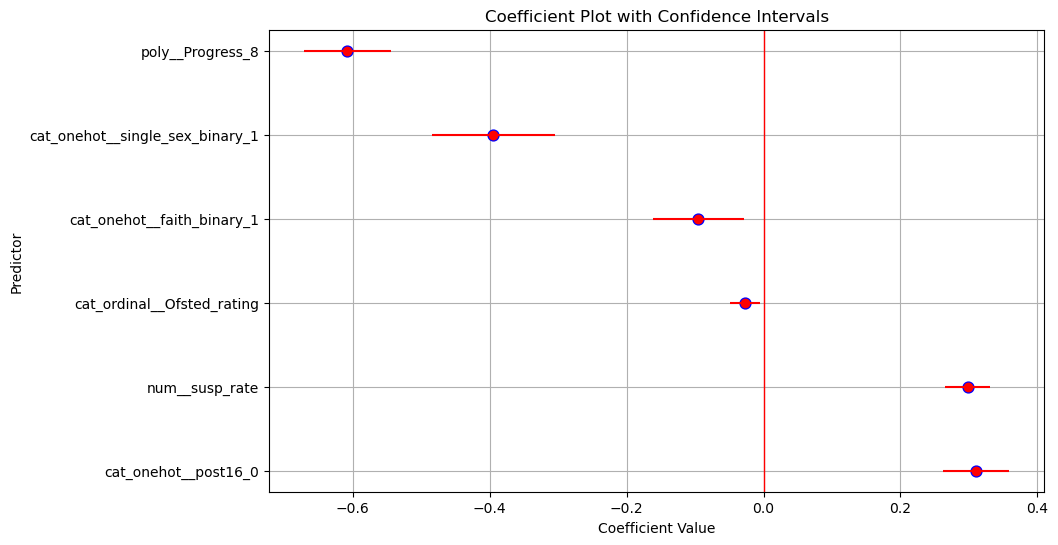

In [230]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

#coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
#coef_df['Predictor'] = coef_df['Predictor'].map(corr_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

In [231]:
coef_df

Predictor  Coefficient  Lower CI  Upper CI
3                 poly__Progress_8    -0.607723 -0.670706 -0.544739
5  cat_onehot__single_sex_binary_1    -0.394756 -0.484833 -0.304680
4       cat_onehot__faith_binary_1    -0.095439 -0.161783 -0.029095
2       cat_ordinal__Ofsted_rating    -0.027662 -0.049718 -0.005606
0                   num__susp_rate     0.297985  0.264742  0.331229
1             cat_onehot__post16_0     0.310646  0.262852  0.358440

### Add in control variables

#### individual controls

In [232]:
controls.info()

NameError: name 'controls' is not defined

In [233]:
control_results = {}

for c in controls:
    x = data_transformed[c]
    y = data_transformed['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    control_results[c] = model.summary()
    

NameError: name 'controls' is not defined

In [234]:
control_results

{}

#### all predictors and all controls

In [ ]:
x = predictors_controls

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
controls.info()

#### forward selection controls

In [235]:
x = data_transformed[[
   'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',

    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM'
]]

In [236]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.584
Model:                                   OLS   Adj. R-squared (uncentered):              0.583
Method:                        Least Squares   F-statistic:                              604.0
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:48   Log-Likelihood:                         -2959.9
No. Observations:                       3019   AIC:                                      5934.
Df Residuals:                           3012   BIC:                                      5976.
Df Model:                                  7                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.1650      0.015     10.757      0.000       0.135       0.195
cat_onehot__post16_0                0.2529      0.021     11.892      0.000       0.211       0.295
cat_ordinal__Ofsted_rating         -0.0133      0.010     -1.357      0.175      -0.032       0.006
poly__Progress_8                   -0.3558      0.029    -12.242      0.000      -0.413      -0.299
cat_onehot__faith_binary_1         -0.1191      0.029     -4.047      0.000      -0.177      -0.061
cat_onehot__single_sex_binary_1    -0.3747      0.040     -9.381      0.000      -0.453      -0.296
num__FSM                            0.4409      0.014     31.228      0.000       0.413       0.469
==============================================================================
Omnibus:                       38.821   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.480
Skew:                           0.015   Prob(JB):                     1.35e-15
Kurtosis:                       3.737   Cond. No.                         4.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
x = data_transformed[[
   'num__susp_rate',
    'cat_onehot__post16_0',
    #'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',

    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM'
]]

In [238]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.584
Model:                                   OLS   Adj. R-squared (uncentered):              0.583
Method:                        Least Squares   F-statistic:                              704.1
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:48   Log-Likelihood:                         -2960.9
No. Observations:                       3019   AIC:                                      5934.
Df Residuals:                           3013   BIC:                                      5970.
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.1641      0.015     10.705      0.000       0.134       0.194
cat_onehot__post16_0                0.2456      0.021     11.935      0.000       0.205       0.286
poly__Progress_8                   -0.3536      0.029    -12.183      0.000      -0.411      -0.297
cat_onehot__faith_binary_1         -0.1259      0.029     -4.341      0.000      -0.183      -0.069
cat_onehot__single_sex_binary_1    -0.3862      0.039     -9.893      0.000      -0.463      -0.310
num__FSM                            0.4418      0.014     31.322      0.000       0.414       0.469
==============================================================================
Omnibus:                       39.012   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.862
Skew:                           0.018   Prob(JB):                     1.11e-15
Kurtosis:                       3.739   Cond. No.                         4.38
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
x = data_transformed[[
   'num__susp_rate',
    'cat_onehot__post16_0',
    #'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',

    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    #'num__total_absence'
    'num__sen_support'
]]

In [240]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.591
Model:                                   OLS   Adj. R-squared (uncentered):              0.590
Method:                        Least Squares   F-statistic:                              620.6
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:48   Log-Likelihood:                         -2935.8
No. Observations:                       3019   AIC:                                      5886.
Df Residuals:                           3012   BIC:                                      5928.
Df Model:                                  7                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.1591      0.015     10.451      0.000       0.129       0.189
cat_onehot__post16_0                0.2289      0.021     11.138      0.000       0.189       0.269
poly__Progress_8                   -0.3157      0.029    -10.784      0.000      -0.373      -0.258
cat_onehot__faith_binary_1         -0.1194      0.029     -4.150      0.000      -0.176      -0.063
cat_onehot__single_sex_binary_1    -0.3540      0.039     -9.082      0.000      -0.430      -0.278
num__FSM                            0.4139      0.015     28.477      0.000       0.385       0.442
num__sen_support                    0.0978      0.014      7.096      0.000       0.071       0.125
==============================================================================
Omnibus:                       34.050   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.263
Skew:                          -0.024   Prob(JB):                     3.68e-13
Kurtosis:                       3.673   Cond. No.                         4.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
model.aic

5885.682150507388

In [242]:
x = data_transformed[[
   'num__susp_rate',
    'cat_onehot__post16_0',
    #'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',

    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    #'num__total_absence'
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2'
]]

In [243]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.612
Model:                                   OLS   Adj. R-squared (uncentered):              0.610
Method:                        Least Squares   F-statistic:                              526.8
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:49   Log-Likelihood:                         -2856.0
No. Observations:                       3019   AIC:                                      5730.
Df Residuals:                           3010   BIC:                                      5784.
Df Model:                                  9                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.1266      0.015      8.412      0.000       0.097       0.156
cat_onehot__post16_0                0.2597      0.025     10.468      0.000       0.211       0.308
poly__Progress_8                   -0.3100      0.029    -10.836      0.000      -0.366      -0.254
cat_onehot__faith_binary_1         -0.0940      0.030     -3.163      0.002      -0.152      -0.036
cat_onehot__single_sex_binary_1    -0.1629      0.042     -3.917      0.000      -0.244      -0.081
num__FSM                            0.3147      0.016     19.447      0.000       0.283       0.346
num__sen_support                    0.0518      0.014      3.726      0.000       0.025       0.079
poly__KS2_history                   0.0771      0.006     12.222      0.000       0.065       0.089
poly__KS2_history^2                -0.0007   6.03e-05    -12.312      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       27.418   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.530
Skew:                          -0.090   Prob(JB):                     2.61e-09
Kurtosis:                       3.531   Cond. No.                     4.06e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
model.aic

5729.996940139619

In [245]:
x = data_transformed[[
   'num__susp_rate',
    'cat_onehot__post16_0',
    #'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',

    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    #'num__total_absence'
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__White_British'
]]

In [246]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.620
Model:                                   OLS   Adj. R-squared (uncentered):              0.619
Method:                        Least Squares   F-statistic:                              491.1
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:49   Log-Likelihood:                         -2823.0
No. Observations:                       3019   AIC:                                      5666.
Df Residuals:                           3009   BIC:                                      5726.
Df Model:                                 10                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.1004      0.015      6.594      0.000       0.071       0.130
cat_onehot__post16_0                0.2301      0.025      9.274      0.000       0.181       0.279
poly__Progress_8                   -0.2196      0.030     -7.228      0.000      -0.279      -0.160
cat_onehot__faith_binary_1         -0.0740      0.030     -2.506      0.012      -0.132      -0.016
cat_onehot__single_sex_binary_1    -0.1223      0.041     -2.950      0.003      -0.204      -0.041
num__FSM                            0.4037      0.019     20.837      0.000       0.366       0.442
num__sen_support                    0.0314      0.014      2.243      0.025       0.004       0.059
poly__KS2_history                   0.0723      0.006     11.538      0.000       0.060       0.085
poly__KS2_history^2                -0.0007      6e-05    -11.624      0.000      -0.001      -0.001
num__White_British                  0.1241      0.015      8.159      0.000       0.094       0.154
==============================================================================
Omnibus:                       36.956   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.394
Skew:                          -0.096   Prob(JB):                     2.09e-13
Kurtosis:                       3.653   Cond. No.                     4.06e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:
x = data_transformed[[
   'num__susp_rate',
    'cat_onehot__post16_0',
    #'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',

    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    #'num__total_absence'
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__White_British',
    'cat_onehot__urban_binary_0'
]]

In [248]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.623
Model:                                   OLS   Adj. R-squared (uncentered):              0.621
Method:                        Least Squares   F-statistic:                              451.5
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:50   Log-Likelihood:                         -2812.1
No. Observations:                       3019   AIC:                                      5646.
Df Residuals:                           3008   BIC:                                      5712.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0995      0.015      6.555      0.000       0.070       0.129
cat_onehot__post16_0                0.2368      0.025      9.562      0.000       0.188       0.285
poly__Progress_8                   -0.2139      0.030     -7.057      0.000      -0.273      -0.154
cat_onehot__faith_binary_1         -0.0831      0.029     -2.821      0.005      -0.141      -0.025
cat_onehot__single_sex_binary_1    -0.1337      0.041     -3.231      0.001      -0.215      -0.053
num__FSM                            0.3899      0.020     19.953      0.000       0.352       0.428
num__sen_support                    0.0335      0.014      2.401      0.016       0.006       0.061
poly__KS2_history                   0.0757      0.006     12.044      0.000       0.063       0.088
poly__KS2_history^2                -0.0007   6.01e-05    -12.104      0.000      -0.001      -0.001
num__White_British                  0.1378      0.015      8.923      0.000       0.107       0.168
cat_onehot__urban_binary_0         -0.1626      0.035     -4.653      0.000      -0.231      -0.094
==============================================================================
Omnibus:                       37.902   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.409
Skew:                          -0.068   Prob(JB):                     1.70e-14
Kurtosis:                       3.697   Cond. No.                     4.08e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
model.aic

5646.28851326804

In [250]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    #'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',

    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    #'num__total_absence'
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__White_British',
    'cat_onehot__urban_binary_0'
]]

In [251]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.623
Model:                                   OLS   Adj. R-squared (uncentered):              0.621
Method:                        Least Squares   F-statistic:                              451.5
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:50   Log-Likelihood:                         -2812.1
No. Observations:                       3019   AIC:                                      5646.
Df Residuals:                           3008   BIC:                                      5712.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0995      0.015      6.555      0.000       0.070       0.129
cat_onehot__post16_0                0.2368      0.025      9.562      0.000       0.188       0.285
poly__Progress_8                   -0.2139      0.030     -7.057      0.000      -0.273      -0.154
cat_onehot__faith_binary_1         -0.0831      0.029     -2.821      0.005      -0.141      -0.025
cat_onehot__single_sex_binary_1    -0.1337      0.041     -3.231      0.001      -0.215      -0.053
num__FSM                            0.3899      0.020     19.953      0.000       0.352       0.428
num__sen_support                    0.0335      0.014      2.401      0.016       0.006       0.061
poly__KS2_history                   0.0757      0.006     12.044      0.000       0.063       0.088
poly__KS2_history^2                -0.0007   6.01e-05    -12.104      0.000      -0.001      -0.001
num__White_British                  0.1378      0.015      8.923      0.000       0.107       0.168
cat_onehot__urban_binary_0         -0.1626      0.035     -4.653      0.000      -0.231      -0.094
==============================================================================
Omnibus:                       37.902   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.409
Skew:                          -0.068   Prob(JB):                     1.70e-14
Kurtosis:                       3.697   Cond. No.                     4.08e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [252]:
model.aic

5646.28851326804

In [253]:
x = data_transformed[[
    
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    
    
    'poly__KS2_history',
    'poly__KS2_history^2',
    
    'num__White_British',
    'cat_onehot__urban_binary_0',
    'poly__Attainment_8',
    'poly__Attainment_8^2'
]]

In [254]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.631
Model:                                   OLS   Adj. R-squared (uncentered):              0.629
Method:                        Least Squares   F-statistic:                              427.9
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:50   Log-Likelihood:                         -2780.1
No. Observations:                       3019   AIC:                                      5584.
Df Residuals:                           3007   BIC:                                      5656.
Df Model:                                 12                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0927      0.015      6.167      0.000       0.063       0.122
cat_onehot__post16_0                0.2307      0.024      9.417      0.000       0.183       0.279
poly__Progress_8                   -0.8072      0.150     -5.372      0.000      -1.102      -0.513
cat_onehot__faith_binary_1         -0.0611      0.029     -2.084      0.037      -0.119      -0.004
cat_onehot__single_sex_binary_1    -0.1725      0.042     -4.156      0.000      -0.254      -0.091
num__FSM                            0.3886      0.019     20.383      0.000       0.351       0.426
poly__KS2_history                   0.1958      0.018     11.128      0.000       0.161       0.230
poly__KS2_history^2                -0.0020      0.000     -9.142      0.000      -0.002      -0.002
num__White_British                  0.1662      0.015     10.873      0.000       0.136       0.196
cat_onehot__urban_binary_0         -0.1609      0.035     -4.651      0.000      -0.229      -0.093
poly__Attainment_8                  0.0147      0.019      0.780      0.435      -0.022       0.052
poly__Attainment_8^2                0.0005   8.88e-05      5.722      0.000       0.000       0.001
==============================================================================
Omnibus:                       45.112   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.763
Skew:                          -0.076   Prob(JB):                     4.78e-18
Kurtosis:                       3.782   Cond. No.                     1.53e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [255]:
model.aic

5584.230941198066

In [256]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    
    
    'poly__KS2_history',
    'poly__KS2_history^2',
    
    'num__White_British',
    'cat_onehot__urban_binary_0',
    #'poly__Attainment_8',
    #'poly__Attainment_8^2',
    'cat_onehot__selective_1'
]]

In [257]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.623
Model:                                   OLS   Adj. R-squared (uncentered):              0.622
Method:                        Least Squares   F-statistic:                              451.9
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:51   Log-Likelihood:                         -2811.3
No. Observations:                       3019   AIC:                                      5645.
Df Residuals:                           3008   BIC:                                      5711.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0985      0.015      6.492      0.000       0.069       0.128
cat_onehot__post16_0                0.2397      0.025      9.697      0.000       0.191       0.288
poly__Progress_8                   -0.2140      0.030     -7.072      0.000      -0.273      -0.155
cat_onehot__faith_binary_1         -0.0707      0.030     -2.367      0.018      -0.129      -0.012
cat_onehot__single_sex_binary_1    -0.1573      0.042     -3.718      0.000      -0.240      -0.074
num__FSM                            0.3928      0.019     20.339      0.000       0.355       0.431
poly__KS2_history                   0.0923      0.008     11.881      0.000       0.077       0.108
poly__KS2_history^2                -0.0009   7.45e-05    -11.911      0.000      -0.001      -0.001
num__White_British                  0.1444      0.015      9.493      0.000       0.115       0.174
cat_onehot__urban_binary_0         -0.1596      0.035     -4.571      0.000      -0.228      -0.091
cat_onehot__selective_1             0.2130      0.078      2.732      0.006       0.060       0.366
==============================================================================
Omnibus:                       40.162   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.180
Skew:                          -0.073   Prob(JB):                     1.57e-15
Kurtosis:                       3.722   Cond. No.                     7.72e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [258]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    
    
    'poly__KS2_history',
    'poly__KS2_history^2',
    
    'num__White_British',
    'cat_onehot__urban_binary_0',
    #'poly__Attainment_8',
    #'poly__Attainment_8^2',
    'cat_onehot__selective_1',
    'cat_ordinal__IMD'
]]

In [259]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.624
Model:                                   OLS   Adj. R-squared (uncentered):              0.622
Method:                        Least Squares   F-statistic:                              415.1
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:51   Log-Likelihood:                         -2808.9
No. Observations:                       3019   AIC:                                      5642.
Df Residuals:                           3007   BIC:                                      5714.
Df Model:                                 12                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0986      0.015      6.502      0.000       0.069       0.128
cat_onehot__post16_0                0.2366      0.025      9.565      0.000       0.188       0.285
poly__Progress_8                   -0.2134      0.030     -7.055      0.000      -0.273      -0.154
cat_onehot__faith_binary_1         -0.0810      0.030     -2.682      0.007      -0.140      -0.022
cat_onehot__single_sex_binary_1    -0.1616      0.042     -3.819      0.000      -0.245      -0.079
num__FSM                            0.3737      0.021     17.628      0.000       0.332       0.415
poly__KS2_history                   0.0928      0.008     11.945      0.000       0.078       0.108
poly__KS2_history^2                -0.0009   7.44e-05    -11.910      0.000      -0.001      -0.001
num__White_British                  0.1467      0.015      9.629      0.000       0.117       0.177
cat_onehot__urban_binary_0         -0.1581      0.035     -4.529      0.000      -0.227      -0.090
cat_onehot__selective_1             0.1808      0.079      2.280      0.023       0.025       0.336
cat_ordinal__IMD                   -0.0110      0.005     -2.167      0.030      -0.021      -0.001
==============================================================================
Omnibus:                       38.580   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.913
Skew:                          -0.079   Prob(JB):                     1.32e-14
Kurtosis:                       3.695   Cond. No.                     7.85e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
model.aic

5641.875272282327

In [261]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             3019 non-null   float64
 1   cat_onehot__post16_1             3019 non-null   float64
 2   cat_onehot__faith_binary_0       3019 non-null   float64
 3   cat_onehot__faith_binary_1       3019 non-null   float64
 4   cat_onehot__single_sex_binary_0  3019 non-null   float64
 5   cat_onehot__single_sex_binary_1  3019 non-null   float64
 6   cat_onehot__urban_binary_0       3019 non-null   float64
 7   cat_onehot__urban_binary_1       3019 non-null   float64
 8   cat_onehot__selective_0          3019 non-null   float64
 9   cat_onehot__selective_1          3019 non-null   float64
 10  poly__KS2_history                3019 non-null   float64
 11  poly__Attainment_8               3019 non-null   float64
 12  poly__Progress_8    

In [262]:
model.aic

5641.875272282327

In [263]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__White_British',
    'cat_onehot__urban_binary_0',
    'cat_onehot__selective_1',
    'cat_ordinal__IMD'
]]

In [264]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.624
Model:                                   OLS   Adj. R-squared (uncentered):              0.622
Method:                        Least Squares   F-statistic:                              415.1
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:52   Log-Likelihood:                         -2808.9
No. Observations:                       3019   AIC:                                      5642.
Df Residuals:                           3007   BIC:                                      5714.
Df Model:                                 12                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0986      0.015      6.502      0.000       0.069       0.128
cat_onehot__post16_0                0.2366      0.025      9.565      0.000       0.188       0.285
poly__Progress_8                   -0.2134      0.030     -7.055      0.000      -0.273      -0.154
cat_onehot__faith_binary_1         -0.0810      0.030     -2.682      0.007      -0.140      -0.022
cat_onehot__single_sex_binary_1    -0.1616      0.042     -3.819      0.000      -0.245      -0.079
num__FSM                            0.3737      0.021     17.628      0.000       0.332       0.415
poly__KS2_history                   0.0928      0.008     11.945      0.000       0.078       0.108
poly__KS2_history^2                -0.0009   7.44e-05    -11.910      0.000      -0.001      -0.001
num__White_British                  0.1467      0.015      9.629      0.000       0.117       0.177
cat_onehot__urban_binary_0         -0.1581      0.035     -4.529      0.000      -0.227      -0.090
cat_onehot__selective_1             0.1808      0.079      2.280      0.023       0.025       0.336
cat_ordinal__IMD                   -0.0110      0.005     -2.167      0.030      -0.021      -0.001
==============================================================================
Omnibus:                       38.580   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.913
Skew:                          -0.079   Prob(JB):                     1.32e-14
Kurtosis:                       3.695   Cond. No.                     7.85e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [265]:
model.aic

5641.875272282327

In [266]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [267]:
vif_values

predictor          VIF
3        cat_onehot__faith_binary_1     1.342545
9        cat_onehot__urban_binary_0     1.373900
4   cat_onehot__single_sex_binary_1     1.611603
1              cat_onehot__post16_0     1.834842
0                    num__susp_rate     1.835273
8                num__White_British     1.855376
2                  poly__Progress_8     1.980590
10          cat_onehot__selective_1     2.662770
5                          num__FSM     3.590663
11                 cat_ordinal__IMD     6.104825
6                 poly__KS2_history  5265.568777
7               poly__KS2_history^2  5299.347829

In [268]:
x

num__susp_rate  cat_onehot__post16_0  poly__Progress_8  \
0           1.644319                   0.0             -0.23   
1           0.677732                   1.0              0.41   
2           0.968319                   1.0              0.17   
3          -0.101542                   0.0             -0.26   
4           0.321324                   0.0             -0.08   
...              ...                   ...               ...   
3014       -1.616767                   0.0              0.66   
3015       -0.671615                   0.0              0.57   
3016       -0.018630                   0.0              0.36   
3017       -0.728495                   0.0              0.01   
3018       -2.203297                   1.0              1.07   

      cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_1  num__FSM  \
0                            0.0                              0.0  0.706522   
1                            0.0                              0.0 -0.698502   
2                            0.0                              0.0  1.503909   
3                            0.0                              0.0 -0.403288   
4                            1.0                              0.0  0.037135   
...                          ...                              ...       ...   
3014                         0.0                              1.0 -1.290962   
3015                         0.0                              0.0 -1.484668   
3016                         0.0                              0.0 -0.569868   
3017                         1.0                              0.0  0.082049   
3018                         1.0                              0.0 -2.410905   

      poly__KS2_history  poly__KS2_history^2  num__White_British  \
0                 102.2             10444.84            1.080426   
1                 104.7             10962.09            0.809697   
2                 102.1             10424.41            0.862605   
3                 105.2             11067.04            1.026688   
4                 104.2             10857.64           -0.248830   
...                 ...                  ...                 ...   
3014              106.8             11406.24           -0.512587   
3015              104.9             11004.01           -0.583207   
3016              104.1             10836.81           -0.175007   
3017              101.4             10281.96           -0.663499   
3018              101.6             10322.56            0.870763   

      cat_onehot__urban_binary_0  cat_onehot__selective_1  cat_ordinal__IMD  
0                            1.0                      0.0               6.0  
1                            0.0                      0.0               3.0  
2                            0.0                      0.0               4.0  
3                            0.0                      0.0               4.0  
4                            0.0                      0.0               8.0  
...                          ...                      ...               ...  
3014                         0.0                      0.0               9.0  
3015                         0.0                      0.0               8.0  
3016                         0.0                      0.0               8.0  
3017                         1.0                      0.0               9.0  
3018                         1.0                      0.0               6.0  

[3019 rows x 12 columns]

In [269]:
x = x.drop(columns=['poly__KS2_history^2'])

vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [270]:
vif_values

predictor       VIF
3        cat_onehot__faith_binary_1  1.336174
8        cat_onehot__urban_binary_0  1.362048
4   cat_onehot__single_sex_binary_1  1.600665
9           cat_onehot__selective_1  1.673439
0                    num__susp_rate  1.814327
1              cat_onehot__post16_0  1.829763
7                num__White_British  1.841984
2                  poly__Progress_8  1.971667
5                          num__FSM  2.919752
10                 cat_ordinal__IMD  6.104735
6                 poly__KS2_history  7.743118

## Final Model

In [271]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__White_British',
    'cat_onehot__urban_binary_0',
    'cat_onehot__selective_1',
    'cat_ordinal__IMD'
]]

In [272]:
y = data_transformed['Not_Sustained_transformed']

In [273]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.624
Model:                                   OLS   Adj. R-squared (uncentered):              0.622
Method:                        Least Squares   F-statistic:                              415.1
Date:                       Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                               12:52:54   Log-Likelihood:                         -2808.9
No. Observations:                       3019   AIC:                                      5642.
Df Residuals:                           3007   BIC:                                      5714.
Df Model:                                 12                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0986      0.015      6.502      0.000       0.069       0.128
cat_onehot__post16_0                0.2366      0.025      9.565      0.000       0.188       0.285
poly__Progress_8                   -0.2134      0.030     -7.055      0.000      -0.273      -0.154
cat_onehot__faith_binary_1         -0.0810      0.030     -2.682      0.007      -0.140      -0.022
cat_onehot__single_sex_binary_1    -0.1616      0.042     -3.819      0.000      -0.245      -0.079
num__FSM                            0.3737      0.021     17.628      0.000       0.332       0.415
poly__KS2_history                   0.0928      0.008     11.945      0.000       0.078       0.108
poly__KS2_history^2                -0.0009   7.44e-05    -11.910      0.000      -0.001      -0.001
num__White_British                  0.1467      0.015      9.629      0.000       0.117       0.177
cat_onehot__urban_binary_0         -0.1581      0.035     -4.529      0.000      -0.227      -0.090
cat_onehot__selective_1             0.1808      0.079      2.280      0.023       0.025       0.336
cat_ordinal__IMD                   -0.0110      0.005     -2.167      0.030      -0.021      -0.001
==============================================================================
Omnibus:                       38.580   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.913
Skew:                          -0.079   Prob(JB):                     1.32e-14
Kurtosis:                       3.695   Cond. No.                     7.85e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [274]:
model.aic

5641.875272282327

### VIF scores and corr matrix

In [275]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [276]:
vif_values

predictor          VIF
3        cat_onehot__faith_binary_1     1.342545
9        cat_onehot__urban_binary_0     1.373900
4   cat_onehot__single_sex_binary_1     1.611603
1              cat_onehot__post16_0     1.834842
0                    num__susp_rate     1.835273
8                num__White_British     1.855376
2                  poly__Progress_8     1.980590
10          cat_onehot__selective_1     2.662770
5                          num__FSM     3.590663
11                 cat_ordinal__IMD     6.104825
6                 poly__KS2_history  5265.568777
7               poly__KS2_history^2  5299.347829

In [277]:
x.describe()

num__susp_rate  cat_onehot__post16_0  poly__Progress_8  \
count    3.019000e+03           3019.000000       3019.000000   
mean    -3.706873e-16              0.375290         -0.002040   
std      1.000166e+00              0.484278          0.520611   
min     -2.203297e+00              0.000000         -5.090000   
25%     -6.810558e-01              0.000000         -0.340000   
50%      1.348100e-02              0.000000         -0.010000   
75%      6.870645e-01              1.000000          0.340000   
max      3.181444e+00              1.000000          2.550000   

       cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_1  \
count                 3019.000000                       3019.00000   
mean                     0.184167                          0.11262   
std                      0.387684                          0.31618   
min                      0.000000                          0.00000   
25%                      0.000000                          0.00000   
50%                      0.000000                          0.00000   
75%                      0.000000                          0.00000   
max                      1.000000                          1.00000   

          num__FSM  poly__KS2_history  poly__KS2_history^2  \
count  3019.000000        3019.000000          3019.000000   
mean      0.000000         104.493607         10926.368923   
std       1.000166           2.730835           581.252835   
min      -3.188490          94.500000          8930.250000   
25%      -0.707900         102.900000         10588.410000   
50%      -0.015967         104.300000         10878.490000   
75%       0.719233         105.600000         11151.360000   
max       2.599540         117.000000         13689.000000   

       num__White_British  cat_onehot__urban_binary_0  \
count        3.019000e+03                 3019.000000   
mean        -2.824284e-17                    0.141106   
std          1.000166e+00                    0.348189   
min         -1.952838e+00                    0.000000   
25%         -7.955974e-01                    0.000000   
50%          3.432427e-01                    0.000000   
75%          8.544521e-01                    0.000000   
max          1.301543e+00                    1.000000   

       cat_onehot__selective_1  cat_ordinal__IMD  
count              3019.000000       3019.000000  
mean                  0.052998          4.634978  
std                   0.224066          2.832510  
min                   0.000000          0.000000  
25%                   0.000000          2.000000  
50%                   0.000000          5.000000  
75%                   0.000000          7.000000  
max                   1.000000          9.000000

In [278]:
vars = x.columns.tolist()
vars

['num__susp_rate',
 'cat_onehot__post16_0',
 'poly__Progress_8',
 'cat_onehot__faith_binary_1',
 'cat_onehot__single_sex_binary_1',
 'num__FSM',
 'poly__KS2_history',
 'poly__KS2_history^2',
 'num__White_British',
 'cat_onehot__urban_binary_0',
 'cat_onehot__selective_1',
 'cat_ordinal__IMD']

In [279]:
vars_for_corr = data_transformed[['num__susp_rate',
 'cat_onehot__post16_0',
 'poly__Progress_8',
 'cat_onehot__faith_binary_1',
 'cat_onehot__single_sex_binary_1',
 'num__FSM',
 'poly__KS2_history',
 'poly__KS2_history^2',
 'num__White_British',
 'cat_onehot__urban_binary_0',
 'cat_onehot__selective_1',
 'cat_ordinal__IMD']
]


In [280]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

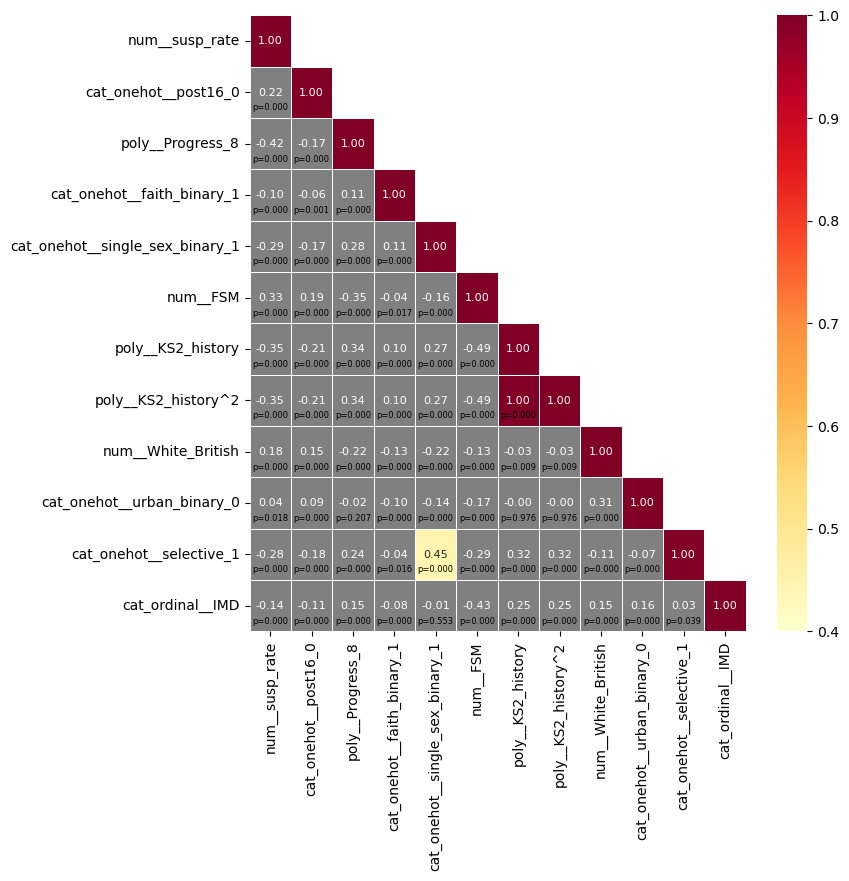

In [281]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


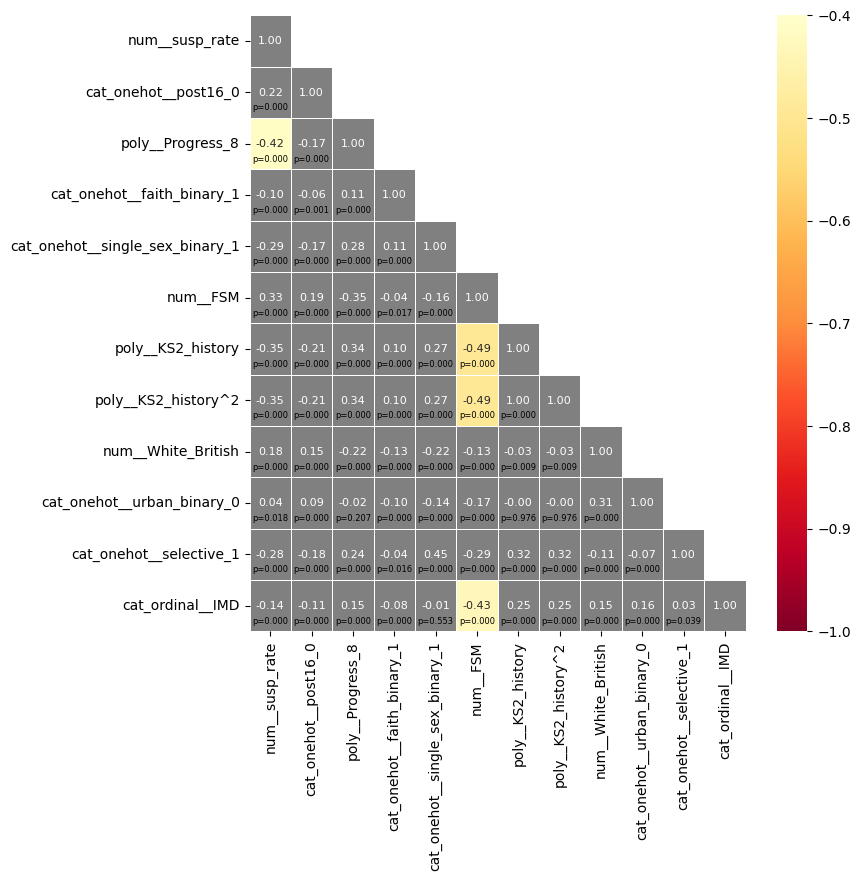

In [282]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

### Visualise

In [283]:
reg_names = {
    'Not_Sustained_transformed': 'Not sustained %', 
    'num__total_absence': 'Absence %', 
    #'persistent_absence': 'Persistent absence %',
    #'perm_excl_rate': 'Permanent exclusion %', 
    'num__susp_rate': 'Suspension %', 
    #'one_plus_susp_rate': 'One-plus suspension %', 
    'num__FSM': 'FSM %',
    'num__White_British': 'White British %', 
    #'EAL': 'EAL %', 
    'num__perc_boys': 'Boys %', 
    'num__sen_support': 'SEN support %', 
    #'ehcp': 'EHCP %', 
    'poly__headcount': 'School headcount',
    #'KS4_headcount': 'KS4 headcount', 
    #'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    #'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    #'Ofsted_num': 'Ofsted rating',
    'poly__KS2_history': 'KS2 score', 
    'poly__KS2_history^2': 'KS2 score ^2', 
    #'Attainment_8': 'A8', 
    'poly__Progress_8': 'P8',
    'cat_onehot__selective_1': 'Selective schools', 
    'cat_onehot__post16_0': 'No Post-16', 
    'cat_ordinal__IMD': 'IMD of LSOA', 
    'cat_onehot__urban_binary_0': 'Rural schools', 
    'cat_onehot__single_sex_binary_1': 'Single sex schools',
    'cat_onehot__faith_binary_1': 'Faith schools'
}

In [284]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             3019 non-null   float64
 1   cat_onehot__post16_1             3019 non-null   float64
 2   cat_onehot__faith_binary_0       3019 non-null   float64
 3   cat_onehot__faith_binary_1       3019 non-null   float64
 4   cat_onehot__single_sex_binary_0  3019 non-null   float64
 5   cat_onehot__single_sex_binary_1  3019 non-null   float64
 6   cat_onehot__urban_binary_0       3019 non-null   float64
 7   cat_onehot__urban_binary_1       3019 non-null   float64
 8   cat_onehot__selective_0          3019 non-null   float64
 9   cat_onehot__selective_1          3019 non-null   float64
 10  poly__KS2_history                3019 non-null   float64
 11  poly__Attainment_8               3019 non-null   float64
 12  poly__Progress_8    

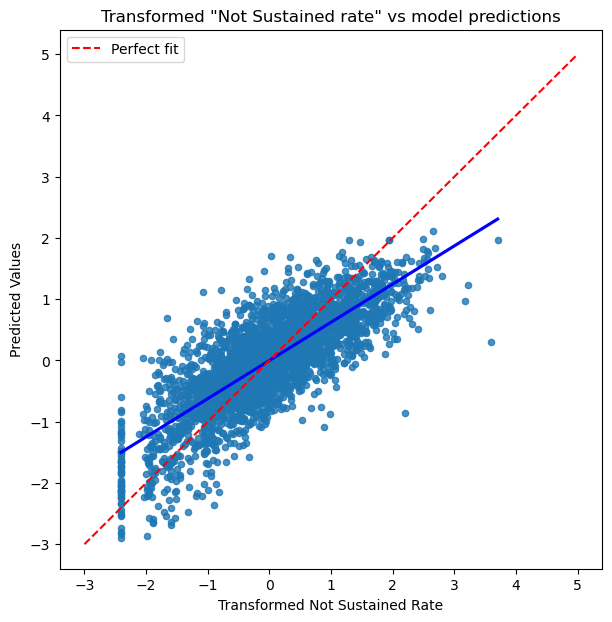

In [285]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['Not_Sustained_transformed'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([-3, 5], 
         [-3, 5], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Transformed "Not Sustained rate" vs model predictions')
plt.xlabel('Transformed Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

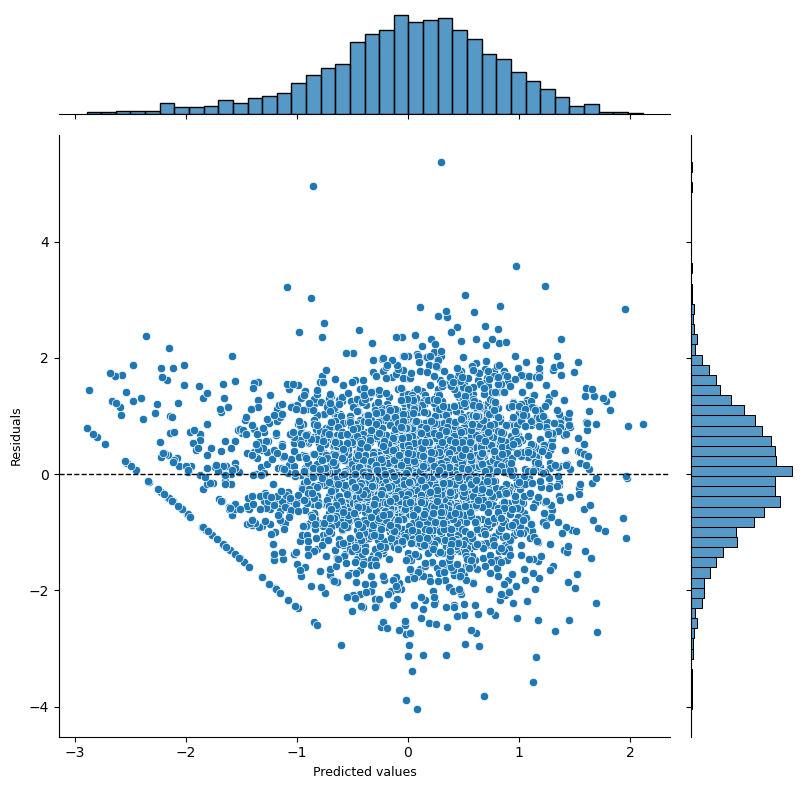

In [286]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

### Partial Residuals Plots

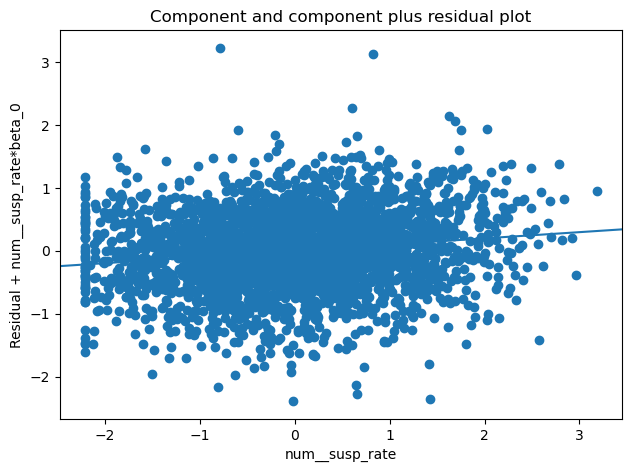

In [287]:
fig = sm.graphics.plot_ccpr(model, 'num__susp_rate')
fig.tight_layout(pad=1.0)

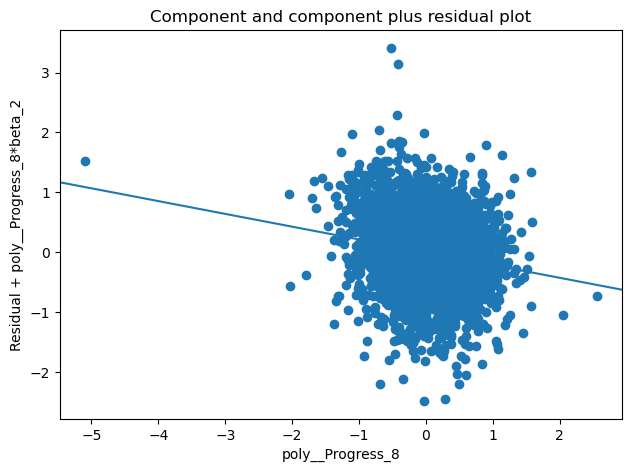

In [288]:
fig = sm.graphics.plot_ccpr(model, 'poly__Progress_8')
fig.tight_layout(pad=1.0)

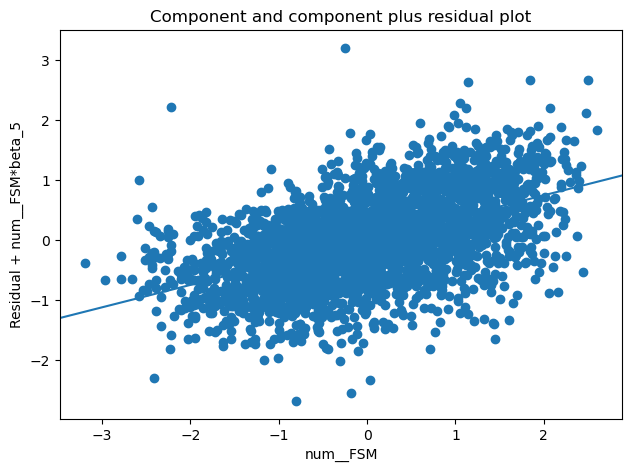

In [289]:
fig = sm.graphics.plot_ccpr(model, 'num__FSM')
fig.tight_layout(pad=1.0)

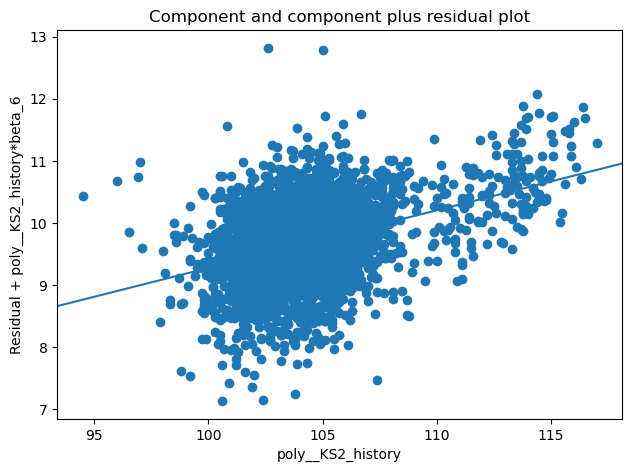

In [290]:
fig = sm.graphics.plot_ccpr(model, 'poly__KS2_history')
fig.tight_layout(pad=1.0)

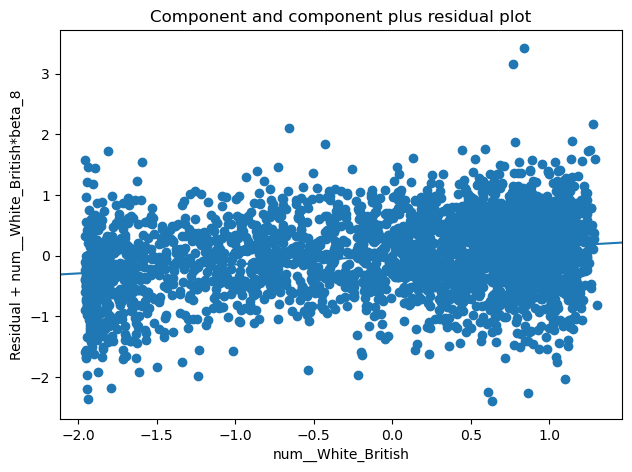

In [291]:
fig = sm.graphics.plot_ccpr(model, 'num__White_British')
fig.tight_layout(pad=1.0)

### Other model diagnostic plots

/Users/gysd/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


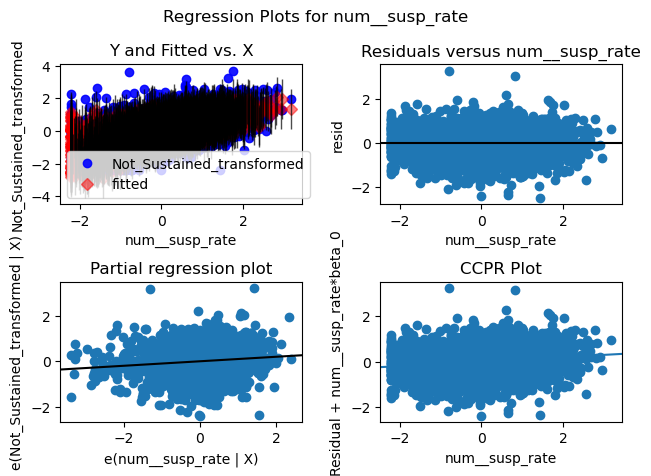

In [292]:
fig = sm.graphics.plot_regress_exog(model, "num__susp_rate")
fig.tight_layout(pad=1.0)

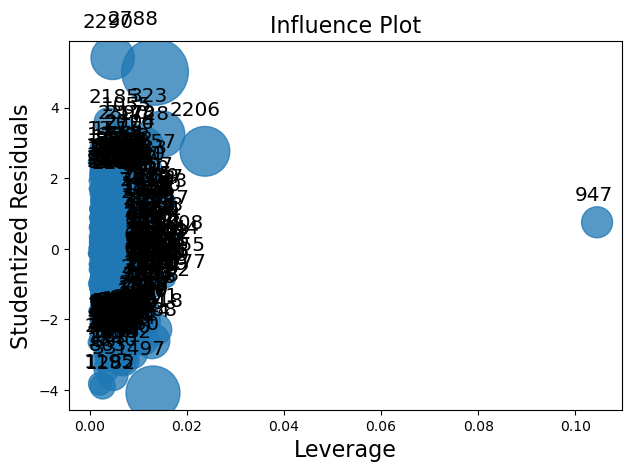

In [293]:
fig = sm.graphics.influence_plot(model)
fig.tight_layout(pad=1.0)

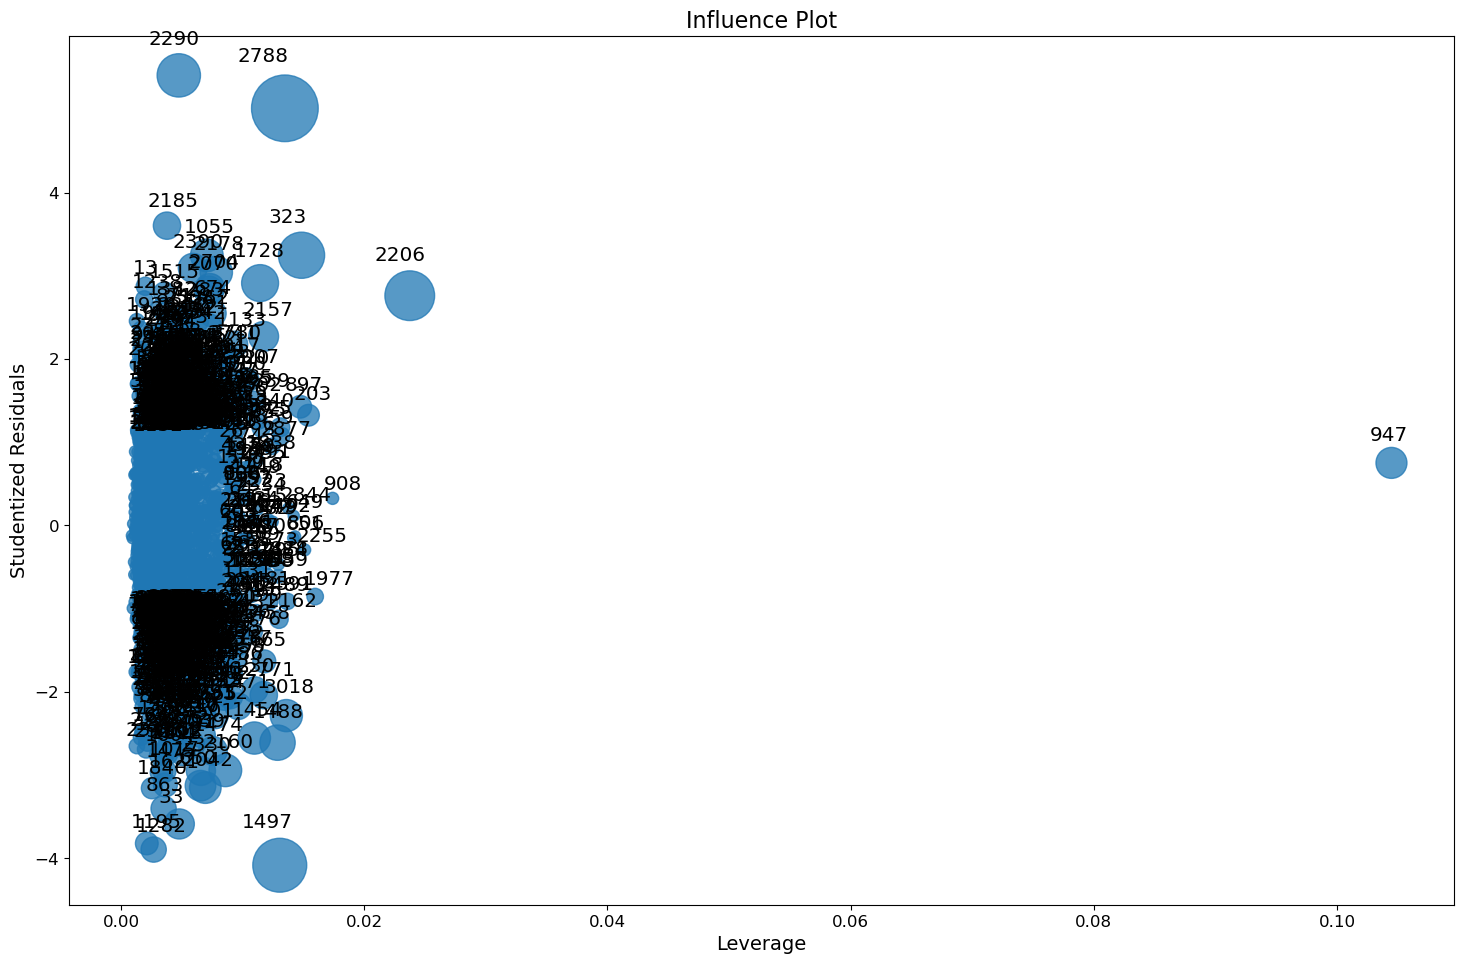

In [294]:
fig, ax = plt.subplots(figsize=(15, 10))  
sm.graphics.influence_plot(
    model, 
    ax=ax, 
    criterion="cooks", 
    #size=8,  
    alpha=0.3, 
    labels=5  
)

# plot labels 
ax.set_title("Influence Plot", fontsize=16)
ax.set_xlabel("Leverage", fontsize=14)
ax.set_ylabel("Studentized Residuals", fontsize=14)
ax.tick_params(axis="both", labelsize=12)

# Adjust layout for better spacing
fig.tight_layout(pad=2.0)

plt.show()

In [295]:
data_transformed.loc[2788]

cat_onehot__post16_0                   0.000000
cat_onehot__post16_1                   1.000000
cat_onehot__faith_binary_0             0.000000
cat_onehot__faith_binary_1             1.000000
cat_onehot__single_sex_binary_0        0.000000
cat_onehot__single_sex_binary_1        1.000000
cat_onehot__urban_binary_0             0.000000
cat_onehot__urban_binary_1             1.000000
cat_onehot__selective_0                1.000000
cat_onehot__selective_1                0.000000
poly__KS2_history                    105.000000
poly__Attainment_8                    41.800000
poly__Progress_8                      -0.420000
poly__headcount                      249.000000
poly__KS2_history^2                11025.000000
poly__KS2_history Attainment_8      4389.000000
poly__KS2_history Progress_8         -44.100000
poly__KS2_history headcount        26145.000000
poly__Attainment_8^2                1747.240000
poly__Attainment_8 Progress_8        -17.556000
poly__Attainment_8 headcount       10408

In [296]:
data.loc[data['headcount'] == 249]

URN  not_sustained_rate              urban_rural denomination  FSM  \
2949  134195           17.142857  Urban major conurbation  Other faith  3.8   

      White_British region_name                school_name  headcount  \
2949           84.2  North West  Manchester Mesivta School      249.0   

      susp_rate  KS2_history  Attainment_8  Progress_8  selective POSTCODE  \
2949    12.4498        105.0          41.8       -0.42          0  M25 0PH   

      post16 school_sex                    type         Ofsted_rating  \
2949       1       Boys  Voluntary aided school  Requires improvement   

      sen_support     LSOA11  IMD  single_sex_binary  faith_binary region_new  \
2949    20.647773  E01005045  4.0                  1             1      North   

     urban_binary Ofsted_num  
2949            1          2

In [297]:
data.loc[2949]

URN                                      134195
not_sustained_rate                    17.142857
urban_rural             Urban major conurbation
denomination                        Other faith
FSM                                         3.8
White_British                              84.2
region_name                          North West
school_name           Manchester Mesivta School
headcount                                 249.0
susp_rate                               12.4498
KS2_history                               105.0
Attainment_8                               41.8
Progress_8                                -0.42
selective                                     0
POSTCODE                                M25 0PH
post16                                        1
school_sex                                 Boys
type                     Voluntary aided school
Ofsted_rating              Requires improvement
sen_support                           20.647773
LSOA11                                E0

In [298]:
data_transformed.loc[1497]

cat_onehot__post16_0                    0.000000
cat_onehot__post16_1                    1.000000
cat_onehot__faith_binary_0              1.000000
cat_onehot__faith_binary_1              0.000000
cat_onehot__single_sex_binary_0         1.000000
cat_onehot__single_sex_binary_1         0.000000
cat_onehot__urban_binary_0              0.000000
cat_onehot__urban_binary_1              1.000000
cat_onehot__selective_0                 0.000000
cat_onehot__selective_1                 1.000000
poly__KS2_history                     107.400000
poly__Attainment_8                     52.400000
poly__Progress_8                       -0.030000
poly__headcount                       685.000000
poly__KS2_history^2                 11534.760000
poly__KS2_history Attainment_8       5627.760000
poly__KS2_history Progress_8           -3.222000
poly__KS2_history headcount         73569.000000
poly__Attainment_8^2                 2745.760000
poly__Attainment_8 Progress_8          -1.572000
poly__Attainment_8 h

In [299]:
data.loc[data['headcount'] == 685]

URN  not_sustained_rate              urban_rural denomination   FSM  \
1574  138757            0.000000      Urban city and town     No faith  22.0   
1892  141338            6.870229  Urban major conurbation    Christian  35.8   
2726  145372            8.571429      Urban city and town     No faith  51.6   

      White_British    region_name  \
1574           80.8  East Midlands   
1892           89.7     North West   
2726           83.1     South East   

                                     school_name  headcount  susp_rate  \
1574                     Skegness Grammar School      685.0   23.35766   
1892  St Michael's Church of England High School      685.0    9.19708   
2726                         Castle View Academy      685.0   56.64234   

      KS2_history  Attainment_8  Progress_8  selective  POSTCODE  post16  \
1574        107.4          52.4       -0.03          1  PE25 2QS       1   
1892        104.2          36.6       -0.91          0   L23 7UL       1   
2726        100.5          34.2       -0.59          0   PO6 4QP       0   

     school_sex                 type Ofsted_rating  sen_support     LSOA11  \
1574      Mixed    Academy converter          Good     9.171598  E01026084   
1892      Mixed  Academy sponsor led    Inadequate    14.558824  E01006943   
2726      Mixed    Academy converter          Good    14.701601  E01017113   

       IMD  single_sex_binary  faith_binary region_new urban_binary Ofsted_num  
1574   2.0                  0             0   Midlands            1          3  
1892  10.0                  0             1      North            1          1  
2726   5.0                  0             0      South            1          3

In [300]:
data.loc[1574]

URN                                    138757
not_sustained_rate                        0.0
urban_rural               Urban city and town
denomination                         No faith
FSM                                      22.0
White_British                            80.8
region_name                     East Midlands
school_name           Skegness Grammar School
headcount                               685.0
susp_rate                            23.35766
KS2_history                             107.4
Attainment_8                             52.4
Progress_8                              -0.03
selective                                   1
POSTCODE                             PE25 2QS
post16                                      1
school_sex                              Mixed
type                        Academy converter
Ofsted_rating                            Good
sen_support                          9.171598
LSOA11                              E01026084
IMD                               

### Coefficient plot

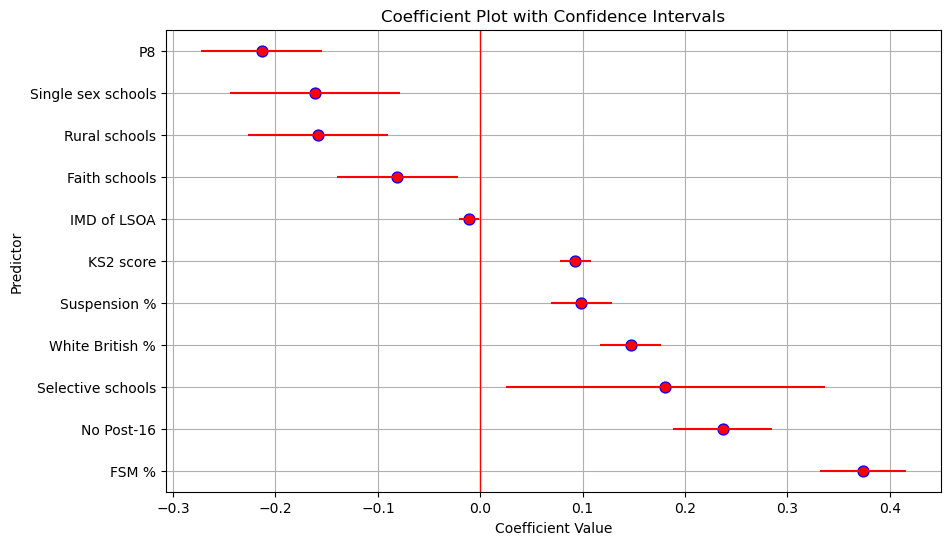

In [301]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

coef_df = coef_df[coef_df['Predictor'] != 'poly__KS2_history^2']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
coef_df['Predictor'] = coef_df['Predictor'].map(reg_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

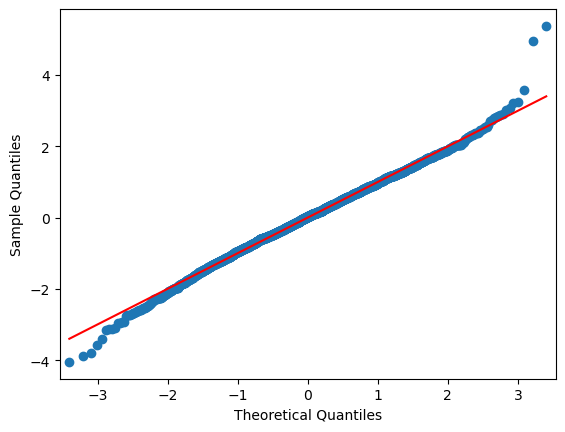

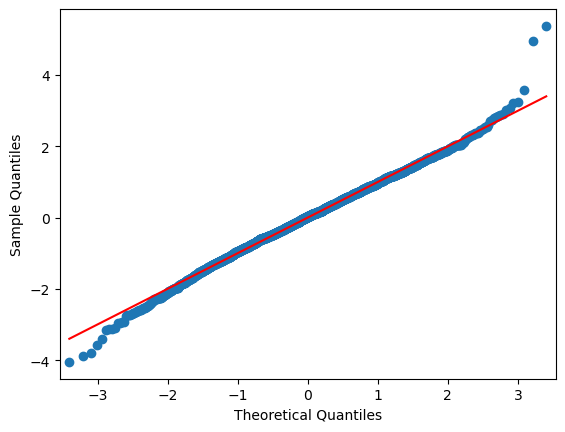

In [302]:
qqplot(model.resid_pearson, line='r')

# Add predictions and residuals to dataframe

In [303]:
data['predictions'] = model.fittedvalues

In [304]:
data['residuals'] = model.resid_pearson

Residuals: positive values indicate true value is higher than the model predicts. Negative values that the true value is lower. 

In [305]:
data.describe()

URN  not_sustained_rate          FSM  White_British  \
count    3019.000000         3019.000000  3019.000000    3019.000000   
mean   134557.034117            6.069752    26.105532      62.505399   
std     11868.325555            3.886195    13.322203      28.863703   
min    100049.000000            0.000000     0.000000       0.000000   
25%    136064.500000            3.365385    15.900000      42.450000   
50%    137531.000000            5.347594    24.100000      73.500000   
75%    141002.500000            8.047825    34.700000      86.300000   
max    149457.000000           30.412371    70.900000      97.100000   

         headcount    susp_rate  KS2_history  Attainment_8   Progress_8  \
count  3019.000000  3019.000000  3019.000000   3019.000000  3019.000000   
mean   1120.146406     8.963233   104.493607     46.997416    -0.002040   
std     384.776198    11.932410     2.730835      9.448421     0.520611   
min      93.000000     0.000000    94.500000      0.800000    -5.090000   
25%     852.000000     2.435195   102.900000     40.850000    -0.340000   
50%    1085.000000     5.319910   104.300000     45.900000    -0.010000   
75%    1361.500000    10.787840   105.600000     51.300000     0.340000   
max    3078.000000   166.062180   117.000000     86.600000     2.550000   

         selective       post16  sen_support          IMD  single_sex_binary  \
count  3019.000000  3019.000000  3019.000000  3019.000000         3019.00000   
mean      0.052998     0.624710    13.318471     5.634978            0.11262   
std       0.224066     0.484278     5.446792     2.832510            0.31618   
min       0.000000     0.000000     0.158983     1.000000            0.00000   
25%       0.000000     0.000000     9.730936     3.000000            0.00000   
50%       0.000000     1.000000    13.105413     6.000000            0.00000   
75%       0.000000     1.000000    16.432107     8.000000            0.00000   
max       1.000000     1.000000    42.857143    10.000000            1.00000   

       faith_binary  predictions    residuals  
count   3019.000000  2856.000000  3019.000000  
mean       0.184167    -0.002536     0.000113  
std        0.387684     0.788516     0.998176  
min        0.000000    -2.893200    -4.046126  
25%        0.000000    -0.447168    -0.606706  
50%        0.000000     0.048849     0.031132  
75%        0.000000     0.529438     0.670833  
max        1.000000     2.113213     5.370968

In [306]:
data.head()

URN  not_sustained_rate              urban_rural denomination   FSM  \
1  138116           13.286713    Rural town and fringe     No faith  34.5   
2  137899            4.417671  Urban minor conurbation     No faith  16.0   
3  146639            4.132231  Urban minor conurbation     No faith  48.2   
4  137603            6.302521  Urban minor conurbation     No faith  19.3   
5  140865            3.053435  Urban minor conurbation    Christian  24.8   

   White_British               region_name                       school_name  \
1           91.8  Yorkshire and The Humber                Campsmount Academy   
2           85.2  Yorkshire and The Humber                 Hungerhill School   
3           86.5  Yorkshire and The Humber                The Laurel Academy   
4           90.5  Yorkshire and The Humber                  Ridgewood School   
5           57.9  Yorkshire and The Humber  The McAuley Catholic High School   

   headcount  susp_rate  KS2_history  Attainment_8  Progress_8  selective  \
1      789.0   29.40431        102.2          39.9       -0.23          0   
2     1170.0   10.68376        104.7          51.1        0.41          0   
3      699.0   14.44921        102.1          43.5        0.17          0   
4     1468.0    4.70027        105.2          45.6       -0.26          0   
5     1425.0    7.36842        104.2          45.6       -0.08          0   

  POSTCODE  post16 school_sex                 type Ofsted_rating  sen_support  \
1  DN6 9AS       1      Mixed    Academy converter          Good    13.384813   
2  DN3 2JY       0      Mixed    Academy converter   Outstanding    10.324232   
3  S64 9SD       0      Mixed  Academy sponsor led          Good    12.907801   
4  DN5 7UB       1      Mixed    Academy converter          Good    11.324640   
5  DN3 3QF       1      Mixed    Academy converter          Good    11.863224   

      LSOA11  IMD  single_sex_binary  faith_binary region_new urban_binary  \
1  E01007493  7.0                  0             0      North            0   
2  E01007478  4.0                  0             0      North            1   
3  E01007583  5.0                  0             0      North            1   
4  E01007588  5.0                  0             0      North            1   
5  E01007603  9.0                  0             1      North            1   

  Ofsted_num  predictions  residuals  
1          3     0.035738   1.612536  
2          4     1.170921  -0.512362  
3          3    -0.050219  -2.503352  
4          3    -0.101791   0.473755  
5          3     0.690576  -1.032645

In [307]:
data.to_csv('predictions_residuals.csv', index=False)

### Visualise residuals

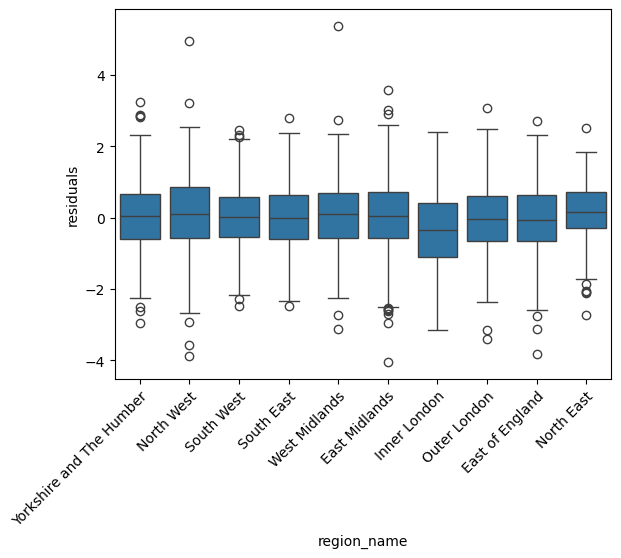

In [308]:
sns.boxplot(data=data, x='region_name', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

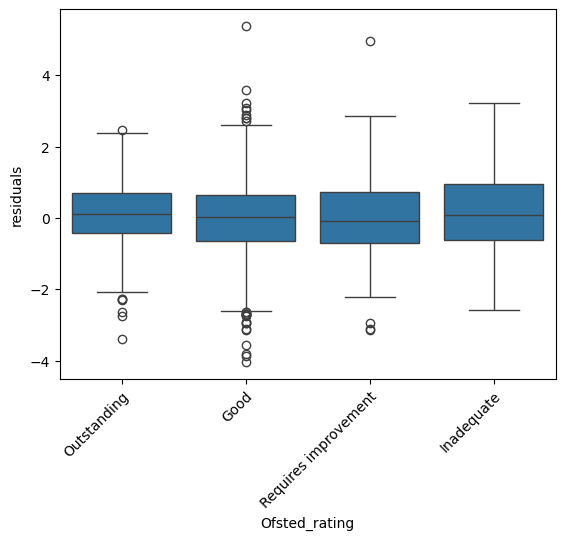

In [309]:
sns.boxplot(data=data, x='Ofsted_rating', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

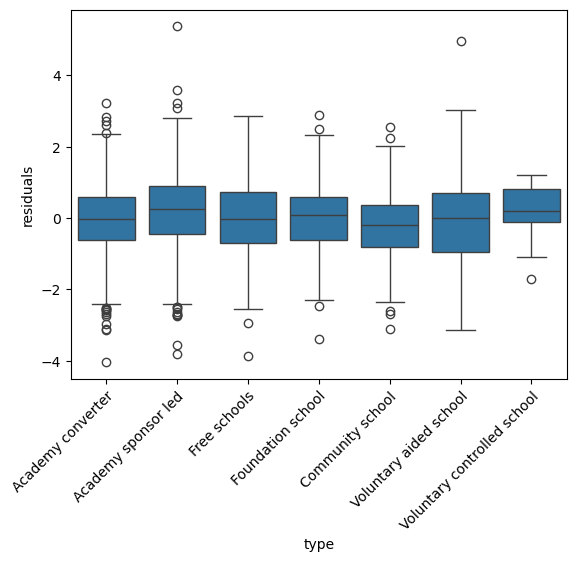

In [310]:
sns.boxplot(data=data, x='type', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

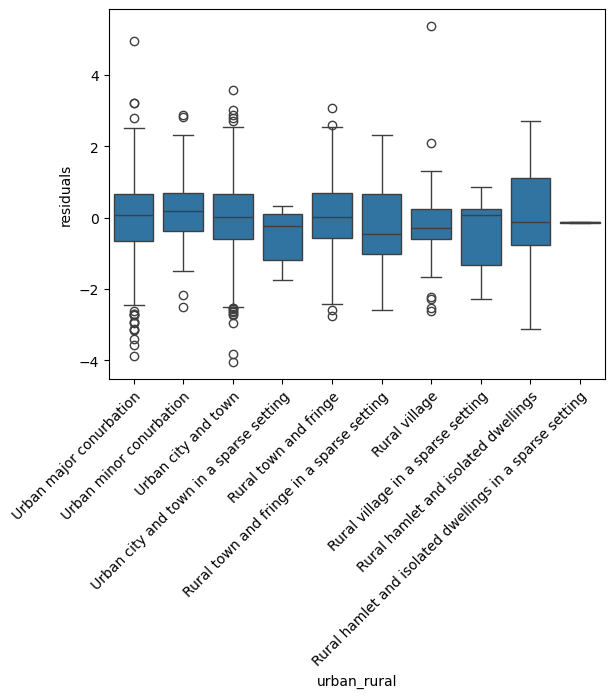

In [311]:
sns.boxplot(data=data, x='urban_rural', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

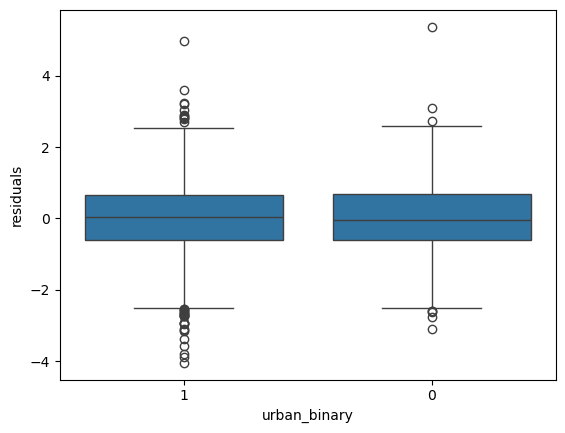

In [312]:
sns.boxplot(data=data, x='urban_binary', y='residuals');

### read in coordinates and map residuals

In [313]:
import geopandas as gpd
import contextily as ctx

In [314]:
coords = pd.read_csv('data_with_coordinates.csv', index_col=0)

In [315]:
coords = coords[['URN', 'Easting', 'Northing']].copy()

In [316]:
coords

URN   Easting  Northing
0     137181  526867.0  184105.0
1     100049  528159.0  184498.0
2     100050  528369.0  186019.0
3     100051  529555.0  183356.0
4     100052  524402.0  185633.0
...      ...       ...       ...
3141  137251  368104.0  521037.0
3142  137338  338127.0  478474.0
3143  136357  360707.0  478609.0
3144  141106  321416.0  471354.0
3145  135940  320952.0  469650.0

[3146 rows x 3 columns]

In [317]:
data_with_coords = data.merge(coords, how='left', on='URN')

In [318]:
data_with_coords['residuals'].describe()

count    3019.000000
mean        0.000113
std         0.998176
min        -4.046126
25%        -0.606706
50%         0.031132
75%         0.670833
max         5.370968
Name: residuals, dtype: float64

In [319]:
data_with_coords['residuals_banding'] = data_with_coords['residuals']

In [320]:
data_with_coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   URN                 3019 non-null   int64   
 1   not_sustained_rate  3019 non-null   float64 
 2   urban_rural         3019 non-null   category
 3   denomination        3019 non-null   object  
 4   FSM                 3019 non-null   float64 
 5   White_British       3019 non-null   float64 
 6   region_name         3019 non-null   object  
 7   school_name         3019 non-null   object  
 8   headcount           3019 non-null   float64 
 9   susp_rate           3019 non-null   float64 
 10  KS2_history         3019 non-null   float64 
 11  Attainment_8        3019 non-null   float64 
 12  Progress_8          3019 non-null   float64 
 13  selective           3019 non-null   int64   
 14  POSTCODE            3019 non-null   object  
 15  post16              3019 non-null   in

In [321]:
print(data_with_coords['residuals_banding'].dtype)

float64


In [322]:
data_with_coords.loc[data_with_coords['residuals'] < -1, 'residuals_banding'] = -1
data_with_coords.loc[(data_with_coords['residuals'] >= -1) & (data_with_coords['residuals_banding'] <= 1), 'residuals_banding'] = 0
data_with_coords.loc[data_with_coords['residuals'] > 1, 'residuals_banding'] = 1

In [323]:
data_with_coords.loc[data_with_coords['residuals'] < -1]

URN  not_sustained_rate                        urban_rural  \
2     146639            4.132231            Urban minor conurbation   
4     140865            3.053435            Urban minor conurbation   
19    138355            4.522613            Urban major conurbation   
22    137130            5.844156            Urban major conurbation   
33    146315            2.209945            Urban major conurbation   
...      ...                 ...                                ...   
2985  142067            2.097902                Urban city and town   
2991  144853            3.954802                Urban city and town   
2992  135149            3.488372                Urban city and town   
3006  137678            2.189781            Urban major conurbation   
3018  144638            0.000000  Rural village in a sparse setting   

     denomination   FSM  White_British               region_name  \
2        No faith  48.2           86.5  Yorkshire and The Humber   
4       Christian  24.8           57.9  Yorkshire and The Humber   
19       No faith  25.5           92.2                North West   
22       No faith  40.3           83.4                North West   
33       No faith  47.2           92.2                North West   
...           ...   ...            ...                       ...   
2985    Christian  19.4           62.9             West Midlands   
2991     No faith  29.1           60.2             West Midlands   
2992     No faith  35.2           52.4             West Midlands   
3006     No faith  23.0           48.5              Outer London   
3018    Christian   2.8           86.7                South West   

                                      school_name  headcount  susp_rate  \
2                              The Laurel Academy      699.0   14.44921   
4                The McAuley Catholic High School     1425.0    7.36842   
19                             Hilbre High School     1207.0    6.13090   
22                  Prenton High School for Girls      779.0   10.78306   
33                        Co-op Academy Bebington     1135.0   10.30837   
...                                           ...        ...        ...   
2985                         Holy Trinity Academy      875.0    2.62857   
2991  Hadley Learning Community - Secondary Phase     1251.0    2.47802   
2992                              Madeley Academy     1265.0    3.16206   
3006  The Hollyfield School and Sixth Form Centre     1214.0    1.81219   
3018                     The Five Islands Academy      248.0    0.00000   

      KS2_history  Attainment_8  Progress_8  selective  POSTCODE  post16  \
2           102.1          43.5        0.17          0   S64 9SD       0   
4           104.2          45.6       -0.08          0   DN3 3QF       1   
19          101.0          35.4       -0.43          0  CH48 6EQ       1   
22          101.8          41.2        0.02          0  CH42 6RR       0   
33          100.6          35.7       -0.34          0  CH63 2PS       1   
...           ...           ...         ...        ...       ...     ...   
2985        105.4          45.9       -0.22          0   TF2 9SQ       1   
2991        104.0          42.9       -0.22          0   TF1 5NU       0   
2992        106.1          47.1       -0.30          0   TF7 5FB       1   
3006        105.5          52.7        0.28          0   KT6 4TU       1   
3018        101.6          52.8        1.07          0  TR21 0NA       0   

     school_sex                    type Ofsted_rating  sen_support     LSOA11  \
2         Mixed     Academy sponsor led          Good    12.907801  E01007583   
4         Mixed       Academy converter          Good    11.863224  E01007603   
19        Mixed       Academy converter          Good    17.985012  E01007260   
22        Girls       Academy converter          Good    16.261204  E01007177   
33        Mixed     Academy sponsor led          Good    13.368984  E01007117   
...         ...                     ...

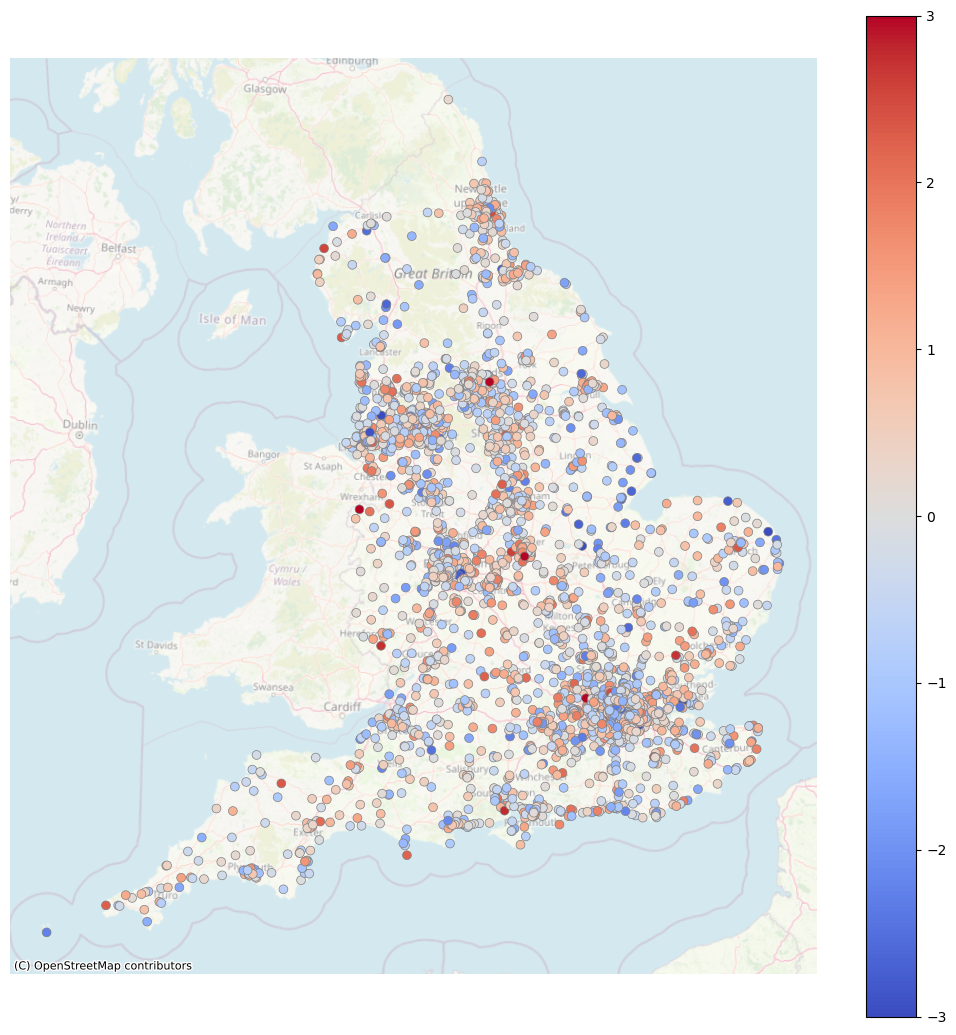

In [324]:
gdf = gpd.GeoDataFrame(
    data_with_coords,
    geometry = gpd.points_from_xy(data_with_coords['Easting'], data_with_coords['Northing']),
    crs = 'EPSG:27700'
)

fig, ax = plt.subplots(figsize=(13, 13))
gdf.plot(ax=ax, 
         column='residuals', 
         markersize=40, 
         cmap="coolwarm",
         edgecolor='grey',
         linewidth = 0.5,
         vmin=-3,
         vmax=3,
        legend=True)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_axis_off()
plt.show();

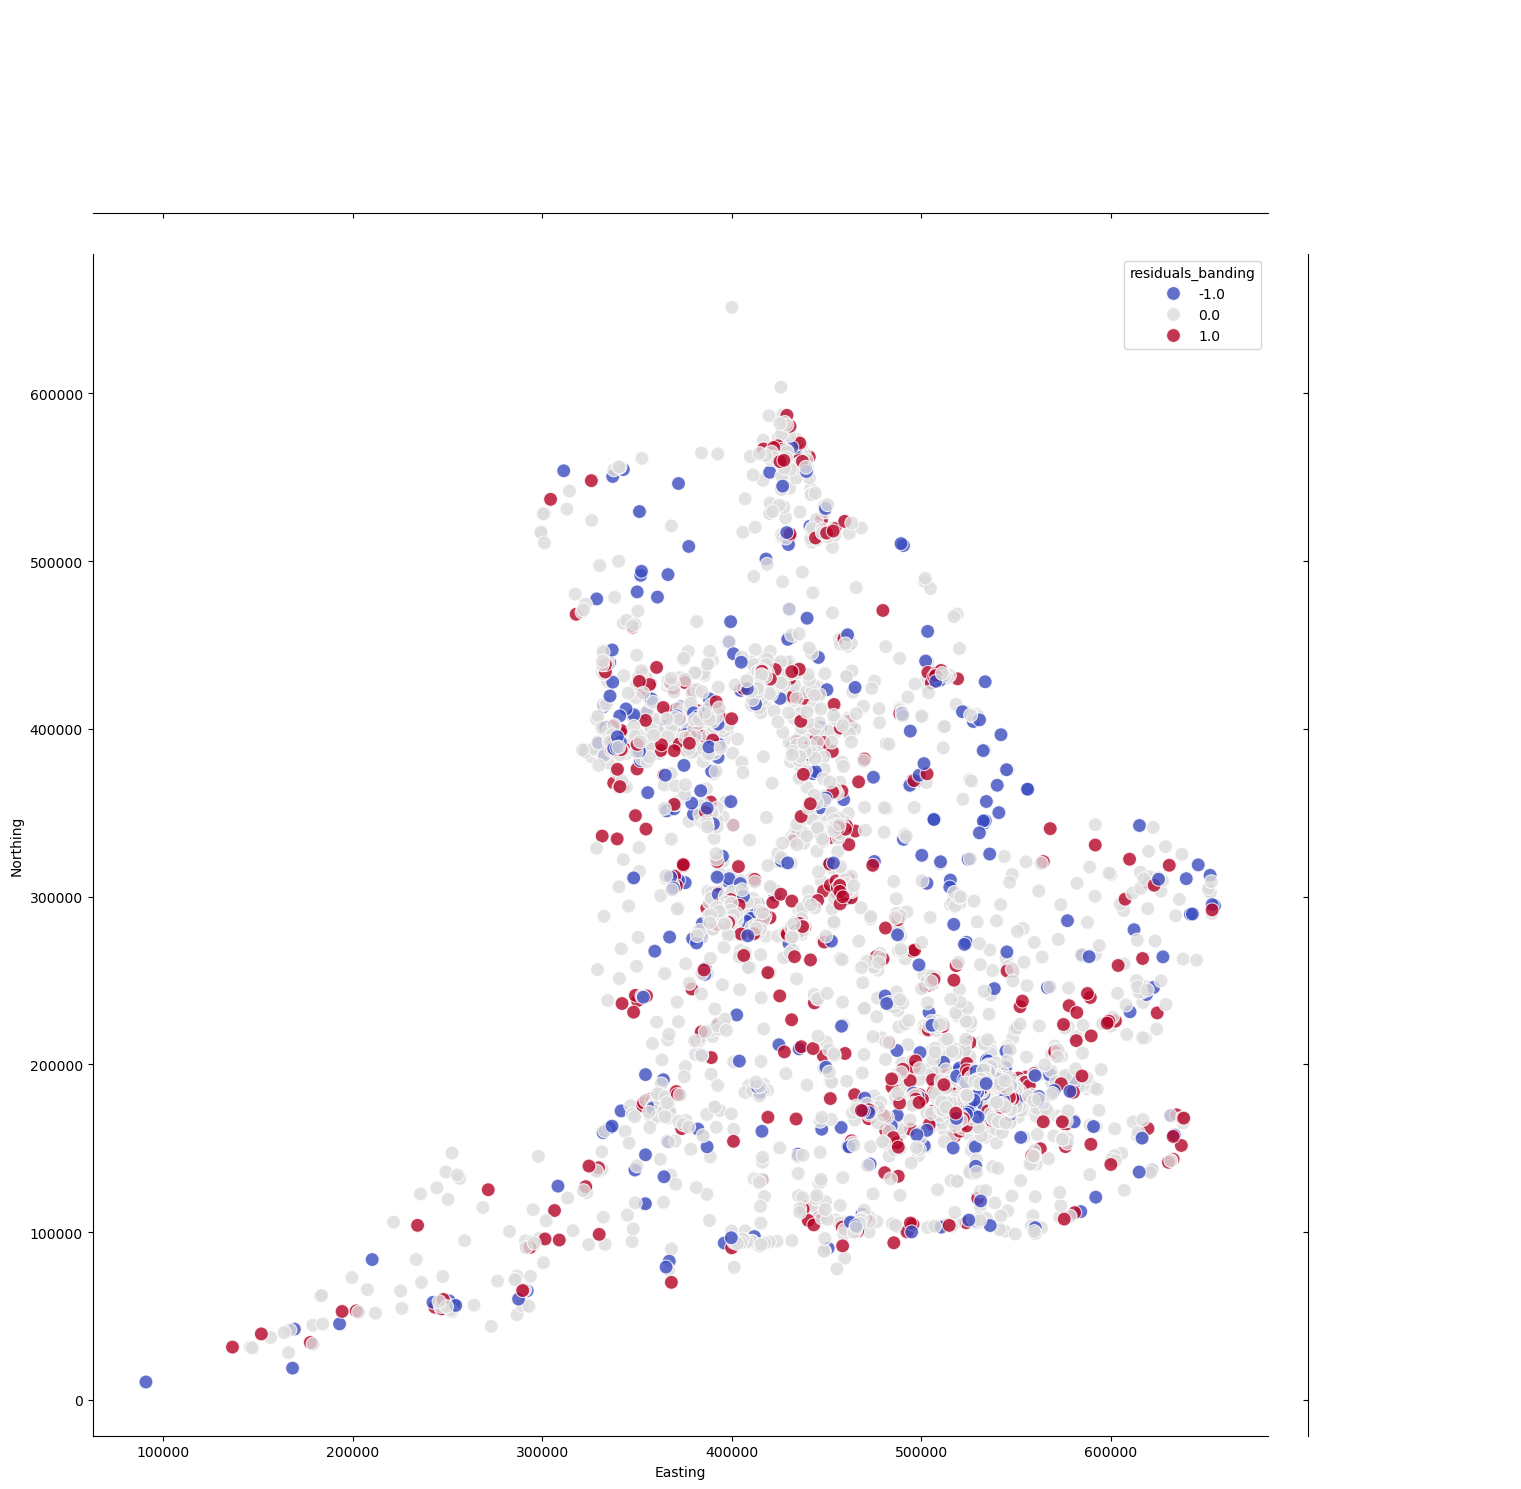

In [325]:
g = sns.JointGrid(data=data_with_coords, 
                  x='Easting', y='Northing', hue='residuals_banding', height=15, marginal_ticks=False)

g.plot_joint(sns.scatterplot, s=100, alpha=0.8,
            hue_norm=(-1, 1), palette="coolwarm");

## Groupby LSOA

In [326]:
LSOA_residuals = data.groupby('LSOA11')['residuals'].mean()

In [327]:
LSOA_residuals = pd.DataFrame(LSOA_residuals)
LSOA_residuals

residuals
LSOA11              
E01000031  -0.095403
E01000035   0.192882
E01000051   2.030532
E01000061  -0.670464
E01000066  -0.161043
...              ...
E01033693   1.877787
E01033701  -0.811765
E01033726  -0.408465
E01033737  -1.379657
E01033745   1.417302

[2899 rows x 1 columns]

In [ ]:
LSOA_residuals.to_csv('LSOA_residuals.csv', index=False)

Shape file source: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-lower-layer-super-output-areas-and-data-zones/resource/bf174b2e-fc72-449d-bbbf-b12e9892c88d 

In [ ]:
map = gpd.read_file('infuse_lsoa_lyr_2011.shp')

In [ ]:
map.info()

In [ ]:
map.plot()

In [ ]:
map.head()

In [ ]:
england = map[map['geo_code'].str.startswith('E01')]

In [ ]:
england.info()

In [ ]:
england.plot()

In [ ]:
england_lsoa_residuals = pd.merge(england, LSOA_residuals, left_on='geo_code', right_on='LSOA11', how='left')

In [ ]:
england_lsoa_residuals.info()

In [ ]:
f,ax = plt.subplots(1, figsize=(16,16))
england_lsoa_residuals.plot(column='residuals', legend=True, ax=ax)

# remove axis
ax.set_axis_off()
plt.show();


## Groupby region

In [328]:
data_temp_london = data.copy()

In [329]:
data_temp_london['region_name'].replace('Inner London', 'London', inplace=True)
data_temp_london['region_name'].replace('Outer London', 'London', inplace=True)

In [330]:
region_residuals = data_temp_london.groupby('region_name')['residuals'].mean()

In [331]:
region_residuals = pd.DataFrame(region_residuals)
region_residuals

residuals
region_name                        
East Midlands             -0.003647
East of England           -0.072616
London                    -0.154687
North East                 0.101483
North West                 0.086706
South East                 0.019443
South West                -0.010899
West Midlands              0.075854
Yorkshire and The Humber   0.048170

region map source: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-regions/resource/cf403e93-6bc8-4f63-b4f3-b9e7c47e769a 

In [332]:
map = gpd.read_file('infuse_rgn_2011.shp')

In [333]:
map

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  
0  POLYGON ((617106.688 343482.308, 617111.01 343...  
1  POLYGON ((510758.595 482644.305, 510766.754 48...  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....  
3  POLYGON ((454996.828 276726.552, 454974.133 27...  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....  
6  POLYGON ((431443.073 299111.23, 431449.304 299...  
7  POLYGON ((380424.183 522381.432, 380424.209 52...  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....

In [334]:
england_map_residuals = pd.merge(map, region_residuals, left_on='name', right_on='region_name', how='left')

In [335]:
england_map_residuals

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  residuals  
0  POLYGON ((617106.688 343482.308, 617111.01 343...  -0.072616  
1  POLYGON ((510758.595 482644.305, 510766.754 48...   0.048170  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....   0.019443  
3  POLYGON ((454996.828 276726.552, 454974.133 27...  -0.003647  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  -0.154687  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....  -0.010899  
6  POLYGON ((431443.073 299111.23, 431449.304 299...   0.075854  
7  POLYGON ((380424.183 522381.432, 380424.209 52...   0.086706  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....   0.101483

In [336]:
england_map_residuals['residuals'].describe()

count    9.000000
mean     0.009979
std      0.082694
min     -0.154687
25%     -0.010899
50%      0.019443
75%      0.075854
max      0.101483
Name: residuals, dtype: float64

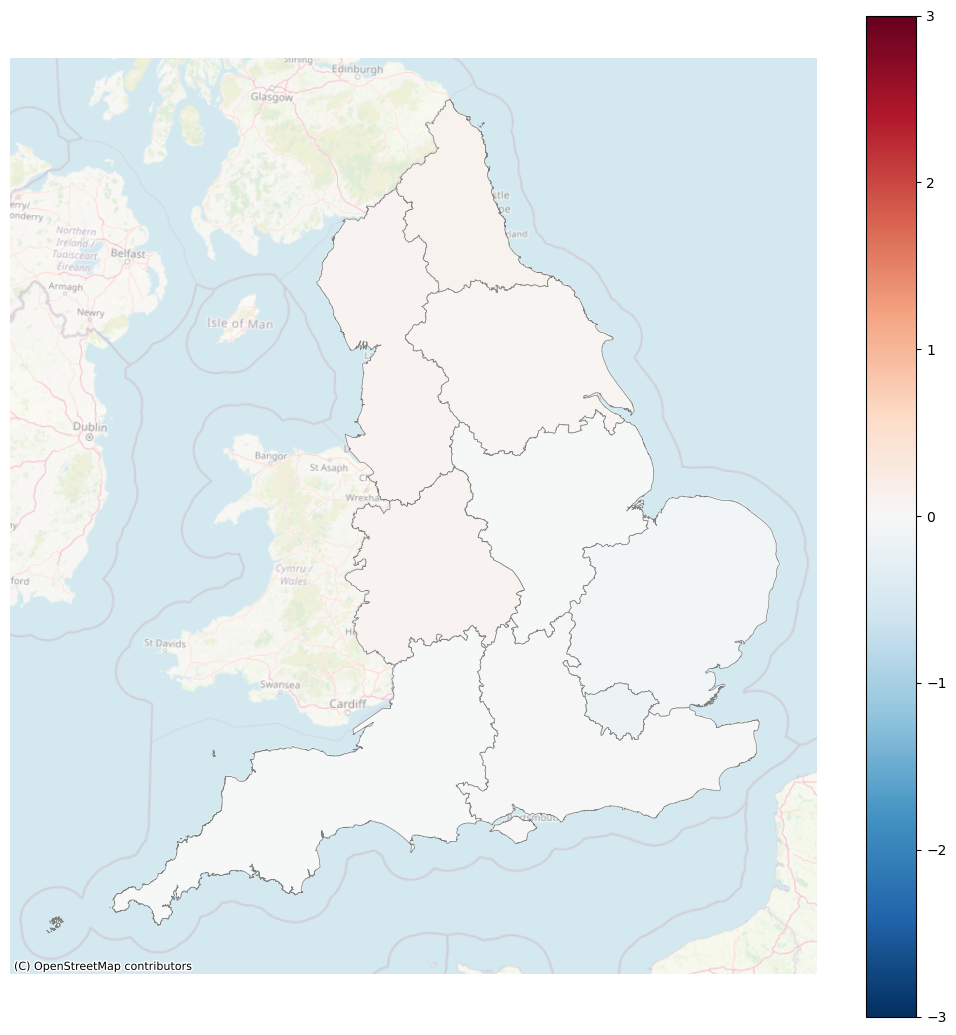

In [337]:
f,ax = plt.subplots(1, figsize=(13,13))
england_map_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           edgecolor='grey',
                           linewidth = 0.5,
                           vmin=-3,
                           vmax=3,
                           legend=True, 
                           ax=ax)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_axis_off()
plt.show();

## Groupby LA

In [338]:
la_code = pd.read_csv('model_data/la_code.csv', index_col=0)

In [339]:
la_code = la_code[['URN', 'la_name', 'district_administrative_name', 'district_administrative_code']]

In [340]:
la_code

URN                 la_name district_administrative_name  \
1      100000          City of London               City of London   
2      100001          City of London               City of London   
3      100002          City of London               City of London   
4      100003          City of London               City of London   
5      100005                  Camden                       Camden   
...       ...                     ...                          ...   
24438  149557               Wiltshire                    Wiltshire   
24439  149632  Kensington and Chelsea       Kensington and Chelsea   
24440  149633                Cornwall                     Cornwall   
24441  149635           Wolverhampton                Wolverhampton   
24442  149636                 Norfolk                    Breckland   

      district_administrative_code  
1                        E09000001  
2                        E09000001  
3                        E09000001  
4                        E09000001  
5                        E09000007  
...                            ...  
24438                    E06000054  
24439                    E09000020  
24440                    E06000052  
24441                    E08000031  
24442                    E07000143  

[24442 rows x 4 columns]

In [341]:
data_residuals = data[['URN', 'residuals']]

In [342]:
data_residuals

URN  residuals
1     138116   1.612536
2     137899  -0.512362
3     146639  -2.503352
4     137603   0.473755
5     140865  -1.032645
...      ...        ...
3183  142357  -0.020962
3184  139971   1.354601
3185  137740  -0.036491
3186  133580   1.885517
3187  144638  -2.267995

[3019 rows x 2 columns]

In [343]:
data_la = data_residuals.merge(la_code, how='left', on='URN')

In [344]:
data_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URN                           3019 non-null   int64  
 1   residuals                     3019 non-null   float64
 2   la_name                       3019 non-null   object 
 3   district_administrative_name  3019 non-null   object 
 4   district_administrative_code  3019 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 118.1+ KB


In [345]:
la_residuals = data_la.groupby('district_administrative_code')['residuals'].mean()

In [346]:
la_residuals = pd.DataFrame(la_residuals)
la_residuals = la_residuals.reset_index()

In [347]:
la_residuals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   district_administrative_code  308 non-null    object 
 1   residuals                     308 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


la map source: 

In [348]:
map = gpd.read_file('infuse_dist_lyr_2011.shp')

<Axes: >

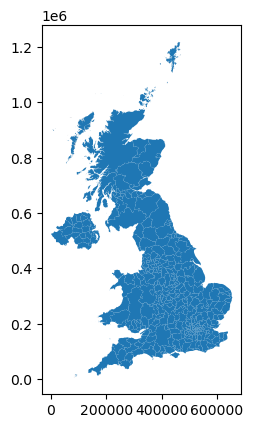

In [349]:
map.plot()

In [350]:

map[map['name'].str.contains('Cornwall')]

geo_code                 geo_label geo_labelw               label  \
51  E41000052  Cornwall,Isles of Scilly       None  E92000001E41000052   

                        name  \
51  Cornwall,Isles of Scilly   

                                             geometry  
51  MULTIPOLYGON (((185900.5 33613.7, 185894.609 3...

In [351]:
england = map[map['geo_code'].str.startswith('E')]

In [352]:
england

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E07000049       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

### update geo codes in 'england' to match current codes

In [353]:
update_codes = pd.read_csv('geo_code_replacements.csv')

In [354]:
update_codes.head()

geo_code                       name district_administrative_code
0  E07000097         East Hertfordshire                    E07000242
1  E08000020                  Gateshead                    E08000037
2  E41000052  Cornwall, Isles of Scilly                    E06000052
3  E07000050               North Dorset                    E06000059
4  E07000101                  Stevenage                    E07000243

In [355]:
code_dict = dict(zip(update_codes['geo_code'], update_codes['district_administrative_code']))
code_dict

{'E07000097': 'E07000242',
 'E08000020': 'E08000037',
 'E41000052': 'E06000052',
 'E07000050': 'E06000059',
 'E07000101': 'E07000243',
 'E07000048': 'E06000058',
 'E07000190': 'E07000246',
 'E07000052': 'E06000059',
 'E07000201': 'E07000245',
 'E07000153': 'E06000061',
 'E06000048': 'E06000057',
 'E41000324': 'E09000033',
 'E07000205': 'E07000244',
 'E07000104': 'E07000241',
 'E07000156': 'E06000061',
 'E07000191': 'E07000246',
 'E07000151': 'E06000062',
 'E06000029': 'E06000058',
 'E07000004': 'E06000060',
 'E07000150': 'E06000061',
 'E07000053': 'E06000059',
 'E07000152': 'E06000061',
 'E07000204': 'E07000245',
 'E07000051': 'E06000059',
 'E07000005': 'E06000060',
 'E07000155': 'E06000062',
 'E07000006': 'E06000060',
 'E07000007': 'E06000060',
 'E07000206': 'E07000244',
 'E07000100': 'E07000240',
 'E06000028': 'E06000058',
 'E07000154': 'E06000062',
 'E07000049': 'E06000059'}

In [356]:
england_updated = england.copy()

In [357]:
england_updated['geo_code'] = england_updated['geo_code'].map(code_dict).fillna(england_updated['geo_code'])

In [358]:
england_updated

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E06000059       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

In [359]:
england_la_residuals = pd.merge(england_updated, la_residuals, left_on='geo_code', right_on='district_administrative_code', how='left')

In [360]:
england_la_residuals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   geo_code                      324 non-null    object  
 1   geo_label                     324 non-null    object  
 2   geo_labelw                    0 non-null      object  
 3   label                         324 non-null    object  
 4   name                          324 non-null    object  
 5   geometry                      324 non-null    geometry
 6   district_administrative_code  324 non-null    object  
 7   residuals                     324 non-null    float64 
dtypes: float64(1), geometry(1), object(6)
memory usage: 20.4+ KB


In [361]:
unmatched_rows = england_la_residuals[england_la_residuals['residuals'].isnull()]
print(unmatched_rows[['geo_code', 'geo_label']])

Empty DataFrame
Columns: [geo_code, geo_label]
Index: []


In [362]:
data['residuals'].describe()

count    3019.000000
mean        0.000113
std         0.998176
min        -4.046126
25%        -0.606706
50%         0.031132
75%         0.670833
max         5.370968
Name: residuals, dtype: float64

In [363]:
england_la_residuals['residuals'].describe()

count    324.000000
mean      -0.015241
std        0.467039
min       -2.072841
25%       -0.289844
50%        0.011930
75%        0.258961
max        1.576883
Name: residuals, dtype: float64

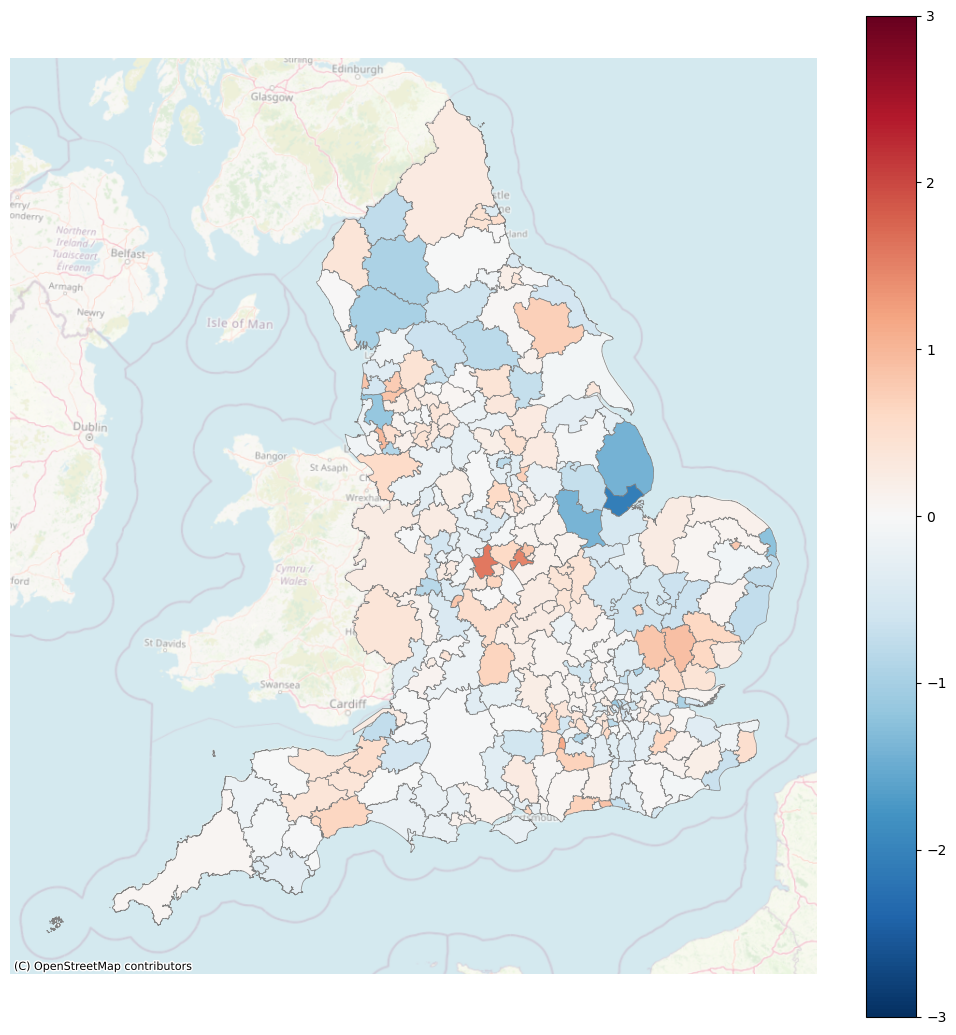

In [364]:
f,ax = plt.subplots(1, figsize=(13,13))
england_la_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           vmin=-3,
                           vmax=3,
                           edgecolor='grey',
                           linewidth = 0.5,
                           legend=True, 
                           ax=ax)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)


# remove axis
ax.set_axis_off()
plt.show();


# Plot means

In [365]:
data.describe()

URN  not_sustained_rate          FSM  White_British  \
count    3019.000000         3019.000000  3019.000000    3019.000000   
mean   134557.034117            6.069752    26.105532      62.505399   
std     11868.325555            3.886195    13.322203      28.863703   
min    100049.000000            0.000000     0.000000       0.000000   
25%    136064.500000            3.365385    15.900000      42.450000   
50%    137531.000000            5.347594    24.100000      73.500000   
75%    141002.500000            8.047825    34.700000      86.300000   
max    149457.000000           30.412371    70.900000      97.100000   

         headcount    susp_rate  KS2_history  Attainment_8   Progress_8  \
count  3019.000000  3019.000000  3019.000000   3019.000000  3019.000000   
mean   1120.146406     8.963233   104.493607     46.997416    -0.002040   
std     384.776198    11.932410     2.730835      9.448421     0.520611   
min      93.000000     0.000000    94.500000      0.800000    -5.090000   
25%     852.000000     2.435195   102.900000     40.850000    -0.340000   
50%    1085.000000     5.319910   104.300000     45.900000    -0.010000   
75%    1361.500000    10.787840   105.600000     51.300000     0.340000   
max    3078.000000   166.062180   117.000000     86.600000     2.550000   

         selective       post16  sen_support          IMD  single_sex_binary  \
count  3019.000000  3019.000000  3019.000000  3019.000000         3019.00000   
mean      0.052998     0.624710    13.318471     5.634978            0.11262   
std       0.224066     0.484278     5.446792     2.832510            0.31618   
min       0.000000     0.000000     0.158983     1.000000            0.00000   
25%       0.000000     0.000000     9.730936     3.000000            0.00000   
50%       0.000000     1.000000    13.105413     6.000000            0.00000   
75%       0.000000     1.000000    16.432107     8.000000            0.00000   
max       1.000000     1.000000    42.857143    10.000000            1.00000   

       faith_binary  predictions    residuals  
count   3019.000000  2856.000000  3019.000000  
mean       0.184167    -0.002536     0.000113  
std        0.387684     0.788516     0.998176  
min        0.000000    -2.893200    -4.046126  
25%        0.000000    -0.447168    -0.606706  
50%        0.000000     0.048849     0.031132  
75%        0.000000     0.529438     0.670833  
max        1.000000     2.113213     5.370968

In [366]:
ns_mean = data['not_sustained_rate'].mean()
ns_mean

6.069752202886731

#### Headcount

In [367]:
headcount = data[['headcount', 'not_sustained_rate']]

In [368]:
headcount['Rank'] = 'Middle'
headcount

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15591/3364303623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headcount['Rank'] = 'Middle'


headcount  not_sustained_rate    Rank
1         789.0           13.286713  Middle
2        1170.0            4.417671  Middle
3         699.0            4.132231  Middle
4        1468.0            6.302521  Middle
5        1425.0            3.053435  Middle
...         ...                 ...     ...
3183     1198.0            1.639344  Middle
3184      609.0            5.000000  Middle
3185     1537.0            4.102564  Middle
3186      609.0            9.615385  Middle
3187      248.0            0.000000  Middle

[3019 rows x 3 columns]

In [369]:
q25 = data['headcount'].quantile(0.25)
q75 = data['headcount'].quantile(0.75)

In [370]:
headcount.loc[headcount['headcount'] > q75, 'Rank'] = 'High'
headcount.loc[headcount['headcount'] < q25, 'Rank'] = 'Low'

In [371]:
mean_neet_headcount = headcount.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_headcount

Rank
High      4.622946
Low       7.497336
Middle    6.080309
Name: not_sustained_rate, dtype: float64

In [372]:
# convert series to df
mean_neet_headcount = mean_neet_headcount.reset_index()

# rename columns
mean_neet_headcount.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_headcount['Level'] = pd.Categorical(mean_neet_headcount['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_headcount = mean_neet_headcount.sort_values('Level')

# replace values in Level col
mean_neet_headcount['Level'].replace('High', 'Top 25% Headcount', inplace=True)
mean_neet_headcount['Level'].replace('Middle', 'Center 50% Headcount', inplace=True)
mean_neet_headcount['Level'].replace('Low', 'Bottom 25% Headcount', inplace=True)

# new column for characteristic label
mean_neet_headcount['Characteristic'] = 'Headcount'

# reorder cols
mean_neet_headcount = mean_neet_headcount[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_headcount

Characteristic                 Level  Mean Not Sustained Rate
1      Headcount  Bottom 25% Headcount                 7.497336
2      Headcount  Center 50% Headcount                 6.080309
0      Headcount     Top 25% Headcount                 4.622946

#### Pupil:teacher

In [373]:
pup_teach = data[['pupil_teacher_ratio', 'not_sustained_rate']]

KeyError: "['pupil_teacher_ratio'] not in index"

In [374]:
pup_teach['Rank'] = 'Middle'
pup_teach

NameError: name 'pup_teach' is not defined

In [375]:
q25 = data['pupil_teacher_ratio'].quantile(0.25)
q75 = data['pupil_teacher_ratio'].quantile(0.75)

KeyError: 'pupil_teacher_ratio'

In [376]:
pup_teach.loc[pup_teach['pupil_teacher_ratio'] > q75, 'Rank'] = 'High'
pup_teach.loc[pup_teach['pupil_teacher_ratio'] < q25, 'Rank'] = 'Low'

NameError: name 'pup_teach' is not defined

In [377]:
mean_neet_pup_teach = pup_teach.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_pup_teach

NameError: name 'pup_teach' is not defined

In [378]:
# convert series to df
mean_neet_pup_teach = mean_neet_pup_teach.reset_index()

# rename columns
mean_neet_pup_teach.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_pup_teach['Level'] = pd.Categorical(mean_neet_pup_teach['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_pup_teach = mean_neet_pup_teach.sort_values('Level')

# replace values in Level col
mean_neet_pup_teach['Level'].replace('High', 'Top 25% Pupil:Teacher Ratio', inplace=True)
mean_neet_pup_teach['Level'].replace('Middle', 'Center 50% Pupil:Teacher Ratio', inplace=True)
mean_neet_pup_teach['Level'].replace('Low', 'Bottom 25% Pupil:Teacher Ratio', inplace=True)

# new column for characteristic label
mean_neet_pup_teach['Characteristic'] = 'Pupil:Teacher Ratio'

# reorder cols
mean_neet_pup_teach = mean_neet_pup_teach[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_pup_teach

NameError: name 'mean_neet_pup_teach' is not defined

#### Assistant:teacher

In [379]:
ass_teach = data[['assistant_teacher_ratio', 'not_sustained_rate']]

KeyError: "['assistant_teacher_ratio'] not in index"

In [380]:
ass_teach['Rank'] = 'Middle'
ass_teach

NameError: name 'ass_teach' is not defined

In [381]:
q25 = data['assistant_teacher_ratio'].quantile(0.25)
q75 = data['assistant_teacher_ratio'].quantile(0.75)

KeyError: 'assistant_teacher_ratio'

In [382]:
ass_teach.loc[ass_teach['assistant_teacher_ratio'] > q75, 'Rank'] = 'High'
ass_teach.loc[ass_teach['assistant_teacher_ratio'] < q25, 'Rank'] = 'Low'

NameError: name 'ass_teach' is not defined

In [383]:
mean_neet_ass_teach = ass_teach.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_ass_teach

NameError: name 'ass_teach' is not defined

In [384]:
# convert series to df
mean_neet_ass_teach = mean_neet_ass_teach.reset_index()

# rename columns
mean_neet_ass_teach.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_ass_teach['Level'] = pd.Categorical(mean_neet_ass_teach['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_ass_teach = mean_neet_ass_teach.sort_values('Level')

# replace values in Level col
mean_neet_ass_teach['Level'].replace('High', 'Top 25% Assistant:Teacher Ratio', inplace=True)
mean_neet_ass_teach['Level'].replace('Middle', 'Center 50% Assistant:Teacher Ratio', inplace=True)
mean_neet_ass_teach['Level'].replace('Low', 'Bottom 25% Assistant:Teacher Ratio', inplace=True)

# new column for characteristic label
mean_neet_ass_teach['Characteristic'] = 'Assistant:Teacher Ratio'

# reorder cols
mean_neet_ass_teach = mean_neet_ass_teach[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_ass_teach

NameError: name 'mean_neet_ass_teach' is not defined

#### Suspension rate

In [385]:
susp = data[['susp_rate', 'not_sustained_rate']]

In [386]:
susp['Rank'] = 'Middle'
susp

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15591/4005748282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  susp['Rank'] = 'Middle'


susp_rate  not_sustained_rate    Rank
1      29.40431           13.286713  Middle
2      10.68376            4.417671  Middle
3      14.44921            4.132231  Middle
4       4.70027            6.302521  Middle
5       7.36842            3.053435  Middle
...         ...                 ...     ...
3183    0.58431            1.639344  Middle
3184    2.46305            5.000000  Middle
3185    5.13988            4.102564  Middle
3186    2.29885            9.615385  Middle
3187    0.00000            0.000000  Middle

[3019 rows x 3 columns]

In [387]:
q25 = data['susp_rate'].quantile(0.25)
q75 = data['susp_rate'].quantile(0.75)

In [388]:
susp.loc[susp['susp_rate'] > q75, 'Rank'] = 'High'
susp.loc[susp['susp_rate'] < q25, 'Rank'] = 'Low'

In [389]:
mean_neet_susp = susp.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_susp

Rank
High      8.847052
Low       3.593775
Middle    5.918991
Name: not_sustained_rate, dtype: float64

In [390]:
# convert series to df
mean_neet_susp = mean_neet_susp.reset_index()

# rename columns
mean_neet_susp.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_susp['Level'] = pd.Categorical(mean_neet_susp['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_susp = mean_neet_susp.sort_values('Level')

# replace values in Level col
mean_neet_susp['Level'].replace('High', 'Top 25% Suspension Rate', inplace=True)
mean_neet_susp['Level'].replace('Middle', 'Center 50% Suspension Rate', inplace=True)
mean_neet_susp['Level'].replace('Low', 'Bottom 25% Suspension Rate', inplace=True)

# new column for characteristic label
mean_neet_susp['Characteristic'] = 'Suspension Rate'

# reorder cols
mean_neet_susp = mean_neet_susp[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_susp

Characteristic                       Level  Mean Not Sustained Rate
1  Suspension Rate  Bottom 25% Suspension Rate                 3.593775
2  Suspension Rate  Center 50% Suspension Rate                 5.918991
0  Suspension Rate     Top 25% Suspension Rate                 8.847052

#### Progress 8

In [391]:
P8 = data[['Progress_8', 'not_sustained_rate']]

In [392]:
P8['Rank'] = 'Middle'
P8

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15591/3514377501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P8['Rank'] = 'Middle'


Progress_8  not_sustained_rate    Rank
1          -0.23           13.286713  Middle
2           0.41            4.417671  Middle
3           0.17            4.132231  Middle
4          -0.26            6.302521  Middle
5          -0.08            3.053435  Middle
...          ...                 ...     ...
3183        0.66            1.639344  Middle
3184        0.57            5.000000  Middle
3185        0.36            4.102564  Middle
3186        0.01            9.615385  Middle
3187        1.07            0.000000  Middle

[3019 rows x 3 columns]

In [393]:
q25 = data['Progress_8'].quantile(0.25)
q75 = data['Progress_8'].quantile(0.75)

In [394]:
P8.loc[P8['Progress_8'] > q75, 'Rank'] = 'High'
P8.loc[P8['Progress_8'] < q25, 'Rank'] = 'Low'

In [395]:
mean_neet_P8 = P8.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_P8

Rank
High      3.500938
Low       9.087449
Middle    5.849545
Name: not_sustained_rate, dtype: float64

In [396]:
# convert series to df
mean_neet_P8 = mean_neet_P8.reset_index()

# rename columns
mean_neet_P8.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_P8['Level'] = pd.Categorical(mean_neet_P8['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_P8 = mean_neet_P8.sort_values('Level')

# replace values in Level col
mean_neet_P8['Level'].replace('High', 'Top 25% Progress 8 Score', inplace=True)
mean_neet_P8['Level'].replace('Middle', 'Center 50% Progress 8 Score', inplace=True)
mean_neet_P8['Level'].replace('Low', 'Bottom 25% Progress 8 Score', inplace=True)

# new column for characteristic label
mean_neet_P8['Characteristic'] = 'Progress 8 Score'

# reorder cols
mean_neet_P8 = mean_neet_P8[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_P8

Characteristic                        Level  Mean Not Sustained Rate
1  Progress 8 Score  Bottom 25% Progress 8 Score                 9.087449
2  Progress 8 Score  Center 50% Progress 8 Score                 5.849545
0  Progress 8 Score     Top 25% Progress 8 Score                 3.500938

#### Post 16

In [397]:
mean_neet_post16 = data.groupby('post16')['not_sustained_rate'].mean()
print(mean_neet_post16)

post16
0    7.752828
1    5.058657
Name: not_sustained_rate, dtype: float64


In [398]:
# convert series to df
mean_neet_post16 = mean_neet_post16.reset_index()

# rename columns
mean_neet_post16.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_post16['Level'].replace(0, 'No Post-16', inplace=True)
mean_neet_post16['Level'].replace(1, 'Post-16', inplace=True)

# new column for characteristic label
mean_neet_post16['Characteristic'] = 'Post-16'

# reorder cols
mean_neet_post16 = mean_neet_post16[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_post16

Characteristic       Level  Mean Not Sustained Rate
0        Post-16  No Post-16                 7.752828
1        Post-16     Post-16                 5.058657

#### Faith

In [399]:
mean_neet_faith = data.groupby('faith_binary')['not_sustained_rate'].mean()
print(mean_neet_faith)

faith_binary
0    6.277427
1    5.149782
Name: not_sustained_rate, dtype: float64


In [400]:
# convert series to df
mean_neet_faith = mean_neet_faith.reset_index()

# rename columns
mean_neet_faith.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_faith['Level'].replace(0, 'Non Faith School', inplace=True)
mean_neet_faith['Level'].replace(1, 'Faith School', inplace=True)

# new column for characteristic label
mean_neet_faith['Characteristic'] = 'Faith'

# reorder cols
mean_neet_faith = mean_neet_faith[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_faith

Characteristic             Level  Mean Not Sustained Rate
0          Faith  Non Faith School                 6.277427
1          Faith      Faith School                 5.149782

#### Single sex

In [401]:
mean_neet_sex = data.groupby('single_sex_binary')['not_sustained_rate'].mean()
print(mean_neet_sex)

single_sex_binary
0    6.482549
1    2.817155
Name: not_sustained_rate, dtype: float64


In [402]:
# convert series to df
mean_neet_sex = mean_neet_sex.reset_index()

# rename columns
mean_neet_sex.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_sex['Level'].replace(0, 'Mixed', inplace=True)
mean_neet_sex['Level'].replace(1, 'Single-sex', inplace=True)

# new column for characteristic label
mean_neet_sex['Characteristic'] = 'Single-sex'

# reorder cols
mean_neet_sex = mean_neet_sex[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_sex

Characteristic       Level  Mean Not Sustained Rate
0     Single-sex       Mixed                 6.482549
1     Single-sex  Single-sex                 2.817155

#### Ofsted

In [403]:
mean_neet_ofsted = data.groupby('Ofsted_num')['not_sustained_rate'].mean()
print(mean_neet_ofsted)

Ofsted_num
4    3.452834
3    6.162049
2    8.159239
1    9.232511
Name: not_sustained_rate, dtype: float64


/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_15591/78526203.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_neet_ofsted = data.groupby('Ofsted_num')['not_sustained_rate'].mean()


In [404]:
# convert series to df
mean_neet_ofsted = mean_neet_ofsted.reset_index()

# rename columns
mean_neet_ofsted.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_ofsted['Level'].replace(4, 'Outstanding', inplace=True)
mean_neet_ofsted['Level'].replace(3, 'Good', inplace=True)
mean_neet_ofsted['Level'].replace(2, 'Requires Improvement', inplace=True)
mean_neet_ofsted['Level'].replace(1, 'Inadequate', inplace=True)

# reorder rows
#mean_neet_ofsted['Level'] = pd.Categorical(mean_neet_ofsted['Level'], categories=['Inadequate', 'Requires Improvement', 'Good', 'Outstanding'], ordered=True)

#mean_neet_ofsted = mean_neet_ofsted.sort_values('Level')

# new column for characteristic label
mean_neet_ofsted['Characteristic'] = 'Ofsted Rating'

# reorder cols
mean_neet_ofsted = mean_neet_ofsted[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_ofsted

Characteristic                 Level  Mean Not Sustained Rate
0  Ofsted Rating           Outstanding                 3.452834
1  Ofsted Rating                  Good                 6.162049
2  Ofsted Rating  Requires Improvement                 8.159239
3  Ofsted Rating            Inadequate                 9.232511

#### Plotting mean NEET rates

In [405]:
# join data frames
mean_df = pd.concat([#mean_neet_headcount,
                     #mean_neet_pup_teach,
                     #mean_neet_ass_teach,
                     mean_neet_susp,
                     mean_neet_P8,
                     mean_neet_post16,
                     mean_neet_faith,
                     mean_neet_sex,
                     #mean_neet_ofsted
                  ], 
                    axis=0, ignore_index=True)

mean_df

Characteristic                        Level  Mean Not Sustained Rate
0    Suspension Rate   Bottom 25% Suspension Rate                 3.593775
1    Suspension Rate   Center 50% Suspension Rate                 5.918991
2    Suspension Rate      Top 25% Suspension Rate                 8.847052
3   Progress 8 Score  Bottom 25% Progress 8 Score                 9.087449
4   Progress 8 Score  Center 50% Progress 8 Score                 5.849545
5   Progress 8 Score     Top 25% Progress 8 Score                 3.500938
6            Post-16                   No Post-16                 7.752828
7            Post-16                      Post-16                 5.058657
8              Faith             Non Faith School                 6.277427
9              Faith                 Faith School                 5.149782
10        Single-sex                        Mixed                 6.482549
11        Single-sex                   Single-sex                 2.817155

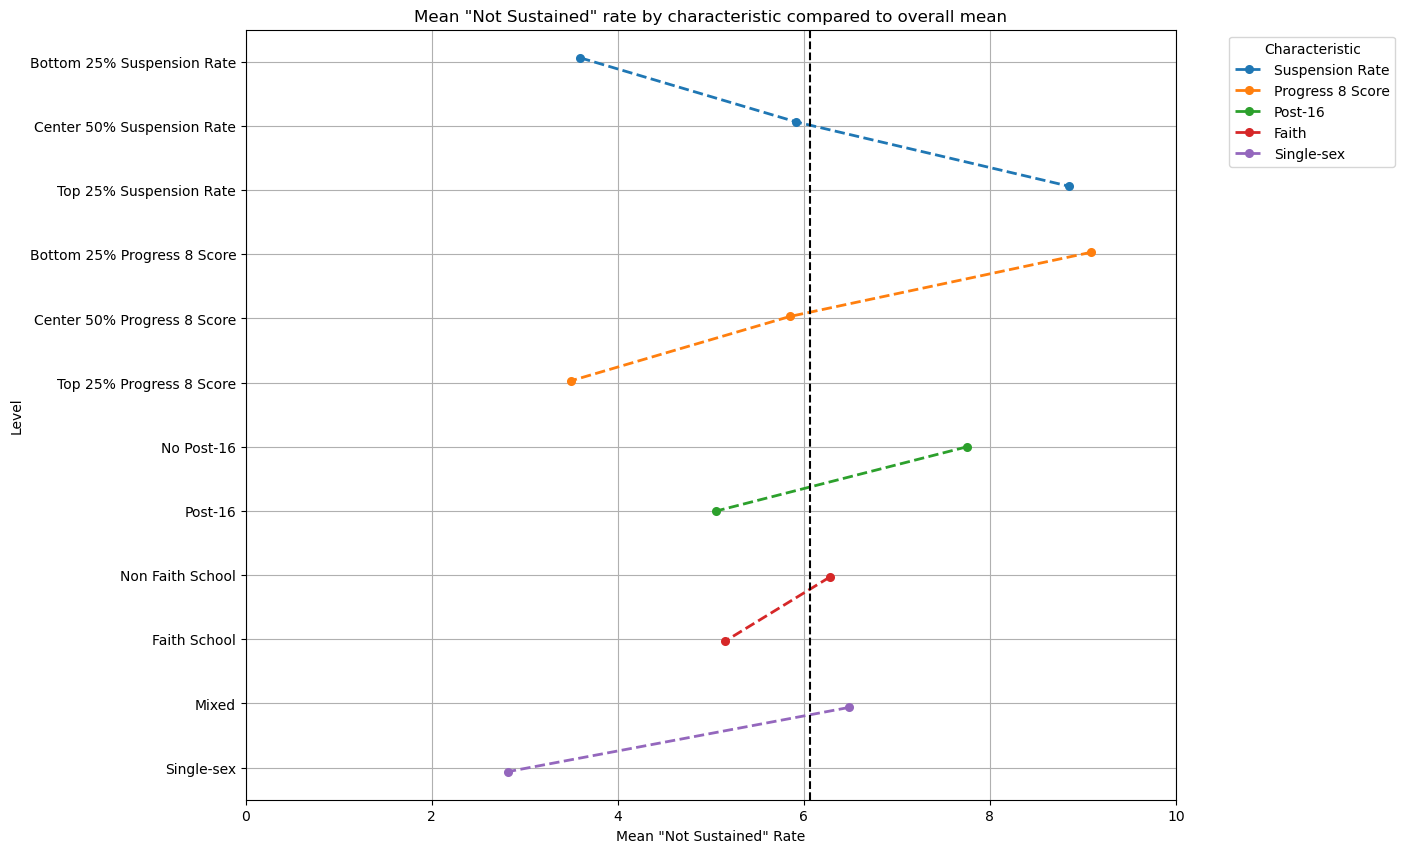

In [406]:
plt.figure(figsize=(12, 10))
sns.pointplot(data=mean_df, x='Mean Not Sustained Rate', y='Level', hue='Characteristic', 
              dodge=True, markers='o', linestyle='--', linewidth=2)

plt.axvline(x=ns_mean, color='black', linestyle='--') 

plt.xlim(0, 10)

plt.title('Mean "Not Sustained" rate by characteristic compared to overall mean')
plt.xlabel('Mean "Not Sustained" Rate')
plt.ylabel('Level')
plt.legend(title='Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)


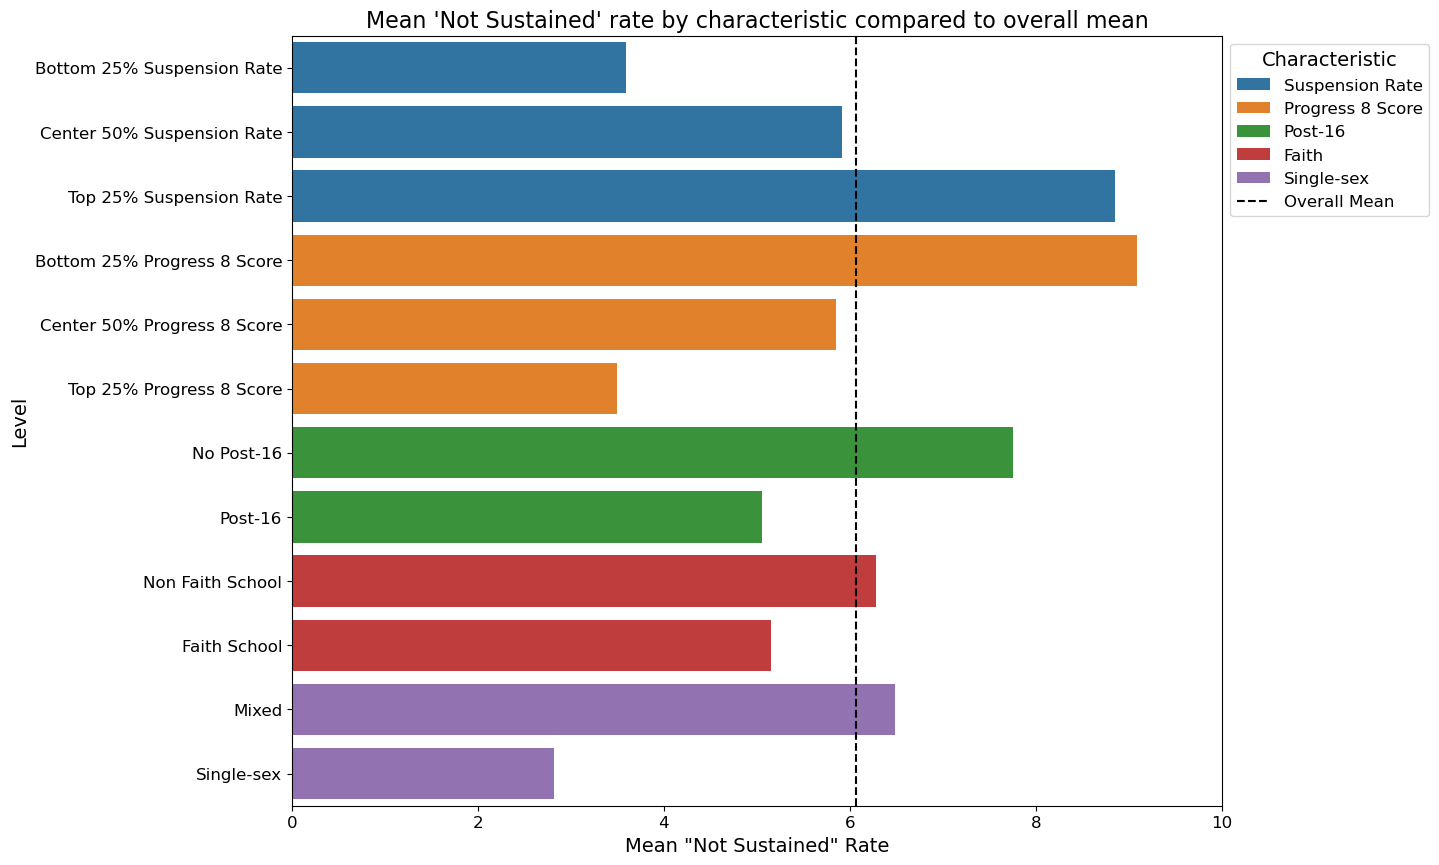

In [418]:
plt.figure(figsize=(12, 10))
sns.barplot(data=mean_df, x='Mean Not Sustained Rate', y='Level', hue='Characteristic', dodge=False)

plt.axvline(x=ns_mean, color='black', linestyle='--', label='Overall Mean') 

plt.xlim(0, 10)

plt.title("Mean 'Not Sustained' rate by characteristic compared to overall mean", fontsize=16)
plt.xlabel('Mean "Not Sustained" Rate', fontsize=14)
plt.ylabel('Level', fontsize=14)
plt.legend(title='Characteristic', bbox_to_anchor=(1.0, 1), loc='upper left', title_fontsize=14, fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)


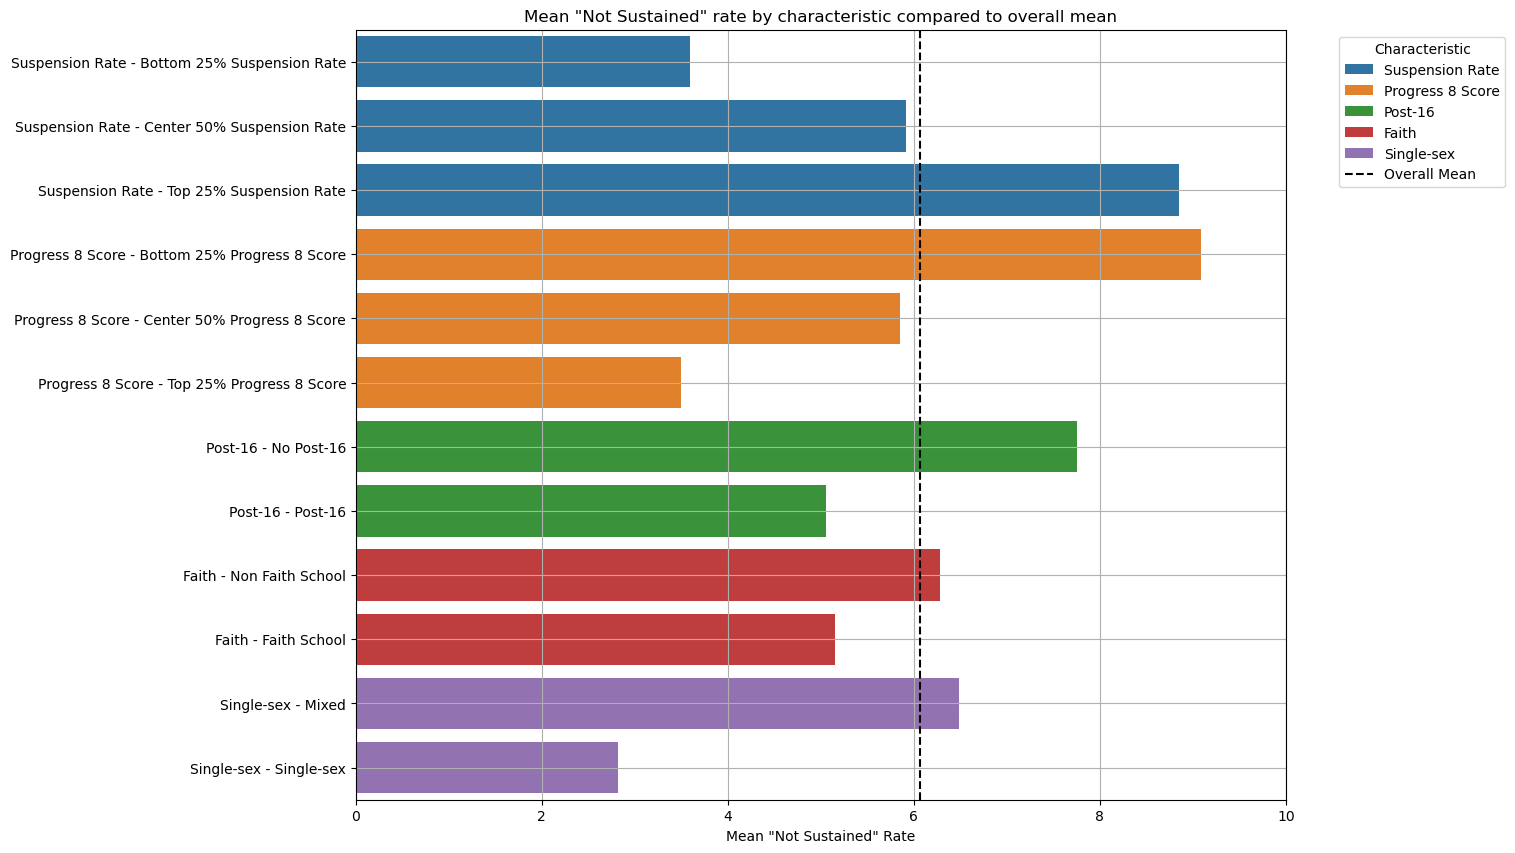

In [409]:
# Create a new y-axis label combining Characteristic and Level
mean_df['Level_Label'] = mean_df['Characteristic'] + ' - ' + mean_df['Level']

plt.figure(figsize=(12, 10))
ax = sns.barplot(data=mean_df, x='Mean Not Sustained Rate', y='Level_Label', hue='Characteristic', dodge=False)

plt.axvline(x=ns_mean, color='black', linestyle='--', label='Overall Mean') 

plt.xlim(0, 10)

plt.title('Mean "Not Sustained" rate by characteristic compared to overall mean')
plt.xlabel('Mean "Not Sustained" Rate')
plt.ylabel('')  # Remove redundant y-axis label
plt.legend(title='Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)